# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

num_data_train = data_train.shape[0]
num_data_test = data_test.shape[0]

x1 = np.zeros(num_data_train)
y1 = np.zeros(num_data_train)
label1   = np.zeros(num_data_train)

for i in range(num_data_train):
    x1[i]  = data_train[i,0]
    y1[i]  = data_train[i,1]
    label1[i]    = data_train[i,2]
    
#########################################################################
    
x2 = np.zeros(num_data_test)
y2 = np.zeros(num_data_test)
label2   = np.zeros(num_data_test)

for i in range(num_data_test):
    x2[i]  = data_test[i,0]
    y2[i]  = data_test[i,1]
    label2[i]    = data_test[i,2]


## plot the data

## define feature function

In [3]:
def feature_function(x, y):
    feature = np.array([1, x, y, x*y, x*x, y*y, x*x*y, x*y*y, x*x*x, y*y*y], dtype = object)
    return feature

## define regression function based on the feature function

In [4]:
def regression_function(theta, feature):
    value = np.matmul(np.transpose(theta), feature)
    return value

## define regularization function on the model parameters

In [5]:
def regularization_function(theta):
    value = np.matmul(theta, theta)
    return value

## define sigmoid function

In [6]:
def logistic_function(x):
    z = 1/(1+np.exp(-x))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [7]:
def compute_loss_feature(theta, feature, label, alpha):
    z = regression_function(theta, feature)
    h = logistic_function(z)
    loss = (-label * np.log(h + np.finfo(float).eps) - (1 - label) * np.log(1 - h + np.finfo(float).eps)).mean() + ( regularization_function(theta) * (alpha // 2) )
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [8]:
def compute_gradient_feature(theta, feature, label, alpha):
    z = regression_function(theta, feature)
    h = logistic_function(z)
    num_data = feature[1].shape[0]
    one = np.ones(num_data)
    X = np.column_stack([one, feature[1], feature[2], feature[3], feature[4], feature[5], feature[6], feature[7], feature[8], feature[9]])
    gradient = np.dot(X.T, (h - label)) / num_data
    return gradient

## compute the accuracy

In [9]:
def compute_accuracy(theta, feature, label):
    num_data = feature[1].shape[0]
    correctNum = 0
    f = regression_function(theta, feature)
    for i in range(0, num_data)  :
        if f[i]>=0 :
            ans = 1
        else :
            ans = 0
        if ans == label[i] :
            correctNum += 1
    accuracy = correctNum / num_data
    return round(accuracy, 5)

## gradient descent for the model parameters $\theta$

In [10]:
num_iteration   = 30000
learning_rate   = 0.3
alpha           = 0.001

theta           = np.array((0, 0, 0, 0, 0, 0, 0, 0, 0, 0)) 
theta_iteration = np.zeros((num_iteration, theta.size))
loss1_iteration  = np.zeros(num_iteration)
loss2_iteration  = np.zeros(num_iteration)

In [11]:
# theta_iteration             = np.zeros((num_iteration, dim_feature))
# loss_iteration_train        = np.zeros(num_iteration)
# loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [12]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient_feature(theta, feature_function(x1, y1), label1, alpha)
    loss1 = compute_loss_feature(theta, feature_function(x1, y1), label1, alpha)
    theta_iteration[i] = theta
    loss1_iteration[i] = loss1

    loss2 = compute_loss_feature(theta, feature_function(x2, y2), label2, alpha)
    loss2_iteration[i] = loss2
    
    accuracy1 = compute_accuracy(theta, feature_function(x1, y1), label1)
    accuracy2 = compute_accuracy(theta, feature_function(x2, y2), label2)
    
    accuracy_iteration_train[i] = accuracy1
    accuracy_iteration_test[i] = accuracy2
    
    print("[%4d] loss(train) = %5.5f, loss(test) = %5.5f, acc(train) = %5.5f, acc(test) = %5.5f" % (i, loss1, loss2, accuracy1, accuracy2))
    
theta_optimal = theta


[   0] loss(train) = 0.53268, loss(test) = 0.53291, acc(train) = 0.79400, acc(test) = 0.78000
[   1] loss(train) = 0.45236, loss(test) = 0.45814, acc(train) = 0.80000, acc(test) = 0.80200
[   2] loss(train) = 0.42141, loss(test) = 0.42967, acc(train) = 0.81200, acc(test) = 0.81800
[   3] loss(train) = 0.40499, loss(test) = 0.41458, acc(train) = 0.82200, acc(test) = 0.82600
[   4] loss(train) = 0.39370, loss(test) = 0.40421, acc(train) = 0.83000, acc(test) = 0.82400
[   5] loss(train) = 0.38518, loss(test) = 0.39641, acc(train) = 0.83200, acc(test) = 0.82800
[   6] loss(train) = 0.37843, loss(test) = 0.39030, acc(train) = 0.83200, acc(test) = 0.83400
[   7] loss(train) = 0.37293, loss(test) = 0.38536, acc(train) = 0.83200, acc(test) = 0.83400
[   8] loss(train) = 0.36832, loss(test) = 0.38128, acc(train) = 0.83200, acc(test) = 0.83400
[   9] loss(train) = 0.36439, loss(test) = 0.37783, acc(train) = 0.83000, acc(test) = 0.83800
[  10] loss(train) = 0.36099, loss(test) = 0.37488, acc(trai

[  97] loss(train) = 0.30626, loss(test) = 0.33053, acc(train) = 0.85400, acc(test) = 0.86200
[  98] loss(train) = 0.30605, loss(test) = 0.33033, acc(train) = 0.85400, acc(test) = 0.86200
[  99] loss(train) = 0.30584, loss(test) = 0.33013, acc(train) = 0.85200, acc(test) = 0.86400
[ 100] loss(train) = 0.30563, loss(test) = 0.32993, acc(train) = 0.85200, acc(test) = 0.86400
[ 101] loss(train) = 0.30542, loss(test) = 0.32974, acc(train) = 0.85200, acc(test) = 0.86400
[ 102] loss(train) = 0.30522, loss(test) = 0.32954, acc(train) = 0.85200, acc(test) = 0.86400
[ 103] loss(train) = 0.30501, loss(test) = 0.32934, acc(train) = 0.85200, acc(test) = 0.86400
[ 104] loss(train) = 0.30481, loss(test) = 0.32915, acc(train) = 0.85200, acc(test) = 0.86600
[ 105] loss(train) = 0.30461, loss(test) = 0.32895, acc(train) = 0.85200, acc(test) = 0.86600
[ 106] loss(train) = 0.30441, loss(test) = 0.32876, acc(train) = 0.85200, acc(test) = 0.86600
[ 107] loss(train) = 0.30421, loss(test) = 0.32857, acc(trai

[ 207] loss(train) = 0.28834, loss(test) = 0.31145, acc(train) = 0.86200, acc(test) = 0.87600
[ 208] loss(train) = 0.28821, loss(test) = 0.31129, acc(train) = 0.86200, acc(test) = 0.87600
[ 209] loss(train) = 0.28808, loss(test) = 0.31114, acc(train) = 0.86200, acc(test) = 0.87600
[ 210] loss(train) = 0.28794, loss(test) = 0.31099, acc(train) = 0.86200, acc(test) = 0.87600
[ 211] loss(train) = 0.28781, loss(test) = 0.31084, acc(train) = 0.86200, acc(test) = 0.87600
[ 212] loss(train) = 0.28768, loss(test) = 0.31068, acc(train) = 0.86200, acc(test) = 0.87600
[ 213] loss(train) = 0.28755, loss(test) = 0.31053, acc(train) = 0.86400, acc(test) = 0.87600
[ 214] loss(train) = 0.28742, loss(test) = 0.31038, acc(train) = 0.86400, acc(test) = 0.87600
[ 215] loss(train) = 0.28729, loss(test) = 0.31023, acc(train) = 0.86400, acc(test) = 0.87600
[ 216] loss(train) = 0.28716, loss(test) = 0.31008, acc(train) = 0.86400, acc(test) = 0.87600
[ 217] loss(train) = 0.28703, loss(test) = 0.30993, acc(trai

[ 323] loss(train) = 0.27488, loss(test) = 0.29566, acc(train) = 0.86600, acc(test) = 0.88400
[ 324] loss(train) = 0.27478, loss(test) = 0.29554, acc(train) = 0.86600, acc(test) = 0.88400
[ 325] loss(train) = 0.27468, loss(test) = 0.29542, acc(train) = 0.86600, acc(test) = 0.88400
[ 326] loss(train) = 0.27457, loss(test) = 0.29530, acc(train) = 0.86600, acc(test) = 0.88400
[ 327] loss(train) = 0.27447, loss(test) = 0.29518, acc(train) = 0.86600, acc(test) = 0.88400
[ 328] loss(train) = 0.27437, loss(test) = 0.29506, acc(train) = 0.86600, acc(test) = 0.88400
[ 329] loss(train) = 0.27427, loss(test) = 0.29494, acc(train) = 0.86600, acc(test) = 0.88400
[ 330] loss(train) = 0.27417, loss(test) = 0.29482, acc(train) = 0.86600, acc(test) = 0.88400
[ 331] loss(train) = 0.27407, loss(test) = 0.29470, acc(train) = 0.86600, acc(test) = 0.88400
[ 332] loss(train) = 0.27397, loss(test) = 0.29458, acc(train) = 0.86600, acc(test) = 0.88400
[ 333] loss(train) = 0.27387, loss(test) = 0.29446, acc(trai

[ 461] loss(train) = 0.26259, loss(test) = 0.28107, acc(train) = 0.87600, acc(test) = 0.88600
[ 462] loss(train) = 0.26251, loss(test) = 0.28098, acc(train) = 0.87600, acc(test) = 0.88600
[ 463] loss(train) = 0.26243, loss(test) = 0.28089, acc(train) = 0.87600, acc(test) = 0.88600
[ 464] loss(train) = 0.26235, loss(test) = 0.28079, acc(train) = 0.87600, acc(test) = 0.88600
[ 465] loss(train) = 0.26228, loss(test) = 0.28070, acc(train) = 0.87600, acc(test) = 0.88600
[ 466] loss(train) = 0.26220, loss(test) = 0.28061, acc(train) = 0.87600, acc(test) = 0.88600
[ 467] loss(train) = 0.26212, loss(test) = 0.28052, acc(train) = 0.87600, acc(test) = 0.88600
[ 468] loss(train) = 0.26204, loss(test) = 0.28043, acc(train) = 0.87600, acc(test) = 0.88600
[ 469] loss(train) = 0.26197, loss(test) = 0.28034, acc(train) = 0.87600, acc(test) = 0.88600
[ 470] loss(train) = 0.26189, loss(test) = 0.28024, acc(train) = 0.87600, acc(test) = 0.88600
[ 471] loss(train) = 0.26181, loss(test) = 0.28015, acc(trai

[ 578] loss(train) = 0.25425, loss(test) = 0.27121, acc(train) = 0.88600, acc(test) = 0.89000
[ 579] loss(train) = 0.25418, loss(test) = 0.27114, acc(train) = 0.88600, acc(test) = 0.89000
[ 580] loss(train) = 0.25412, loss(test) = 0.27106, acc(train) = 0.88600, acc(test) = 0.89000
[ 581] loss(train) = 0.25406, loss(test) = 0.27098, acc(train) = 0.88600, acc(test) = 0.89000
[ 582] loss(train) = 0.25399, loss(test) = 0.27091, acc(train) = 0.88600, acc(test) = 0.89000
[ 583] loss(train) = 0.25393, loss(test) = 0.27083, acc(train) = 0.88600, acc(test) = 0.89000
[ 584] loss(train) = 0.25386, loss(test) = 0.27076, acc(train) = 0.88600, acc(test) = 0.89000
[ 585] loss(train) = 0.25380, loss(test) = 0.27068, acc(train) = 0.88600, acc(test) = 0.89000
[ 586] loss(train) = 0.25373, loss(test) = 0.27061, acc(train) = 0.88600, acc(test) = 0.89000
[ 587] loss(train) = 0.25367, loss(test) = 0.27053, acc(train) = 0.88600, acc(test) = 0.89200
[ 588] loss(train) = 0.25360, loss(test) = 0.27045, acc(trai

[ 694] loss(train) = 0.24731, loss(test) = 0.26306, acc(train) = 0.88600, acc(test) = 0.89000
[ 695] loss(train) = 0.24725, loss(test) = 0.26299, acc(train) = 0.88600, acc(test) = 0.89000
[ 696] loss(train) = 0.24720, loss(test) = 0.26293, acc(train) = 0.88600, acc(test) = 0.89000
[ 697] loss(train) = 0.24714, loss(test) = 0.26287, acc(train) = 0.88600, acc(test) = 0.89000
[ 698] loss(train) = 0.24709, loss(test) = 0.26280, acc(train) = 0.88600, acc(test) = 0.89000
[ 699] loss(train) = 0.24703, loss(test) = 0.26274, acc(train) = 0.88600, acc(test) = 0.89000
[ 700] loss(train) = 0.24698, loss(test) = 0.26267, acc(train) = 0.88600, acc(test) = 0.89000
[ 701] loss(train) = 0.24692, loss(test) = 0.26261, acc(train) = 0.88600, acc(test) = 0.89000
[ 702] loss(train) = 0.24687, loss(test) = 0.26254, acc(train) = 0.88600, acc(test) = 0.89000
[ 703] loss(train) = 0.24681, loss(test) = 0.26248, acc(train) = 0.88600, acc(test) = 0.89000
[ 704] loss(train) = 0.24676, loss(test) = 0.26242, acc(trai

[ 829] loss(train) = 0.24046, loss(test) = 0.25508, acc(train) = 0.88800, acc(test) = 0.89600
[ 830] loss(train) = 0.24041, loss(test) = 0.25502, acc(train) = 0.88800, acc(test) = 0.89600
[ 831] loss(train) = 0.24036, loss(test) = 0.25497, acc(train) = 0.88800, acc(test) = 0.89600
[ 832] loss(train) = 0.24032, loss(test) = 0.25491, acc(train) = 0.88800, acc(test) = 0.89600
[ 833] loss(train) = 0.24027, loss(test) = 0.25486, acc(train) = 0.88800, acc(test) = 0.89600
[ 834] loss(train) = 0.24022, loss(test) = 0.25481, acc(train) = 0.88800, acc(test) = 0.89600
[ 835] loss(train) = 0.24018, loss(test) = 0.25475, acc(train) = 0.88800, acc(test) = 0.89600
[ 836] loss(train) = 0.24013, loss(test) = 0.25470, acc(train) = 0.88600, acc(test) = 0.89600
[ 837] loss(train) = 0.24008, loss(test) = 0.25465, acc(train) = 0.88800, acc(test) = 0.89600
[ 838] loss(train) = 0.24004, loss(test) = 0.25459, acc(train) = 0.88800, acc(test) = 0.89600
[ 839] loss(train) = 0.23999, loss(test) = 0.25454, acc(trai

[ 946] loss(train) = 0.23534, loss(test) = 0.24916, acc(train) = 0.89000, acc(test) = 0.90000
[ 947] loss(train) = 0.23530, loss(test) = 0.24912, acc(train) = 0.89000, acc(test) = 0.90000
[ 948] loss(train) = 0.23526, loss(test) = 0.24907, acc(train) = 0.89000, acc(test) = 0.90000
[ 949] loss(train) = 0.23522, loss(test) = 0.24902, acc(train) = 0.89000, acc(test) = 0.90000
[ 950] loss(train) = 0.23518, loss(test) = 0.24898, acc(train) = 0.89000, acc(test) = 0.90200
[ 951] loss(train) = 0.23514, loss(test) = 0.24893, acc(train) = 0.89000, acc(test) = 0.90200
[ 952] loss(train) = 0.23510, loss(test) = 0.24888, acc(train) = 0.89000, acc(test) = 0.90200
[ 953] loss(train) = 0.23506, loss(test) = 0.24884, acc(train) = 0.89000, acc(test) = 0.90200
[ 954] loss(train) = 0.23501, loss(test) = 0.24879, acc(train) = 0.89000, acc(test) = 0.90200
[ 955] loss(train) = 0.23497, loss(test) = 0.24874, acc(train) = 0.89000, acc(test) = 0.90200
[ 956] loss(train) = 0.23493, loss(test) = 0.24870, acc(trai

[1072] loss(train) = 0.23050, loss(test) = 0.24361, acc(train) = 0.90000, acc(test) = 0.90200
[1073] loss(train) = 0.23046, loss(test) = 0.24357, acc(train) = 0.90000, acc(test) = 0.90200
[1074] loss(train) = 0.23043, loss(test) = 0.24353, acc(train) = 0.90000, acc(test) = 0.90200
[1075] loss(train) = 0.23039, loss(test) = 0.24349, acc(train) = 0.90000, acc(test) = 0.90200
[1076] loss(train) = 0.23036, loss(test) = 0.24345, acc(train) = 0.90000, acc(test) = 0.90200
[1077] loss(train) = 0.23032, loss(test) = 0.24341, acc(train) = 0.90000, acc(test) = 0.90200
[1078] loss(train) = 0.23028, loss(test) = 0.24337, acc(train) = 0.90000, acc(test) = 0.90200
[1079] loss(train) = 0.23025, loss(test) = 0.24333, acc(train) = 0.90000, acc(test) = 0.90200
[1080] loss(train) = 0.23021, loss(test) = 0.24329, acc(train) = 0.90000, acc(test) = 0.90200
[1081] loss(train) = 0.23018, loss(test) = 0.24325, acc(train) = 0.90000, acc(test) = 0.90200
[1082] loss(train) = 0.23014, loss(test) = 0.24321, acc(trai

[1217] loss(train) = 0.22561, loss(test) = 0.23806, acc(train) = 0.90600, acc(test) = 0.90200
[1218] loss(train) = 0.22558, loss(test) = 0.23803, acc(train) = 0.90600, acc(test) = 0.90200
[1219] loss(train) = 0.22555, loss(test) = 0.23799, acc(train) = 0.90600, acc(test) = 0.90200
[1220] loss(train) = 0.22552, loss(test) = 0.23796, acc(train) = 0.90600, acc(test) = 0.90200
[1221] loss(train) = 0.22548, loss(test) = 0.23792, acc(train) = 0.90600, acc(test) = 0.90200
[1222] loss(train) = 0.22545, loss(test) = 0.23788, acc(train) = 0.90600, acc(test) = 0.90200
[1223] loss(train) = 0.22542, loss(test) = 0.23785, acc(train) = 0.90600, acc(test) = 0.90200
[1224] loss(train) = 0.22539, loss(test) = 0.23781, acc(train) = 0.90600, acc(test) = 0.90200
[1225] loss(train) = 0.22536, loss(test) = 0.23778, acc(train) = 0.90600, acc(test) = 0.90200
[1226] loss(train) = 0.22533, loss(test) = 0.23774, acc(train) = 0.90600, acc(test) = 0.90200
[1227] loss(train) = 0.22530, loss(test) = 0.23771, acc(trai

[1345] loss(train) = 0.22178, loss(test) = 0.23376, acc(train) = 0.90600, acc(test) = 0.90600
[1346] loss(train) = 0.22176, loss(test) = 0.23373, acc(train) = 0.90600, acc(test) = 0.90600
[1347] loss(train) = 0.22173, loss(test) = 0.23370, acc(train) = 0.90600, acc(test) = 0.90600
[1348] loss(train) = 0.22170, loss(test) = 0.23367, acc(train) = 0.90600, acc(test) = 0.90600
[1349] loss(train) = 0.22167, loss(test) = 0.23363, acc(train) = 0.90600, acc(test) = 0.90600
[1350] loss(train) = 0.22164, loss(test) = 0.23360, acc(train) = 0.90600, acc(test) = 0.90600
[1351] loss(train) = 0.22161, loss(test) = 0.23357, acc(train) = 0.90600, acc(test) = 0.90600
[1352] loss(train) = 0.22159, loss(test) = 0.23354, acc(train) = 0.90600, acc(test) = 0.90600
[1353] loss(train) = 0.22156, loss(test) = 0.23351, acc(train) = 0.90600, acc(test) = 0.90600
[1354] loss(train) = 0.22153, loss(test) = 0.23348, acc(train) = 0.90600, acc(test) = 0.90600
[1355] loss(train) = 0.22150, loss(test) = 0.23344, acc(trai

[1464] loss(train) = 0.21857, loss(test) = 0.23017, acc(train) = 0.90800, acc(test) = 0.90600
[1465] loss(train) = 0.21854, loss(test) = 0.23015, acc(train) = 0.90800, acc(test) = 0.90600
[1466] loss(train) = 0.21852, loss(test) = 0.23012, acc(train) = 0.90800, acc(test) = 0.90600
[1467] loss(train) = 0.21849, loss(test) = 0.23009, acc(train) = 0.90800, acc(test) = 0.90600
[1468] loss(train) = 0.21846, loss(test) = 0.23006, acc(train) = 0.90800, acc(test) = 0.90600
[1469] loss(train) = 0.21844, loss(test) = 0.23003, acc(train) = 0.90800, acc(test) = 0.90600
[1470] loss(train) = 0.21841, loss(test) = 0.23000, acc(train) = 0.90800, acc(test) = 0.90600
[1471] loss(train) = 0.21839, loss(test) = 0.22997, acc(train) = 0.90800, acc(test) = 0.90600
[1472] loss(train) = 0.21836, loss(test) = 0.22995, acc(train) = 0.90800, acc(test) = 0.90600
[1473] loss(train) = 0.21834, loss(test) = 0.22992, acc(train) = 0.90800, acc(test) = 0.90600
[1474] loss(train) = 0.21831, loss(test) = 0.22989, acc(trai

[1593] loss(train) = 0.21539, loss(test) = 0.22667, acc(train) = 0.91200, acc(test) = 0.90800
[1594] loss(train) = 0.21537, loss(test) = 0.22664, acc(train) = 0.91200, acc(test) = 0.90800
[1595] loss(train) = 0.21534, loss(test) = 0.22661, acc(train) = 0.91200, acc(test) = 0.90800
[1596] loss(train) = 0.21532, loss(test) = 0.22659, acc(train) = 0.91200, acc(test) = 0.90800
[1597] loss(train) = 0.21530, loss(test) = 0.22656, acc(train) = 0.91200, acc(test) = 0.90800
[1598] loss(train) = 0.21527, loss(test) = 0.22654, acc(train) = 0.91200, acc(test) = 0.90800
[1599] loss(train) = 0.21525, loss(test) = 0.22651, acc(train) = 0.91200, acc(test) = 0.90800
[1600] loss(train) = 0.21523, loss(test) = 0.22649, acc(train) = 0.91200, acc(test) = 0.90800
[1601] loss(train) = 0.21520, loss(test) = 0.22646, acc(train) = 0.91200, acc(test) = 0.90800
[1602] loss(train) = 0.21518, loss(test) = 0.22643, acc(train) = 0.91200, acc(test) = 0.90800
[1603] loss(train) = 0.21516, loss(test) = 0.22641, acc(trai

[1724] loss(train) = 0.21245, loss(test) = 0.22344, acc(train) = 0.91200, acc(test) = 0.91000
[1725] loss(train) = 0.21243, loss(test) = 0.22342, acc(train) = 0.91200, acc(test) = 0.91000
[1726] loss(train) = 0.21241, loss(test) = 0.22340, acc(train) = 0.91200, acc(test) = 0.91000
[1727] loss(train) = 0.21239, loss(test) = 0.22337, acc(train) = 0.91200, acc(test) = 0.91000
[1728] loss(train) = 0.21236, loss(test) = 0.22335, acc(train) = 0.91200, acc(test) = 0.91000
[1729] loss(train) = 0.21234, loss(test) = 0.22333, acc(train) = 0.91200, acc(test) = 0.91000
[1730] loss(train) = 0.21232, loss(test) = 0.22330, acc(train) = 0.91200, acc(test) = 0.91000
[1731] loss(train) = 0.21230, loss(test) = 0.22328, acc(train) = 0.91200, acc(test) = 0.91000
[1732] loss(train) = 0.21228, loss(test) = 0.22326, acc(train) = 0.91200, acc(test) = 0.91000
[1733] loss(train) = 0.21226, loss(test) = 0.22323, acc(train) = 0.91200, acc(test) = 0.91000
[1734] loss(train) = 0.21224, loss(test) = 0.22321, acc(trai

[1912] loss(train) = 0.20864, loss(test) = 0.21933, acc(train) = 0.91200, acc(test) = 0.91800
[1913] loss(train) = 0.20862, loss(test) = 0.21931, acc(train) = 0.91200, acc(test) = 0.91800
[1914] loss(train) = 0.20861, loss(test) = 0.21929, acc(train) = 0.91200, acc(test) = 0.91800
[1915] loss(train) = 0.20859, loss(test) = 0.21927, acc(train) = 0.91200, acc(test) = 0.91800
[1916] loss(train) = 0.20857, loss(test) = 0.21924, acc(train) = 0.91200, acc(test) = 0.91800
[1917] loss(train) = 0.20855, loss(test) = 0.21922, acc(train) = 0.91200, acc(test) = 0.91800
[1918] loss(train) = 0.20853, loss(test) = 0.21920, acc(train) = 0.91200, acc(test) = 0.91800
[1919] loss(train) = 0.20851, loss(test) = 0.21918, acc(train) = 0.91200, acc(test) = 0.91800
[1920] loss(train) = 0.20849, loss(test) = 0.21916, acc(train) = 0.91200, acc(test) = 0.91800
[1921] loss(train) = 0.20847, loss(test) = 0.21914, acc(train) = 0.91200, acc(test) = 0.91800
[1922] loss(train) = 0.20845, loss(test) = 0.21912, acc(trai

[2035] loss(train) = 0.20638, loss(test) = 0.21690, acc(train) = 0.91200, acc(test) = 0.91800
[2036] loss(train) = 0.20636, loss(test) = 0.21689, acc(train) = 0.91200, acc(test) = 0.91800
[2037] loss(train) = 0.20634, loss(test) = 0.21687, acc(train) = 0.91200, acc(test) = 0.91800
[2038] loss(train) = 0.20633, loss(test) = 0.21685, acc(train) = 0.91200, acc(test) = 0.91800
[2039] loss(train) = 0.20631, loss(test) = 0.21683, acc(train) = 0.91200, acc(test) = 0.91800
[2040] loss(train) = 0.20629, loss(test) = 0.21681, acc(train) = 0.91200, acc(test) = 0.91800
[2041] loss(train) = 0.20627, loss(test) = 0.21679, acc(train) = 0.91200, acc(test) = 0.91800
[2042] loss(train) = 0.20626, loss(test) = 0.21677, acc(train) = 0.91200, acc(test) = 0.91800
[2043] loss(train) = 0.20624, loss(test) = 0.21675, acc(train) = 0.91200, acc(test) = 0.91800
[2044] loss(train) = 0.20622, loss(test) = 0.21673, acc(train) = 0.91200, acc(test) = 0.91800
[2045] loss(train) = 0.20620, loss(test) = 0.21672, acc(trai

[2178] loss(train) = 0.20394, loss(test) = 0.21432, acc(train) = 0.91600, acc(test) = 0.91800
[2179] loss(train) = 0.20392, loss(test) = 0.21430, acc(train) = 0.91600, acc(test) = 0.92000
[2180] loss(train) = 0.20391, loss(test) = 0.21428, acc(train) = 0.91800, acc(test) = 0.92000
[2181] loss(train) = 0.20389, loss(test) = 0.21427, acc(train) = 0.91800, acc(test) = 0.92000
[2182] loss(train) = 0.20387, loss(test) = 0.21425, acc(train) = 0.91800, acc(test) = 0.92000
[2183] loss(train) = 0.20386, loss(test) = 0.21423, acc(train) = 0.91800, acc(test) = 0.92000
[2184] loss(train) = 0.20384, loss(test) = 0.21422, acc(train) = 0.91800, acc(test) = 0.92000
[2185] loss(train) = 0.20383, loss(test) = 0.21420, acc(train) = 0.91800, acc(test) = 0.92000
[2186] loss(train) = 0.20381, loss(test) = 0.21418, acc(train) = 0.91800, acc(test) = 0.92000
[2187] loss(train) = 0.20379, loss(test) = 0.21416, acc(train) = 0.91800, acc(test) = 0.92000
[2188] loss(train) = 0.20378, loss(test) = 0.21415, acc(trai

[2292] loss(train) = 0.20213, loss(test) = 0.21242, acc(train) = 0.91800, acc(test) = 0.92000
[2293] loss(train) = 0.20211, loss(test) = 0.21240, acc(train) = 0.91800, acc(test) = 0.92000
[2294] loss(train) = 0.20210, loss(test) = 0.21238, acc(train) = 0.91800, acc(test) = 0.92000
[2295] loss(train) = 0.20208, loss(test) = 0.21237, acc(train) = 0.91800, acc(test) = 0.92000
[2296] loss(train) = 0.20206, loss(test) = 0.21235, acc(train) = 0.91800, acc(test) = 0.92000
[2297] loss(train) = 0.20205, loss(test) = 0.21233, acc(train) = 0.91800, acc(test) = 0.92000
[2298] loss(train) = 0.20203, loss(test) = 0.21232, acc(train) = 0.91800, acc(test) = 0.92000
[2299] loss(train) = 0.20202, loss(test) = 0.21230, acc(train) = 0.91800, acc(test) = 0.92000
[2300] loss(train) = 0.20200, loss(test) = 0.21229, acc(train) = 0.91800, acc(test) = 0.92000
[2301] loss(train) = 0.20199, loss(test) = 0.21227, acc(train) = 0.91800, acc(test) = 0.92000
[2302] loss(train) = 0.20197, loss(test) = 0.21225, acc(trai

[2413] loss(train) = 0.20031, loss(test) = 0.21053, acc(train) = 0.92000, acc(test) = 0.91800
[2414] loss(train) = 0.20030, loss(test) = 0.21051, acc(train) = 0.92000, acc(test) = 0.91800
[2415] loss(train) = 0.20029, loss(test) = 0.21050, acc(train) = 0.92000, acc(test) = 0.91800
[2416] loss(train) = 0.20027, loss(test) = 0.21048, acc(train) = 0.92000, acc(test) = 0.91800
[2417] loss(train) = 0.20026, loss(test) = 0.21047, acc(train) = 0.92000, acc(test) = 0.91800
[2418] loss(train) = 0.20024, loss(test) = 0.21045, acc(train) = 0.92000, acc(test) = 0.91800
[2419] loss(train) = 0.20023, loss(test) = 0.21044, acc(train) = 0.92000, acc(test) = 0.91800
[2420] loss(train) = 0.20021, loss(test) = 0.21042, acc(train) = 0.92000, acc(test) = 0.91800
[2421] loss(train) = 0.20020, loss(test) = 0.21041, acc(train) = 0.92000, acc(test) = 0.91800
[2422] loss(train) = 0.20018, loss(test) = 0.21039, acc(train) = 0.92000, acc(test) = 0.91800
[2423] loss(train) = 0.20017, loss(test) = 0.21038, acc(trai

[2521] loss(train) = 0.19879, loss(test) = 0.20895, acc(train) = 0.92200, acc(test) = 0.91800
[2522] loss(train) = 0.19877, loss(test) = 0.20894, acc(train) = 0.92200, acc(test) = 0.91800
[2523] loss(train) = 0.19876, loss(test) = 0.20892, acc(train) = 0.92200, acc(test) = 0.91800
[2524] loss(train) = 0.19874, loss(test) = 0.20891, acc(train) = 0.92200, acc(test) = 0.91800
[2525] loss(train) = 0.19873, loss(test) = 0.20890, acc(train) = 0.92200, acc(test) = 0.91800
[2526] loss(train) = 0.19872, loss(test) = 0.20888, acc(train) = 0.92200, acc(test) = 0.91800
[2527] loss(train) = 0.19870, loss(test) = 0.20887, acc(train) = 0.92200, acc(test) = 0.91800
[2528] loss(train) = 0.19869, loss(test) = 0.20885, acc(train) = 0.92200, acc(test) = 0.91800
[2529] loss(train) = 0.19868, loss(test) = 0.20884, acc(train) = 0.92200, acc(test) = 0.91800
[2530] loss(train) = 0.19866, loss(test) = 0.20882, acc(train) = 0.92200, acc(test) = 0.91800
[2531] loss(train) = 0.19865, loss(test) = 0.20881, acc(trai

[2652] loss(train) = 0.19703, loss(test) = 0.20716, acc(train) = 0.92200, acc(test) = 0.91800
[2653] loss(train) = 0.19702, loss(test) = 0.20715, acc(train) = 0.92200, acc(test) = 0.91800
[2654] loss(train) = 0.19701, loss(test) = 0.20713, acc(train) = 0.92200, acc(test) = 0.91800
[2655] loss(train) = 0.19700, loss(test) = 0.20712, acc(train) = 0.92200, acc(test) = 0.91800
[2656] loss(train) = 0.19698, loss(test) = 0.20711, acc(train) = 0.92200, acc(test) = 0.91800
[2657] loss(train) = 0.19697, loss(test) = 0.20709, acc(train) = 0.92200, acc(test) = 0.91800
[2658] loss(train) = 0.19696, loss(test) = 0.20708, acc(train) = 0.92200, acc(test) = 0.91800
[2659] loss(train) = 0.19694, loss(test) = 0.20707, acc(train) = 0.92200, acc(test) = 0.91800
[2660] loss(train) = 0.19693, loss(test) = 0.20705, acc(train) = 0.92200, acc(test) = 0.91800
[2661] loss(train) = 0.19692, loss(test) = 0.20704, acc(train) = 0.92200, acc(test) = 0.91800
[2662] loss(train) = 0.19691, loss(test) = 0.20703, acc(trai

[2772] loss(train) = 0.19552, loss(test) = 0.20562, acc(train) = 0.92400, acc(test) = 0.91800
[2773] loss(train) = 0.19551, loss(test) = 0.20561, acc(train) = 0.92400, acc(test) = 0.91800
[2774] loss(train) = 0.19549, loss(test) = 0.20560, acc(train) = 0.92400, acc(test) = 0.91800
[2775] loss(train) = 0.19548, loss(test) = 0.20559, acc(train) = 0.92400, acc(test) = 0.91800
[2776] loss(train) = 0.19547, loss(test) = 0.20557, acc(train) = 0.92400, acc(test) = 0.91800
[2777] loss(train) = 0.19546, loss(test) = 0.20556, acc(train) = 0.92400, acc(test) = 0.91800
[2778] loss(train) = 0.19545, loss(test) = 0.20555, acc(train) = 0.92400, acc(test) = 0.91800
[2779] loss(train) = 0.19543, loss(test) = 0.20554, acc(train) = 0.92400, acc(test) = 0.91800
[2780] loss(train) = 0.19542, loss(test) = 0.20552, acc(train) = 0.92400, acc(test) = 0.91800
[2781] loss(train) = 0.19541, loss(test) = 0.20551, acc(train) = 0.92400, acc(test) = 0.91800
[2782] loss(train) = 0.19540, loss(test) = 0.20550, acc(trai

[2898] loss(train) = 0.19401, loss(test) = 0.20411, acc(train) = 0.92400, acc(test) = 0.92000
[2899] loss(train) = 0.19400, loss(test) = 0.20410, acc(train) = 0.92400, acc(test) = 0.92000
[2900] loss(train) = 0.19399, loss(test) = 0.20409, acc(train) = 0.92400, acc(test) = 0.92000
[2901] loss(train) = 0.19398, loss(test) = 0.20407, acc(train) = 0.92400, acc(test) = 0.92000
[2902] loss(train) = 0.19397, loss(test) = 0.20406, acc(train) = 0.92400, acc(test) = 0.92000
[2903] loss(train) = 0.19395, loss(test) = 0.20405, acc(train) = 0.92400, acc(test) = 0.92000
[2904] loss(train) = 0.19394, loss(test) = 0.20404, acc(train) = 0.92400, acc(test) = 0.92000
[2905] loss(train) = 0.19393, loss(test) = 0.20403, acc(train) = 0.92400, acc(test) = 0.92000
[2906] loss(train) = 0.19392, loss(test) = 0.20402, acc(train) = 0.92400, acc(test) = 0.92000
[2907] loss(train) = 0.19391, loss(test) = 0.20400, acc(train) = 0.92400, acc(test) = 0.92000
[2908] loss(train) = 0.19390, loss(test) = 0.20399, acc(trai

[3027] loss(train) = 0.19255, loss(test) = 0.20265, acc(train) = 0.92400, acc(test) = 0.92000
[3028] loss(train) = 0.19254, loss(test) = 0.20264, acc(train) = 0.92400, acc(test) = 0.92000
[3029] loss(train) = 0.19253, loss(test) = 0.20263, acc(train) = 0.92400, acc(test) = 0.92000
[3030] loss(train) = 0.19252, loss(test) = 0.20262, acc(train) = 0.92400, acc(test) = 0.92000
[3031] loss(train) = 0.19251, loss(test) = 0.20261, acc(train) = 0.92400, acc(test) = 0.92000
[3032] loss(train) = 0.19249, loss(test) = 0.20260, acc(train) = 0.92400, acc(test) = 0.92000
[3033] loss(train) = 0.19248, loss(test) = 0.20259, acc(train) = 0.92400, acc(test) = 0.92000
[3034] loss(train) = 0.19247, loss(test) = 0.20258, acc(train) = 0.92400, acc(test) = 0.92000
[3035] loss(train) = 0.19246, loss(test) = 0.20257, acc(train) = 0.92400, acc(test) = 0.92000
[3036] loss(train) = 0.19245, loss(test) = 0.20255, acc(train) = 0.92400, acc(test) = 0.92000
[3037] loss(train) = 0.19244, loss(test) = 0.20254, acc(trai

[3158] loss(train) = 0.19114, loss(test) = 0.20126, acc(train) = 0.92400, acc(test) = 0.92000
[3159] loss(train) = 0.19113, loss(test) = 0.20125, acc(train) = 0.92400, acc(test) = 0.92000
[3160] loss(train) = 0.19112, loss(test) = 0.20124, acc(train) = 0.92400, acc(test) = 0.92000
[3161] loss(train) = 0.19111, loss(test) = 0.20123, acc(train) = 0.92400, acc(test) = 0.92000
[3162] loss(train) = 0.19110, loss(test) = 0.20122, acc(train) = 0.92400, acc(test) = 0.92000
[3163] loss(train) = 0.19109, loss(test) = 0.20121, acc(train) = 0.92400, acc(test) = 0.92000
[3164] loss(train) = 0.19108, loss(test) = 0.20120, acc(train) = 0.92400, acc(test) = 0.92000
[3165] loss(train) = 0.19107, loss(test) = 0.20119, acc(train) = 0.92400, acc(test) = 0.92000
[3166] loss(train) = 0.19106, loss(test) = 0.20118, acc(train) = 0.92400, acc(test) = 0.92000
[3167] loss(train) = 0.19105, loss(test) = 0.20117, acc(train) = 0.92400, acc(test) = 0.92000
[3168] loss(train) = 0.19104, loss(test) = 0.20116, acc(trai

[3272] loss(train) = 0.18997, loss(test) = 0.20012, acc(train) = 0.92400, acc(test) = 0.92000
[3273] loss(train) = 0.18996, loss(test) = 0.20011, acc(train) = 0.92400, acc(test) = 0.92000
[3274] loss(train) = 0.18995, loss(test) = 0.20010, acc(train) = 0.92400, acc(test) = 0.92000
[3275] loss(train) = 0.18994, loss(test) = 0.20009, acc(train) = 0.92400, acc(test) = 0.92000
[3276] loss(train) = 0.18993, loss(test) = 0.20008, acc(train) = 0.92400, acc(test) = 0.92000
[3277] loss(train) = 0.18992, loss(test) = 0.20007, acc(train) = 0.92400, acc(test) = 0.92000
[3278] loss(train) = 0.18991, loss(test) = 0.20006, acc(train) = 0.92400, acc(test) = 0.92000
[3279] loss(train) = 0.18990, loss(test) = 0.20005, acc(train) = 0.92400, acc(test) = 0.92000
[3280] loss(train) = 0.18989, loss(test) = 0.20004, acc(train) = 0.92400, acc(test) = 0.92000
[3281] loss(train) = 0.18988, loss(test) = 0.20003, acc(train) = 0.92400, acc(test) = 0.92000
[3282] loss(train) = 0.18987, loss(test) = 0.20003, acc(trai

[3393] loss(train) = 0.18879, loss(test) = 0.19897, acc(train) = 0.92400, acc(test) = 0.92400
[3394] loss(train) = 0.18878, loss(test) = 0.19896, acc(train) = 0.92400, acc(test) = 0.92400
[3395] loss(train) = 0.18877, loss(test) = 0.19896, acc(train) = 0.92400, acc(test) = 0.92400
[3396] loss(train) = 0.18876, loss(test) = 0.19895, acc(train) = 0.92400, acc(test) = 0.92400
[3397] loss(train) = 0.18875, loss(test) = 0.19894, acc(train) = 0.92400, acc(test) = 0.92400
[3398] loss(train) = 0.18874, loss(test) = 0.19893, acc(train) = 0.92400, acc(test) = 0.92400
[3399] loss(train) = 0.18873, loss(test) = 0.19892, acc(train) = 0.92400, acc(test) = 0.92400
[3400] loss(train) = 0.18872, loss(test) = 0.19891, acc(train) = 0.92400, acc(test) = 0.92400
[3401] loss(train) = 0.18871, loss(test) = 0.19890, acc(train) = 0.92400, acc(test) = 0.92400
[3402] loss(train) = 0.18870, loss(test) = 0.19889, acc(train) = 0.92400, acc(test) = 0.92400
[3403] loss(train) = 0.18869, loss(test) = 0.19888, acc(trai

[3523] loss(train) = 0.18757, loss(test) = 0.19781, acc(train) = 0.92400, acc(test) = 0.92400
[3524] loss(train) = 0.18756, loss(test) = 0.19780, acc(train) = 0.92400, acc(test) = 0.92400
[3525] loss(train) = 0.18756, loss(test) = 0.19779, acc(train) = 0.92400, acc(test) = 0.92400
[3526] loss(train) = 0.18755, loss(test) = 0.19778, acc(train) = 0.92400, acc(test) = 0.92400
[3527] loss(train) = 0.18754, loss(test) = 0.19777, acc(train) = 0.92400, acc(test) = 0.92400
[3528] loss(train) = 0.18753, loss(test) = 0.19776, acc(train) = 0.92400, acc(test) = 0.92400
[3529] loss(train) = 0.18752, loss(test) = 0.19775, acc(train) = 0.92400, acc(test) = 0.92400
[3530] loss(train) = 0.18751, loss(test) = 0.19774, acc(train) = 0.92400, acc(test) = 0.92400
[3531] loss(train) = 0.18750, loss(test) = 0.19774, acc(train) = 0.92400, acc(test) = 0.92400
[3532] loss(train) = 0.18749, loss(test) = 0.19773, acc(train) = 0.92400, acc(test) = 0.92400
[3533] loss(train) = 0.18748, loss(test) = 0.19772, acc(trai

[3639] loss(train) = 0.18654, loss(test) = 0.19682, acc(train) = 0.92400, acc(test) = 0.92400
[3640] loss(train) = 0.18653, loss(test) = 0.19681, acc(train) = 0.92400, acc(test) = 0.92400
[3641] loss(train) = 0.18652, loss(test) = 0.19680, acc(train) = 0.92400, acc(test) = 0.92400
[3642] loss(train) = 0.18651, loss(test) = 0.19679, acc(train) = 0.92400, acc(test) = 0.92400
[3643] loss(train) = 0.18650, loss(test) = 0.19678, acc(train) = 0.92400, acc(test) = 0.92400
[3644] loss(train) = 0.18649, loss(test) = 0.19678, acc(train) = 0.92400, acc(test) = 0.92400
[3645] loss(train) = 0.18648, loss(test) = 0.19677, acc(train) = 0.92400, acc(test) = 0.92400
[3646] loss(train) = 0.18647, loss(test) = 0.19676, acc(train) = 0.92400, acc(test) = 0.92400
[3647] loss(train) = 0.18647, loss(test) = 0.19675, acc(train) = 0.92400, acc(test) = 0.92400
[3648] loss(train) = 0.18646, loss(test) = 0.19674, acc(train) = 0.92400, acc(test) = 0.92400
[3649] loss(train) = 0.18645, loss(test) = 0.19673, acc(trai

[3773] loss(train) = 0.18539, loss(test) = 0.19573, acc(train) = 0.92400, acc(test) = 0.92600
[3774] loss(train) = 0.18538, loss(test) = 0.19573, acc(train) = 0.92400, acc(test) = 0.92600
[3775] loss(train) = 0.18537, loss(test) = 0.19572, acc(train) = 0.92400, acc(test) = 0.92600
[3776] loss(train) = 0.18536, loss(test) = 0.19571, acc(train) = 0.92400, acc(test) = 0.92600
[3777] loss(train) = 0.18535, loss(test) = 0.19570, acc(train) = 0.92400, acc(test) = 0.92600
[3778] loss(train) = 0.18535, loss(test) = 0.19570, acc(train) = 0.92400, acc(test) = 0.92600
[3779] loss(train) = 0.18534, loss(test) = 0.19569, acc(train) = 0.92400, acc(test) = 0.92600
[3780] loss(train) = 0.18533, loss(test) = 0.19568, acc(train) = 0.92400, acc(test) = 0.92600
[3781] loss(train) = 0.18532, loss(test) = 0.19567, acc(train) = 0.92400, acc(test) = 0.92600
[3782] loss(train) = 0.18531, loss(test) = 0.19566, acc(train) = 0.92400, acc(test) = 0.92600
[3783] loss(train) = 0.18530, loss(test) = 0.19566, acc(trai

[3938] loss(train) = 0.18405, loss(test) = 0.19448, acc(train) = 0.92400, acc(test) = 0.92600
[3939] loss(train) = 0.18404, loss(test) = 0.19447, acc(train) = 0.92400, acc(test) = 0.92600
[3940] loss(train) = 0.18403, loss(test) = 0.19447, acc(train) = 0.92400, acc(test) = 0.92600
[3941] loss(train) = 0.18402, loss(test) = 0.19446, acc(train) = 0.92400, acc(test) = 0.92600
[3942] loss(train) = 0.18401, loss(test) = 0.19445, acc(train) = 0.92400, acc(test) = 0.92600
[3943] loss(train) = 0.18401, loss(test) = 0.19444, acc(train) = 0.92400, acc(test) = 0.92600
[3944] loss(train) = 0.18400, loss(test) = 0.19444, acc(train) = 0.92400, acc(test) = 0.92600
[3945] loss(train) = 0.18399, loss(test) = 0.19443, acc(train) = 0.92400, acc(test) = 0.92600
[3946] loss(train) = 0.18398, loss(test) = 0.19442, acc(train) = 0.92400, acc(test) = 0.92600
[3947] loss(train) = 0.18397, loss(test) = 0.19441, acc(train) = 0.92400, acc(test) = 0.92600
[3948] loss(train) = 0.18397, loss(test) = 0.19441, acc(trai

[4047] loss(train) = 0.18320, loss(test) = 0.19370, acc(train) = 0.92600, acc(test) = 0.92600
[4048] loss(train) = 0.18319, loss(test) = 0.19369, acc(train) = 0.92600, acc(test) = 0.92600
[4049] loss(train) = 0.18318, loss(test) = 0.19368, acc(train) = 0.92600, acc(test) = 0.92600
[4050] loss(train) = 0.18317, loss(test) = 0.19367, acc(train) = 0.92600, acc(test) = 0.92600
[4051] loss(train) = 0.18317, loss(test) = 0.19367, acc(train) = 0.92600, acc(test) = 0.92600
[4052] loss(train) = 0.18316, loss(test) = 0.19366, acc(train) = 0.92600, acc(test) = 0.92600
[4053] loss(train) = 0.18315, loss(test) = 0.19365, acc(train) = 0.92600, acc(test) = 0.92600
[4054] loss(train) = 0.18314, loss(test) = 0.19365, acc(train) = 0.92600, acc(test) = 0.92600
[4055] loss(train) = 0.18314, loss(test) = 0.19364, acc(train) = 0.92600, acc(test) = 0.92600
[4056] loss(train) = 0.18313, loss(test) = 0.19363, acc(train) = 0.92600, acc(test) = 0.92600
[4057] loss(train) = 0.18312, loss(test) = 0.19363, acc(trai

[4187] loss(train) = 0.18215, loss(test) = 0.19274, acc(train) = 0.92600, acc(test) = 0.92600
[4188] loss(train) = 0.18214, loss(test) = 0.19273, acc(train) = 0.92600, acc(test) = 0.92600
[4189] loss(train) = 0.18214, loss(test) = 0.19272, acc(train) = 0.92600, acc(test) = 0.92600
[4190] loss(train) = 0.18213, loss(test) = 0.19272, acc(train) = 0.92600, acc(test) = 0.92600
[4191] loss(train) = 0.18212, loss(test) = 0.19271, acc(train) = 0.92600, acc(test) = 0.92600
[4192] loss(train) = 0.18211, loss(test) = 0.19270, acc(train) = 0.92600, acc(test) = 0.92600
[4193] loss(train) = 0.18211, loss(test) = 0.19270, acc(train) = 0.92600, acc(test) = 0.92600
[4194] loss(train) = 0.18210, loss(test) = 0.19269, acc(train) = 0.92600, acc(test) = 0.92600
[4195] loss(train) = 0.18209, loss(test) = 0.19268, acc(train) = 0.92600, acc(test) = 0.92600
[4196] loss(train) = 0.18208, loss(test) = 0.19268, acc(train) = 0.92600, acc(test) = 0.92600
[4197] loss(train) = 0.18208, loss(test) = 0.19267, acc(trai

[4310] loss(train) = 0.18127, loss(test) = 0.19193, acc(train) = 0.92400, acc(test) = 0.92600
[4311] loss(train) = 0.18126, loss(test) = 0.19193, acc(train) = 0.92400, acc(test) = 0.92600
[4312] loss(train) = 0.18125, loss(test) = 0.19192, acc(train) = 0.92400, acc(test) = 0.92600
[4313] loss(train) = 0.18125, loss(test) = 0.19191, acc(train) = 0.92400, acc(test) = 0.92600
[4314] loss(train) = 0.18124, loss(test) = 0.19191, acc(train) = 0.92400, acc(test) = 0.92600
[4315] loss(train) = 0.18123, loss(test) = 0.19190, acc(train) = 0.92400, acc(test) = 0.92600
[4316] loss(train) = 0.18123, loss(test) = 0.19190, acc(train) = 0.92400, acc(test) = 0.92600
[4317] loss(train) = 0.18122, loss(test) = 0.19189, acc(train) = 0.92400, acc(test) = 0.92600
[4318] loss(train) = 0.18121, loss(test) = 0.19188, acc(train) = 0.92400, acc(test) = 0.92600
[4319] loss(train) = 0.18120, loss(test) = 0.19188, acc(train) = 0.92400, acc(test) = 0.92600
[4320] loss(train) = 0.18120, loss(test) = 0.19187, acc(trai

[4436] loss(train) = 0.18040, loss(test) = 0.19115, acc(train) = 0.92600, acc(test) = 0.92600
[4437] loss(train) = 0.18039, loss(test) = 0.19114, acc(train) = 0.92600, acc(test) = 0.92600
[4438] loss(train) = 0.18038, loss(test) = 0.19114, acc(train) = 0.92600, acc(test) = 0.92600
[4439] loss(train) = 0.18038, loss(test) = 0.19113, acc(train) = 0.92600, acc(test) = 0.92600
[4440] loss(train) = 0.18037, loss(test) = 0.19112, acc(train) = 0.92600, acc(test) = 0.92600
[4441] loss(train) = 0.18036, loss(test) = 0.19112, acc(train) = 0.92600, acc(test) = 0.92600
[4442] loss(train) = 0.18036, loss(test) = 0.19111, acc(train) = 0.92600, acc(test) = 0.92600
[4443] loss(train) = 0.18035, loss(test) = 0.19111, acc(train) = 0.92600, acc(test) = 0.92600
[4444] loss(train) = 0.18034, loss(test) = 0.19110, acc(train) = 0.92600, acc(test) = 0.92600
[4445] loss(train) = 0.18034, loss(test) = 0.19109, acc(train) = 0.92600, acc(test) = 0.92600
[4446] loss(train) = 0.18033, loss(test) = 0.19109, acc(trai

[4556] loss(train) = 0.17960, loss(test) = 0.19043, acc(train) = 0.92600, acc(test) = 0.93000
[4557] loss(train) = 0.17959, loss(test) = 0.19043, acc(train) = 0.92600, acc(test) = 0.93000
[4558] loss(train) = 0.17958, loss(test) = 0.19042, acc(train) = 0.92600, acc(test) = 0.93000
[4559] loss(train) = 0.17958, loss(test) = 0.19042, acc(train) = 0.92600, acc(test) = 0.93000
[4560] loss(train) = 0.17957, loss(test) = 0.19041, acc(train) = 0.92600, acc(test) = 0.93000
[4561] loss(train) = 0.17957, loss(test) = 0.19041, acc(train) = 0.92600, acc(test) = 0.93000
[4562] loss(train) = 0.17956, loss(test) = 0.19040, acc(train) = 0.92600, acc(test) = 0.93000
[4563] loss(train) = 0.17955, loss(test) = 0.19039, acc(train) = 0.92600, acc(test) = 0.93000
[4564] loss(train) = 0.17955, loss(test) = 0.19039, acc(train) = 0.92600, acc(test) = 0.93000
[4565] loss(train) = 0.17954, loss(test) = 0.19038, acc(train) = 0.92600, acc(test) = 0.93000
[4566] loss(train) = 0.17953, loss(test) = 0.19038, acc(trai

[4661] loss(train) = 0.17892, loss(test) = 0.18983, acc(train) = 0.92600, acc(test) = 0.93000
[4662] loss(train) = 0.17891, loss(test) = 0.18983, acc(train) = 0.92600, acc(test) = 0.93000
[4663] loss(train) = 0.17891, loss(test) = 0.18982, acc(train) = 0.92600, acc(test) = 0.93000
[4664] loss(train) = 0.17890, loss(test) = 0.18982, acc(train) = 0.92600, acc(test) = 0.93000
[4665] loss(train) = 0.17890, loss(test) = 0.18981, acc(train) = 0.92600, acc(test) = 0.93000
[4666] loss(train) = 0.17889, loss(test) = 0.18981, acc(train) = 0.92600, acc(test) = 0.93000
[4667] loss(train) = 0.17888, loss(test) = 0.18980, acc(train) = 0.92600, acc(test) = 0.93000
[4668] loss(train) = 0.17888, loss(test) = 0.18980, acc(train) = 0.92600, acc(test) = 0.93000
[4669] loss(train) = 0.17887, loss(test) = 0.18979, acc(train) = 0.92600, acc(test) = 0.93000
[4670] loss(train) = 0.17886, loss(test) = 0.18978, acc(train) = 0.92600, acc(test) = 0.93000
[4671] loss(train) = 0.17886, loss(test) = 0.18978, acc(trai

[4819] loss(train) = 0.17794, loss(test) = 0.18897, acc(train) = 0.92600, acc(test) = 0.93000
[4820] loss(train) = 0.17793, loss(test) = 0.18897, acc(train) = 0.92600, acc(test) = 0.93000
[4821] loss(train) = 0.17793, loss(test) = 0.18896, acc(train) = 0.92600, acc(test) = 0.93000
[4822] loss(train) = 0.17792, loss(test) = 0.18896, acc(train) = 0.92600, acc(test) = 0.93000
[4823] loss(train) = 0.17792, loss(test) = 0.18895, acc(train) = 0.92600, acc(test) = 0.93000
[4824] loss(train) = 0.17791, loss(test) = 0.18895, acc(train) = 0.92600, acc(test) = 0.93000
[4825] loss(train) = 0.17790, loss(test) = 0.18894, acc(train) = 0.92600, acc(test) = 0.93000
[4826] loss(train) = 0.17790, loss(test) = 0.18893, acc(train) = 0.92600, acc(test) = 0.93000
[4827] loss(train) = 0.17789, loss(test) = 0.18893, acc(train) = 0.92600, acc(test) = 0.93000
[4828] loss(train) = 0.17789, loss(test) = 0.18892, acc(train) = 0.92600, acc(test) = 0.93000
[4829] loss(train) = 0.17788, loss(test) = 0.18892, acc(trai

[4938] loss(train) = 0.17723, loss(test) = 0.18835, acc(train) = 0.92600, acc(test) = 0.93200
[4939] loss(train) = 0.17722, loss(test) = 0.18835, acc(train) = 0.92600, acc(test) = 0.93200
[4940] loss(train) = 0.17722, loss(test) = 0.18834, acc(train) = 0.92600, acc(test) = 0.93200
[4941] loss(train) = 0.17721, loss(test) = 0.18834, acc(train) = 0.92600, acc(test) = 0.93200
[4942] loss(train) = 0.17721, loss(test) = 0.18833, acc(train) = 0.92600, acc(test) = 0.93200
[4943] loss(train) = 0.17720, loss(test) = 0.18833, acc(train) = 0.92600, acc(test) = 0.93200
[4944] loss(train) = 0.17719, loss(test) = 0.18832, acc(train) = 0.92600, acc(test) = 0.93200
[4945] loss(train) = 0.17719, loss(test) = 0.18832, acc(train) = 0.92600, acc(test) = 0.93200
[4946] loss(train) = 0.17718, loss(test) = 0.18831, acc(train) = 0.92600, acc(test) = 0.93200
[4947] loss(train) = 0.17718, loss(test) = 0.18831, acc(train) = 0.92600, acc(test) = 0.93200
[4948] loss(train) = 0.17717, loss(test) = 0.18830, acc(trai

[5064] loss(train) = 0.17650, loss(test) = 0.18772, acc(train) = 0.92600, acc(test) = 0.93200
[5065] loss(train) = 0.17650, loss(test) = 0.18772, acc(train) = 0.92600, acc(test) = 0.93200
[5066] loss(train) = 0.17649, loss(test) = 0.18771, acc(train) = 0.92600, acc(test) = 0.93200
[5067] loss(train) = 0.17649, loss(test) = 0.18771, acc(train) = 0.92600, acc(test) = 0.93200
[5068] loss(train) = 0.17648, loss(test) = 0.18770, acc(train) = 0.92600, acc(test) = 0.93200
[5069] loss(train) = 0.17647, loss(test) = 0.18770, acc(train) = 0.92600, acc(test) = 0.93200
[5070] loss(train) = 0.17647, loss(test) = 0.18769, acc(train) = 0.92600, acc(test) = 0.93200
[5071] loss(train) = 0.17646, loss(test) = 0.18769, acc(train) = 0.92600, acc(test) = 0.93200
[5072] loss(train) = 0.17646, loss(test) = 0.18768, acc(train) = 0.92600, acc(test) = 0.93200
[5073] loss(train) = 0.17645, loss(test) = 0.18768, acc(train) = 0.92600, acc(test) = 0.93200
[5074] loss(train) = 0.17645, loss(test) = 0.18767, acc(trai

[5193] loss(train) = 0.17578, loss(test) = 0.18711, acc(train) = 0.92600, acc(test) = 0.93200
[5194] loss(train) = 0.17578, loss(test) = 0.18710, acc(train) = 0.92600, acc(test) = 0.93200
[5195] loss(train) = 0.17577, loss(test) = 0.18710, acc(train) = 0.92600, acc(test) = 0.93200
[5196] loss(train) = 0.17577, loss(test) = 0.18709, acc(train) = 0.92600, acc(test) = 0.93200
[5197] loss(train) = 0.17576, loss(test) = 0.18709, acc(train) = 0.92600, acc(test) = 0.93200
[5198] loss(train) = 0.17575, loss(test) = 0.18708, acc(train) = 0.92600, acc(test) = 0.93200
[5199] loss(train) = 0.17575, loss(test) = 0.18708, acc(train) = 0.92600, acc(test) = 0.93200
[5200] loss(train) = 0.17574, loss(test) = 0.18707, acc(train) = 0.92600, acc(test) = 0.93200
[5201] loss(train) = 0.17574, loss(test) = 0.18707, acc(train) = 0.92600, acc(test) = 0.93200
[5202] loss(train) = 0.17573, loss(test) = 0.18706, acc(train) = 0.92600, acc(test) = 0.93200
[5203] loss(train) = 0.17573, loss(test) = 0.18706, acc(trai

[5317] loss(train) = 0.17511, loss(test) = 0.18654, acc(train) = 0.92600, acc(test) = 0.93200
[5318] loss(train) = 0.17511, loss(test) = 0.18653, acc(train) = 0.92600, acc(test) = 0.93200
[5319] loss(train) = 0.17510, loss(test) = 0.18653, acc(train) = 0.92600, acc(test) = 0.93200
[5320] loss(train) = 0.17510, loss(test) = 0.18652, acc(train) = 0.92600, acc(test) = 0.93200
[5321] loss(train) = 0.17509, loss(test) = 0.18652, acc(train) = 0.92600, acc(test) = 0.93200
[5322] loss(train) = 0.17509, loss(test) = 0.18651, acc(train) = 0.92600, acc(test) = 0.93200
[5323] loss(train) = 0.17508, loss(test) = 0.18651, acc(train) = 0.92600, acc(test) = 0.93200
[5324] loss(train) = 0.17508, loss(test) = 0.18651, acc(train) = 0.92600, acc(test) = 0.93200
[5325] loss(train) = 0.17507, loss(test) = 0.18650, acc(train) = 0.92600, acc(test) = 0.93200
[5326] loss(train) = 0.17507, loss(test) = 0.18650, acc(train) = 0.92600, acc(test) = 0.93200
[5327] loss(train) = 0.17506, loss(test) = 0.18649, acc(trai

[5442] loss(train) = 0.17446, loss(test) = 0.18598, acc(train) = 0.92800, acc(test) = 0.93200
[5443] loss(train) = 0.17445, loss(test) = 0.18598, acc(train) = 0.92800, acc(test) = 0.93200
[5444] loss(train) = 0.17445, loss(test) = 0.18598, acc(train) = 0.92800, acc(test) = 0.93200
[5445] loss(train) = 0.17444, loss(test) = 0.18597, acc(train) = 0.92800, acc(test) = 0.93200
[5446] loss(train) = 0.17444, loss(test) = 0.18597, acc(train) = 0.92800, acc(test) = 0.93200
[5447] loss(train) = 0.17443, loss(test) = 0.18596, acc(train) = 0.92800, acc(test) = 0.93200
[5448] loss(train) = 0.17443, loss(test) = 0.18596, acc(train) = 0.92800, acc(test) = 0.93200
[5449] loss(train) = 0.17442, loss(test) = 0.18595, acc(train) = 0.92800, acc(test) = 0.93200
[5450] loss(train) = 0.17442, loss(test) = 0.18595, acc(train) = 0.92800, acc(test) = 0.93200
[5451] loss(train) = 0.17441, loss(test) = 0.18595, acc(train) = 0.92800, acc(test) = 0.93200
[5452] loss(train) = 0.17441, loss(test) = 0.18594, acc(trai

[5573] loss(train) = 0.17380, loss(test) = 0.18543, acc(train) = 0.93200, acc(test) = 0.93200
[5574] loss(train) = 0.17379, loss(test) = 0.18543, acc(train) = 0.93200, acc(test) = 0.93200
[5575] loss(train) = 0.17379, loss(test) = 0.18542, acc(train) = 0.93200, acc(test) = 0.93200
[5576] loss(train) = 0.17378, loss(test) = 0.18542, acc(train) = 0.93200, acc(test) = 0.93200
[5577] loss(train) = 0.17378, loss(test) = 0.18541, acc(train) = 0.93200, acc(test) = 0.93200
[5578] loss(train) = 0.17377, loss(test) = 0.18541, acc(train) = 0.93200, acc(test) = 0.93200
[5579] loss(train) = 0.17377, loss(test) = 0.18540, acc(train) = 0.93200, acc(test) = 0.93200
[5580] loss(train) = 0.17376, loss(test) = 0.18540, acc(train) = 0.93200, acc(test) = 0.93200
[5581] loss(train) = 0.17376, loss(test) = 0.18540, acc(train) = 0.93200, acc(test) = 0.93200
[5582] loss(train) = 0.17375, loss(test) = 0.18539, acc(train) = 0.93200, acc(test) = 0.93200
[5583] loss(train) = 0.17375, loss(test) = 0.18539, acc(trai

[5689] loss(train) = 0.17323, loss(test) = 0.18496, acc(train) = 0.93200, acc(test) = 0.93200
[5690] loss(train) = 0.17322, loss(test) = 0.18495, acc(train) = 0.93200, acc(test) = 0.93200
[5691] loss(train) = 0.17322, loss(test) = 0.18495, acc(train) = 0.93200, acc(test) = 0.93200
[5692] loss(train) = 0.17321, loss(test) = 0.18494, acc(train) = 0.93200, acc(test) = 0.93200
[5693] loss(train) = 0.17321, loss(test) = 0.18494, acc(train) = 0.93200, acc(test) = 0.93200
[5694] loss(train) = 0.17320, loss(test) = 0.18494, acc(train) = 0.93200, acc(test) = 0.93200
[5695] loss(train) = 0.17320, loss(test) = 0.18493, acc(train) = 0.93200, acc(test) = 0.93200
[5696] loss(train) = 0.17319, loss(test) = 0.18493, acc(train) = 0.93200, acc(test) = 0.93200
[5697] loss(train) = 0.17319, loss(test) = 0.18492, acc(train) = 0.93200, acc(test) = 0.93200
[5698] loss(train) = 0.17318, loss(test) = 0.18492, acc(train) = 0.93200, acc(test) = 0.93200
[5699] loss(train) = 0.17318, loss(test) = 0.18492, acc(trai

[5816] loss(train) = 0.17262, loss(test) = 0.18446, acc(train) = 0.93200, acc(test) = 0.93200
[5817] loss(train) = 0.17262, loss(test) = 0.18445, acc(train) = 0.93200, acc(test) = 0.93200
[5818] loss(train) = 0.17261, loss(test) = 0.18445, acc(train) = 0.93200, acc(test) = 0.93200
[5819] loss(train) = 0.17261, loss(test) = 0.18445, acc(train) = 0.93200, acc(test) = 0.93200
[5820] loss(train) = 0.17260, loss(test) = 0.18444, acc(train) = 0.93200, acc(test) = 0.93200
[5821] loss(train) = 0.17260, loss(test) = 0.18444, acc(train) = 0.93200, acc(test) = 0.93400
[5822] loss(train) = 0.17259, loss(test) = 0.18443, acc(train) = 0.93200, acc(test) = 0.93400
[5823] loss(train) = 0.17259, loss(test) = 0.18443, acc(train) = 0.93200, acc(test) = 0.93400
[5824] loss(train) = 0.17258, loss(test) = 0.18443, acc(train) = 0.93200, acc(test) = 0.93400
[5825] loss(train) = 0.17258, loss(test) = 0.18442, acc(train) = 0.93200, acc(test) = 0.93400
[5826] loss(train) = 0.17257, loss(test) = 0.18442, acc(trai

[5941] loss(train) = 0.17204, loss(test) = 0.18398, acc(train) = 0.93000, acc(test) = 0.93400
[5942] loss(train) = 0.17204, loss(test) = 0.18398, acc(train) = 0.93000, acc(test) = 0.93400
[5943] loss(train) = 0.17203, loss(test) = 0.18398, acc(train) = 0.93000, acc(test) = 0.93400
[5944] loss(train) = 0.17203, loss(test) = 0.18397, acc(train) = 0.93000, acc(test) = 0.93400
[5945] loss(train) = 0.17203, loss(test) = 0.18397, acc(train) = 0.93000, acc(test) = 0.93400
[5946] loss(train) = 0.17202, loss(test) = 0.18397, acc(train) = 0.93000, acc(test) = 0.93400
[5947] loss(train) = 0.17202, loss(test) = 0.18396, acc(train) = 0.93000, acc(test) = 0.93400
[5948] loss(train) = 0.17201, loss(test) = 0.18396, acc(train) = 0.93000, acc(test) = 0.93400
[5949] loss(train) = 0.17201, loss(test) = 0.18395, acc(train) = 0.93000, acc(test) = 0.93400
[5950] loss(train) = 0.17200, loss(test) = 0.18395, acc(train) = 0.93000, acc(test) = 0.93400
[5951] loss(train) = 0.17200, loss(test) = 0.18395, acc(trai

[6087] loss(train) = 0.17139, loss(test) = 0.18345, acc(train) = 0.93000, acc(test) = 0.93600
[6088] loss(train) = 0.17139, loss(test) = 0.18345, acc(train) = 0.93000, acc(test) = 0.93600
[6089] loss(train) = 0.17138, loss(test) = 0.18345, acc(train) = 0.93000, acc(test) = 0.93600
[6090] loss(train) = 0.17138, loss(test) = 0.18344, acc(train) = 0.93000, acc(test) = 0.93600
[6091] loss(train) = 0.17137, loss(test) = 0.18344, acc(train) = 0.93000, acc(test) = 0.93600
[6092] loss(train) = 0.17137, loss(test) = 0.18343, acc(train) = 0.93000, acc(test) = 0.93600
[6093] loss(train) = 0.17136, loss(test) = 0.18343, acc(train) = 0.93000, acc(test) = 0.93600
[6094] loss(train) = 0.17136, loss(test) = 0.18343, acc(train) = 0.93000, acc(test) = 0.93600
[6095] loss(train) = 0.17135, loss(test) = 0.18342, acc(train) = 0.93000, acc(test) = 0.93600
[6096] loss(train) = 0.17135, loss(test) = 0.18342, acc(train) = 0.93000, acc(test) = 0.93600
[6097] loss(train) = 0.17135, loss(test) = 0.18342, acc(trai

[6229] loss(train) = 0.17077, loss(test) = 0.18296, acc(train) = 0.93000, acc(test) = 0.93600
[6230] loss(train) = 0.17077, loss(test) = 0.18295, acc(train) = 0.93000, acc(test) = 0.93600
[6231] loss(train) = 0.17077, loss(test) = 0.18295, acc(train) = 0.93000, acc(test) = 0.93600
[6232] loss(train) = 0.17076, loss(test) = 0.18295, acc(train) = 0.93000, acc(test) = 0.93600
[6233] loss(train) = 0.17076, loss(test) = 0.18294, acc(train) = 0.93000, acc(test) = 0.93600
[6234] loss(train) = 0.17075, loss(test) = 0.18294, acc(train) = 0.93000, acc(test) = 0.93600
[6235] loss(train) = 0.17075, loss(test) = 0.18294, acc(train) = 0.93000, acc(test) = 0.93600
[6236] loss(train) = 0.17074, loss(test) = 0.18293, acc(train) = 0.93000, acc(test) = 0.93600
[6237] loss(train) = 0.17074, loss(test) = 0.18293, acc(train) = 0.93000, acc(test) = 0.93600
[6238] loss(train) = 0.17074, loss(test) = 0.18293, acc(train) = 0.93000, acc(test) = 0.93600
[6239] loss(train) = 0.17073, loss(test) = 0.18292, acc(trai

[6361] loss(train) = 0.17022, loss(test) = 0.18251, acc(train) = 0.93000, acc(test) = 0.93600
[6362] loss(train) = 0.17022, loss(test) = 0.18251, acc(train) = 0.93000, acc(test) = 0.93600
[6363] loss(train) = 0.17021, loss(test) = 0.18251, acc(train) = 0.93000, acc(test) = 0.93600
[6364] loss(train) = 0.17021, loss(test) = 0.18250, acc(train) = 0.93000, acc(test) = 0.93600
[6365] loss(train) = 0.17020, loss(test) = 0.18250, acc(train) = 0.93000, acc(test) = 0.93600
[6366] loss(train) = 0.17020, loss(test) = 0.18250, acc(train) = 0.93000, acc(test) = 0.93600
[6367] loss(train) = 0.17020, loss(test) = 0.18249, acc(train) = 0.93000, acc(test) = 0.93600
[6368] loss(train) = 0.17019, loss(test) = 0.18249, acc(train) = 0.93000, acc(test) = 0.93600
[6369] loss(train) = 0.17019, loss(test) = 0.18249, acc(train) = 0.93000, acc(test) = 0.93600
[6370] loss(train) = 0.17018, loss(test) = 0.18248, acc(train) = 0.93000, acc(test) = 0.93600
[6371] loss(train) = 0.17018, loss(test) = 0.18248, acc(trai

[6497] loss(train) = 0.16967, loss(test) = 0.18207, acc(train) = 0.93000, acc(test) = 0.93600
[6498] loss(train) = 0.16966, loss(test) = 0.18207, acc(train) = 0.93000, acc(test) = 0.93600
[6499] loss(train) = 0.16966, loss(test) = 0.18207, acc(train) = 0.93000, acc(test) = 0.93600
[6500] loss(train) = 0.16965, loss(test) = 0.18207, acc(train) = 0.93000, acc(test) = 0.93600
[6501] loss(train) = 0.16965, loss(test) = 0.18206, acc(train) = 0.93000, acc(test) = 0.93600
[6502] loss(train) = 0.16965, loss(test) = 0.18206, acc(train) = 0.93000, acc(test) = 0.93600
[6503] loss(train) = 0.16964, loss(test) = 0.18206, acc(train) = 0.93000, acc(test) = 0.93600
[6504] loss(train) = 0.16964, loss(test) = 0.18205, acc(train) = 0.93000, acc(test) = 0.93600
[6505] loss(train) = 0.16963, loss(test) = 0.18205, acc(train) = 0.93000, acc(test) = 0.93600
[6506] loss(train) = 0.16963, loss(test) = 0.18205, acc(train) = 0.93000, acc(test) = 0.93600
[6507] loss(train) = 0.16963, loss(test) = 0.18204, acc(trai

[6634] loss(train) = 0.16912, loss(test) = 0.18165, acc(train) = 0.93000, acc(test) = 0.93600
[6635] loss(train) = 0.16912, loss(test) = 0.18165, acc(train) = 0.93000, acc(test) = 0.93600
[6636] loss(train) = 0.16912, loss(test) = 0.18164, acc(train) = 0.93000, acc(test) = 0.93600
[6637] loss(train) = 0.16911, loss(test) = 0.18164, acc(train) = 0.93200, acc(test) = 0.93600
[6638] loss(train) = 0.16911, loss(test) = 0.18164, acc(train) = 0.93200, acc(test) = 0.93600
[6639] loss(train) = 0.16910, loss(test) = 0.18163, acc(train) = 0.93200, acc(test) = 0.93600
[6640] loss(train) = 0.16910, loss(test) = 0.18163, acc(train) = 0.93200, acc(test) = 0.93600
[6641] loss(train) = 0.16910, loss(test) = 0.18163, acc(train) = 0.93200, acc(test) = 0.93600
[6642] loss(train) = 0.16909, loss(test) = 0.18162, acc(train) = 0.93200, acc(test) = 0.93600
[6643] loss(train) = 0.16909, loss(test) = 0.18162, acc(train) = 0.93200, acc(test) = 0.93600
[6644] loss(train) = 0.16909, loss(test) = 0.18162, acc(trai

[6761] loss(train) = 0.16864, loss(test) = 0.18127, acc(train) = 0.93200, acc(test) = 0.93600
[6762] loss(train) = 0.16863, loss(test) = 0.18126, acc(train) = 0.93200, acc(test) = 0.93600
[6763] loss(train) = 0.16863, loss(test) = 0.18126, acc(train) = 0.93200, acc(test) = 0.93600
[6764] loss(train) = 0.16862, loss(test) = 0.18126, acc(train) = 0.93200, acc(test) = 0.93600
[6765] loss(train) = 0.16862, loss(test) = 0.18126, acc(train) = 0.93200, acc(test) = 0.93600
[6766] loss(train) = 0.16862, loss(test) = 0.18125, acc(train) = 0.93200, acc(test) = 0.93600
[6767] loss(train) = 0.16861, loss(test) = 0.18125, acc(train) = 0.93200, acc(test) = 0.93600
[6768] loss(train) = 0.16861, loss(test) = 0.18125, acc(train) = 0.93200, acc(test) = 0.93600
[6769] loss(train) = 0.16861, loss(test) = 0.18124, acc(train) = 0.93200, acc(test) = 0.93600
[6770] loss(train) = 0.16860, loss(test) = 0.18124, acc(train) = 0.93200, acc(test) = 0.93600
[6771] loss(train) = 0.16860, loss(test) = 0.18124, acc(trai

[6878] loss(train) = 0.16820, loss(test) = 0.18093, acc(train) = 0.93200, acc(test) = 0.93600
[6879] loss(train) = 0.16819, loss(test) = 0.18092, acc(train) = 0.93200, acc(test) = 0.93600
[6880] loss(train) = 0.16819, loss(test) = 0.18092, acc(train) = 0.93200, acc(test) = 0.93600
[6881] loss(train) = 0.16819, loss(test) = 0.18092, acc(train) = 0.93200, acc(test) = 0.93600
[6882] loss(train) = 0.16818, loss(test) = 0.18092, acc(train) = 0.93200, acc(test) = 0.93600
[6883] loss(train) = 0.16818, loss(test) = 0.18091, acc(train) = 0.93200, acc(test) = 0.93600
[6884] loss(train) = 0.16818, loss(test) = 0.18091, acc(train) = 0.93200, acc(test) = 0.93600
[6885] loss(train) = 0.16817, loss(test) = 0.18091, acc(train) = 0.93200, acc(test) = 0.93600
[6886] loss(train) = 0.16817, loss(test) = 0.18090, acc(train) = 0.93200, acc(test) = 0.93600
[6887] loss(train) = 0.16816, loss(test) = 0.18090, acc(train) = 0.93200, acc(test) = 0.93600
[6888] loss(train) = 0.16816, loss(test) = 0.18090, acc(trai

[7033] loss(train) = 0.16763, loss(test) = 0.18049, acc(train) = 0.93200, acc(test) = 0.93600
[7034] loss(train) = 0.16763, loss(test) = 0.18049, acc(train) = 0.93200, acc(test) = 0.93600
[7035] loss(train) = 0.16763, loss(test) = 0.18049, acc(train) = 0.93200, acc(test) = 0.93600
[7036] loss(train) = 0.16762, loss(test) = 0.18048, acc(train) = 0.93200, acc(test) = 0.93600
[7037] loss(train) = 0.16762, loss(test) = 0.18048, acc(train) = 0.93200, acc(test) = 0.93600
[7038] loss(train) = 0.16762, loss(test) = 0.18048, acc(train) = 0.93200, acc(test) = 0.93600
[7039] loss(train) = 0.16761, loss(test) = 0.18048, acc(train) = 0.93200, acc(test) = 0.93600
[7040] loss(train) = 0.16761, loss(test) = 0.18047, acc(train) = 0.93200, acc(test) = 0.93600
[7041] loss(train) = 0.16760, loss(test) = 0.18047, acc(train) = 0.93200, acc(test) = 0.93600
[7042] loss(train) = 0.16760, loss(test) = 0.18047, acc(train) = 0.93200, acc(test) = 0.93600
[7043] loss(train) = 0.16760, loss(test) = 0.18046, acc(trai

[7179] loss(train) = 0.16712, loss(test) = 0.18010, acc(train) = 0.93200, acc(test) = 0.93600
[7180] loss(train) = 0.16711, loss(test) = 0.18010, acc(train) = 0.93200, acc(test) = 0.93600
[7181] loss(train) = 0.16711, loss(test) = 0.18009, acc(train) = 0.93200, acc(test) = 0.93600
[7182] loss(train) = 0.16711, loss(test) = 0.18009, acc(train) = 0.93200, acc(test) = 0.93600
[7183] loss(train) = 0.16710, loss(test) = 0.18009, acc(train) = 0.93200, acc(test) = 0.93600
[7184] loss(train) = 0.16710, loss(test) = 0.18008, acc(train) = 0.93200, acc(test) = 0.93600
[7185] loss(train) = 0.16710, loss(test) = 0.18008, acc(train) = 0.93200, acc(test) = 0.93600
[7186] loss(train) = 0.16709, loss(test) = 0.18008, acc(train) = 0.93200, acc(test) = 0.93600
[7187] loss(train) = 0.16709, loss(test) = 0.18008, acc(train) = 0.93200, acc(test) = 0.93600
[7188] loss(train) = 0.16709, loss(test) = 0.18007, acc(train) = 0.93200, acc(test) = 0.93600
[7189] loss(train) = 0.16708, loss(test) = 0.18007, acc(trai

[7295] loss(train) = 0.16672, loss(test) = 0.17980, acc(train) = 0.93400, acc(test) = 0.93600
[7296] loss(train) = 0.16672, loss(test) = 0.17979, acc(train) = 0.93400, acc(test) = 0.93600
[7297] loss(train) = 0.16671, loss(test) = 0.17979, acc(train) = 0.93400, acc(test) = 0.93600
[7298] loss(train) = 0.16671, loss(test) = 0.17979, acc(train) = 0.93400, acc(test) = 0.93600
[7299] loss(train) = 0.16671, loss(test) = 0.17979, acc(train) = 0.93400, acc(test) = 0.93600
[7300] loss(train) = 0.16670, loss(test) = 0.17978, acc(train) = 0.93400, acc(test) = 0.93600
[7301] loss(train) = 0.16670, loss(test) = 0.17978, acc(train) = 0.93400, acc(test) = 0.93600
[7302] loss(train) = 0.16670, loss(test) = 0.17978, acc(train) = 0.93400, acc(test) = 0.93600
[7303] loss(train) = 0.16669, loss(test) = 0.17978, acc(train) = 0.93400, acc(test) = 0.93600
[7304] loss(train) = 0.16669, loss(test) = 0.17977, acc(train) = 0.93400, acc(test) = 0.93600
[7305] loss(train) = 0.16669, loss(test) = 0.17977, acc(trai

[7416] loss(train) = 0.16631, loss(test) = 0.17949, acc(train) = 0.93400, acc(test) = 0.93600
[7417] loss(train) = 0.16631, loss(test) = 0.17949, acc(train) = 0.93400, acc(test) = 0.93600
[7418] loss(train) = 0.16631, loss(test) = 0.17948, acc(train) = 0.93400, acc(test) = 0.93600
[7419] loss(train) = 0.16630, loss(test) = 0.17948, acc(train) = 0.93400, acc(test) = 0.93600
[7420] loss(train) = 0.16630, loss(test) = 0.17948, acc(train) = 0.93400, acc(test) = 0.93600
[7421] loss(train) = 0.16630, loss(test) = 0.17948, acc(train) = 0.93400, acc(test) = 0.93600
[7422] loss(train) = 0.16629, loss(test) = 0.17947, acc(train) = 0.93400, acc(test) = 0.93600
[7423] loss(train) = 0.16629, loss(test) = 0.17947, acc(train) = 0.93400, acc(test) = 0.93600
[7424] loss(train) = 0.16629, loss(test) = 0.17947, acc(train) = 0.93400, acc(test) = 0.93600
[7425] loss(train) = 0.16628, loss(test) = 0.17947, acc(train) = 0.93400, acc(test) = 0.93600
[7426] loss(train) = 0.16628, loss(test) = 0.17946, acc(trai

[7545] loss(train) = 0.16589, loss(test) = 0.17917, acc(train) = 0.93400, acc(test) = 0.93600
[7546] loss(train) = 0.16589, loss(test) = 0.17917, acc(train) = 0.93400, acc(test) = 0.93600
[7547] loss(train) = 0.16588, loss(test) = 0.17917, acc(train) = 0.93400, acc(test) = 0.93600
[7548] loss(train) = 0.16588, loss(test) = 0.17917, acc(train) = 0.93400, acc(test) = 0.93600
[7549] loss(train) = 0.16588, loss(test) = 0.17916, acc(train) = 0.93400, acc(test) = 0.93600
[7550] loss(train) = 0.16587, loss(test) = 0.17916, acc(train) = 0.93400, acc(test) = 0.93600
[7551] loss(train) = 0.16587, loss(test) = 0.17916, acc(train) = 0.93400, acc(test) = 0.93600
[7552] loss(train) = 0.16587, loss(test) = 0.17916, acc(train) = 0.93400, acc(test) = 0.93600
[7553] loss(train) = 0.16586, loss(test) = 0.17915, acc(train) = 0.93400, acc(test) = 0.93600
[7554] loss(train) = 0.16586, loss(test) = 0.17915, acc(train) = 0.93400, acc(test) = 0.93600
[7555] loss(train) = 0.16586, loss(test) = 0.17915, acc(trai

[7673] loss(train) = 0.16548, loss(test) = 0.17887, acc(train) = 0.93400, acc(test) = 0.93600
[7674] loss(train) = 0.16548, loss(test) = 0.17887, acc(train) = 0.93400, acc(test) = 0.93600
[7675] loss(train) = 0.16548, loss(test) = 0.17886, acc(train) = 0.93400, acc(test) = 0.93600
[7676] loss(train) = 0.16547, loss(test) = 0.17886, acc(train) = 0.93400, acc(test) = 0.93600
[7677] loss(train) = 0.16547, loss(test) = 0.17886, acc(train) = 0.93400, acc(test) = 0.93600
[7678] loss(train) = 0.16547, loss(test) = 0.17886, acc(train) = 0.93400, acc(test) = 0.93600
[7679] loss(train) = 0.16546, loss(test) = 0.17885, acc(train) = 0.93400, acc(test) = 0.93600
[7680] loss(train) = 0.16546, loss(test) = 0.17885, acc(train) = 0.93400, acc(test) = 0.93600
[7681] loss(train) = 0.16546, loss(test) = 0.17885, acc(train) = 0.93400, acc(test) = 0.93600
[7682] loss(train) = 0.16545, loss(test) = 0.17885, acc(train) = 0.93400, acc(test) = 0.93600
[7683] loss(train) = 0.16545, loss(test) = 0.17884, acc(trai

[7796] loss(train) = 0.16510, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7797] loss(train) = 0.16510, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7798] loss(train) = 0.16509, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7799] loss(train) = 0.16509, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7800] loss(train) = 0.16509, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7801] loss(train) = 0.16508, loss(test) = 0.17857, acc(train) = 0.93400, acc(test) = 0.93600
[7802] loss(train) = 0.16508, loss(test) = 0.17857, acc(train) = 0.93400, acc(test) = 0.93600
[7803] loss(train) = 0.16508, loss(test) = 0.17857, acc(train) = 0.93400, acc(test) = 0.93600
[7804] loss(train) = 0.16507, loss(test) = 0.17857, acc(train) = 0.93400, acc(test) = 0.93600
[7805] loss(train) = 0.16507, loss(test) = 0.17856, acc(train) = 0.93400, acc(test) = 0.93600
[7806] loss(train) = 0.16507, loss(test) = 0.17856, acc(trai

[7931] loss(train) = 0.16469, loss(test) = 0.17828, acc(train) = 0.93400, acc(test) = 0.93600
[7932] loss(train) = 0.16468, loss(test) = 0.17828, acc(train) = 0.93400, acc(test) = 0.93600
[7933] loss(train) = 0.16468, loss(test) = 0.17828, acc(train) = 0.93400, acc(test) = 0.93600
[7934] loss(train) = 0.16468, loss(test) = 0.17828, acc(train) = 0.93400, acc(test) = 0.93600
[7935] loss(train) = 0.16468, loss(test) = 0.17827, acc(train) = 0.93400, acc(test) = 0.93600
[7936] loss(train) = 0.16467, loss(test) = 0.17827, acc(train) = 0.93400, acc(test) = 0.93600
[7937] loss(train) = 0.16467, loss(test) = 0.17827, acc(train) = 0.93400, acc(test) = 0.93600
[7938] loss(train) = 0.16467, loss(test) = 0.17827, acc(train) = 0.93400, acc(test) = 0.93600
[7939] loss(train) = 0.16466, loss(test) = 0.17826, acc(train) = 0.93400, acc(test) = 0.93600
[7940] loss(train) = 0.16466, loss(test) = 0.17826, acc(train) = 0.93400, acc(test) = 0.93600
[7941] loss(train) = 0.16466, loss(test) = 0.17826, acc(trai

[8053] loss(train) = 0.16433, loss(test) = 0.17802, acc(train) = 0.93400, acc(test) = 0.93600
[8054] loss(train) = 0.16432, loss(test) = 0.17801, acc(train) = 0.93400, acc(test) = 0.93600
[8055] loss(train) = 0.16432, loss(test) = 0.17801, acc(train) = 0.93400, acc(test) = 0.93600
[8056] loss(train) = 0.16432, loss(test) = 0.17801, acc(train) = 0.93400, acc(test) = 0.93600
[8057] loss(train) = 0.16431, loss(test) = 0.17801, acc(train) = 0.93400, acc(test) = 0.93600
[8058] loss(train) = 0.16431, loss(test) = 0.17801, acc(train) = 0.93400, acc(test) = 0.93600
[8059] loss(train) = 0.16431, loss(test) = 0.17800, acc(train) = 0.93400, acc(test) = 0.93600
[8060] loss(train) = 0.16430, loss(test) = 0.17800, acc(train) = 0.93400, acc(test) = 0.93600
[8061] loss(train) = 0.16430, loss(test) = 0.17800, acc(train) = 0.93400, acc(test) = 0.93600
[8062] loss(train) = 0.16430, loss(test) = 0.17800, acc(train) = 0.93400, acc(test) = 0.93600
[8063] loss(train) = 0.16430, loss(test) = 0.17800, acc(trai

[8183] loss(train) = 0.16395, loss(test) = 0.17774, acc(train) = 0.93600, acc(test) = 0.93400
[8184] loss(train) = 0.16394, loss(test) = 0.17774, acc(train) = 0.93600, acc(test) = 0.93400
[8185] loss(train) = 0.16394, loss(test) = 0.17774, acc(train) = 0.93600, acc(test) = 0.93400
[8186] loss(train) = 0.16394, loss(test) = 0.17774, acc(train) = 0.93600, acc(test) = 0.93400
[8187] loss(train) = 0.16394, loss(test) = 0.17773, acc(train) = 0.93600, acc(test) = 0.93400
[8188] loss(train) = 0.16393, loss(test) = 0.17773, acc(train) = 0.93600, acc(test) = 0.93400
[8189] loss(train) = 0.16393, loss(test) = 0.17773, acc(train) = 0.93600, acc(test) = 0.93400
[8190] loss(train) = 0.16393, loss(test) = 0.17773, acc(train) = 0.93600, acc(test) = 0.93400
[8191] loss(train) = 0.16392, loss(test) = 0.17773, acc(train) = 0.93600, acc(test) = 0.93400
[8192] loss(train) = 0.16392, loss(test) = 0.17772, acc(train) = 0.93600, acc(test) = 0.93400
[8193] loss(train) = 0.16392, loss(test) = 0.17772, acc(trai

[8316] loss(train) = 0.16357, loss(test) = 0.17747, acc(train) = 0.93800, acc(test) = 0.93400
[8317] loss(train) = 0.16357, loss(test) = 0.17747, acc(train) = 0.93800, acc(test) = 0.93400
[8318] loss(train) = 0.16357, loss(test) = 0.17747, acc(train) = 0.93800, acc(test) = 0.93400
[8319] loss(train) = 0.16356, loss(test) = 0.17746, acc(train) = 0.93800, acc(test) = 0.93400
[8320] loss(train) = 0.16356, loss(test) = 0.17746, acc(train) = 0.93800, acc(test) = 0.93400
[8321] loss(train) = 0.16356, loss(test) = 0.17746, acc(train) = 0.93800, acc(test) = 0.93400
[8322] loss(train) = 0.16355, loss(test) = 0.17746, acc(train) = 0.93800, acc(test) = 0.93400
[8323] loss(train) = 0.16355, loss(test) = 0.17746, acc(train) = 0.93800, acc(test) = 0.93400
[8324] loss(train) = 0.16355, loss(test) = 0.17745, acc(train) = 0.93800, acc(test) = 0.93400
[8325] loss(train) = 0.16355, loss(test) = 0.17745, acc(train) = 0.93800, acc(test) = 0.93400
[8326] loss(train) = 0.16354, loss(test) = 0.17745, acc(trai

[8448] loss(train) = 0.16321, loss(test) = 0.17721, acc(train) = 0.93800, acc(test) = 0.93400
[8449] loss(train) = 0.16320, loss(test) = 0.17721, acc(train) = 0.93800, acc(test) = 0.93400
[8450] loss(train) = 0.16320, loss(test) = 0.17720, acc(train) = 0.93800, acc(test) = 0.93400
[8451] loss(train) = 0.16320, loss(test) = 0.17720, acc(train) = 0.93800, acc(test) = 0.93400
[8452] loss(train) = 0.16319, loss(test) = 0.17720, acc(train) = 0.93800, acc(test) = 0.93400
[8453] loss(train) = 0.16319, loss(test) = 0.17720, acc(train) = 0.93800, acc(test) = 0.93400
[8454] loss(train) = 0.16319, loss(test) = 0.17720, acc(train) = 0.93800, acc(test) = 0.93400
[8455] loss(train) = 0.16319, loss(test) = 0.17720, acc(train) = 0.93800, acc(test) = 0.93400
[8456] loss(train) = 0.16318, loss(test) = 0.17719, acc(train) = 0.93800, acc(test) = 0.93400
[8457] loss(train) = 0.16318, loss(test) = 0.17719, acc(train) = 0.93800, acc(test) = 0.93400
[8458] loss(train) = 0.16318, loss(test) = 0.17719, acc(trai

[8597] loss(train) = 0.16280, loss(test) = 0.17692, acc(train) = 0.93800, acc(test) = 0.93400
[8598] loss(train) = 0.16280, loss(test) = 0.17692, acc(train) = 0.93800, acc(test) = 0.93400
[8599] loss(train) = 0.16280, loss(test) = 0.17692, acc(train) = 0.93800, acc(test) = 0.93400
[8600] loss(train) = 0.16280, loss(test) = 0.17692, acc(train) = 0.93800, acc(test) = 0.93400
[8601] loss(train) = 0.16279, loss(test) = 0.17691, acc(train) = 0.93800, acc(test) = 0.93400
[8602] loss(train) = 0.16279, loss(test) = 0.17691, acc(train) = 0.93800, acc(test) = 0.93400
[8603] loss(train) = 0.16279, loss(test) = 0.17691, acc(train) = 0.93800, acc(test) = 0.93400
[8604] loss(train) = 0.16278, loss(test) = 0.17691, acc(train) = 0.93800, acc(test) = 0.93400
[8605] loss(train) = 0.16278, loss(test) = 0.17691, acc(train) = 0.93800, acc(test) = 0.93400
[8606] loss(train) = 0.16278, loss(test) = 0.17690, acc(train) = 0.93800, acc(test) = 0.93400
[8607] loss(train) = 0.16278, loss(test) = 0.17690, acc(trai

[8734] loss(train) = 0.16244, loss(test) = 0.17667, acc(train) = 0.93800, acc(test) = 0.93400
[8735] loss(train) = 0.16244, loss(test) = 0.17666, acc(train) = 0.93800, acc(test) = 0.93400
[8736] loss(train) = 0.16244, loss(test) = 0.17666, acc(train) = 0.93800, acc(test) = 0.93400
[8737] loss(train) = 0.16244, loss(test) = 0.17666, acc(train) = 0.93800, acc(test) = 0.93400
[8738] loss(train) = 0.16243, loss(test) = 0.17666, acc(train) = 0.93800, acc(test) = 0.93400
[8739] loss(train) = 0.16243, loss(test) = 0.17666, acc(train) = 0.93800, acc(test) = 0.93400
[8740] loss(train) = 0.16243, loss(test) = 0.17666, acc(train) = 0.93800, acc(test) = 0.93400
[8741] loss(train) = 0.16242, loss(test) = 0.17665, acc(train) = 0.93800, acc(test) = 0.93400
[8742] loss(train) = 0.16242, loss(test) = 0.17665, acc(train) = 0.93800, acc(test) = 0.93400
[8743] loss(train) = 0.16242, loss(test) = 0.17665, acc(train) = 0.93800, acc(test) = 0.93400
[8744] loss(train) = 0.16242, loss(test) = 0.17665, acc(trai

[8868] loss(train) = 0.16210, loss(test) = 0.17642, acc(train) = 0.93800, acc(test) = 0.93400
[8869] loss(train) = 0.16210, loss(test) = 0.17642, acc(train) = 0.93800, acc(test) = 0.93400
[8870] loss(train) = 0.16209, loss(test) = 0.17642, acc(train) = 0.93800, acc(test) = 0.93400
[8871] loss(train) = 0.16209, loss(test) = 0.17642, acc(train) = 0.93800, acc(test) = 0.93400
[8872] loss(train) = 0.16209, loss(test) = 0.17642, acc(train) = 0.93800, acc(test) = 0.93400
[8873] loss(train) = 0.16209, loss(test) = 0.17641, acc(train) = 0.93800, acc(test) = 0.93400
[8874] loss(train) = 0.16208, loss(test) = 0.17641, acc(train) = 0.93800, acc(test) = 0.93400
[8875] loss(train) = 0.16208, loss(test) = 0.17641, acc(train) = 0.93800, acc(test) = 0.93400
[8876] loss(train) = 0.16208, loss(test) = 0.17641, acc(train) = 0.93800, acc(test) = 0.93400
[8877] loss(train) = 0.16208, loss(test) = 0.17641, acc(train) = 0.93800, acc(test) = 0.93400
[8878] loss(train) = 0.16207, loss(test) = 0.17641, acc(trai

[8989] loss(train) = 0.16179, loss(test) = 0.17621, acc(train) = 0.93800, acc(test) = 0.93400
[8990] loss(train) = 0.16179, loss(test) = 0.17621, acc(train) = 0.93800, acc(test) = 0.93400
[8991] loss(train) = 0.16179, loss(test) = 0.17621, acc(train) = 0.93800, acc(test) = 0.93400
[8992] loss(train) = 0.16179, loss(test) = 0.17621, acc(train) = 0.93800, acc(test) = 0.93400
[8993] loss(train) = 0.16178, loss(test) = 0.17620, acc(train) = 0.93800, acc(test) = 0.93400
[8994] loss(train) = 0.16178, loss(test) = 0.17620, acc(train) = 0.93800, acc(test) = 0.93400
[8995] loss(train) = 0.16178, loss(test) = 0.17620, acc(train) = 0.93800, acc(test) = 0.93400
[8996] loss(train) = 0.16178, loss(test) = 0.17620, acc(train) = 0.93800, acc(test) = 0.93400
[8997] loss(train) = 0.16177, loss(test) = 0.17620, acc(train) = 0.93800, acc(test) = 0.93400
[8998] loss(train) = 0.16177, loss(test) = 0.17620, acc(train) = 0.93800, acc(test) = 0.93400
[8999] loss(train) = 0.16177, loss(test) = 0.17619, acc(trai

[9117] loss(train) = 0.16148, loss(test) = 0.17599, acc(train) = 0.93800, acc(test) = 0.93400
[9118] loss(train) = 0.16148, loss(test) = 0.17599, acc(train) = 0.93800, acc(test) = 0.93400
[9119] loss(train) = 0.16147, loss(test) = 0.17599, acc(train) = 0.93800, acc(test) = 0.93400
[9120] loss(train) = 0.16147, loss(test) = 0.17599, acc(train) = 0.93800, acc(test) = 0.93400
[9121] loss(train) = 0.16147, loss(test) = 0.17598, acc(train) = 0.93800, acc(test) = 0.93400
[9122] loss(train) = 0.16147, loss(test) = 0.17598, acc(train) = 0.93800, acc(test) = 0.93400
[9123] loss(train) = 0.16146, loss(test) = 0.17598, acc(train) = 0.93800, acc(test) = 0.93400
[9124] loss(train) = 0.16146, loss(test) = 0.17598, acc(train) = 0.93800, acc(test) = 0.93400
[9125] loss(train) = 0.16146, loss(test) = 0.17598, acc(train) = 0.93800, acc(test) = 0.93400
[9126] loss(train) = 0.16146, loss(test) = 0.17598, acc(train) = 0.93800, acc(test) = 0.93400
[9127] loss(train) = 0.16145, loss(test) = 0.17597, acc(trai

[9252] loss(train) = 0.16115, loss(test) = 0.17577, acc(train) = 0.93800, acc(test) = 0.93400
[9253] loss(train) = 0.16115, loss(test) = 0.17576, acc(train) = 0.93800, acc(test) = 0.93400
[9254] loss(train) = 0.16115, loss(test) = 0.17576, acc(train) = 0.93800, acc(test) = 0.93400
[9255] loss(train) = 0.16115, loss(test) = 0.17576, acc(train) = 0.93800, acc(test) = 0.93400
[9256] loss(train) = 0.16114, loss(test) = 0.17576, acc(train) = 0.93800, acc(test) = 0.93400
[9257] loss(train) = 0.16114, loss(test) = 0.17576, acc(train) = 0.93800, acc(test) = 0.93400
[9258] loss(train) = 0.16114, loss(test) = 0.17576, acc(train) = 0.93800, acc(test) = 0.93400
[9259] loss(train) = 0.16114, loss(test) = 0.17575, acc(train) = 0.93800, acc(test) = 0.93400
[9260] loss(train) = 0.16113, loss(test) = 0.17575, acc(train) = 0.93800, acc(test) = 0.93400
[9261] loss(train) = 0.16113, loss(test) = 0.17575, acc(train) = 0.93800, acc(test) = 0.93400
[9262] loss(train) = 0.16113, loss(test) = 0.17575, acc(trai

[9379] loss(train) = 0.16085, loss(test) = 0.17556, acc(train) = 0.93800, acc(test) = 0.93400
[9380] loss(train) = 0.16085, loss(test) = 0.17556, acc(train) = 0.93800, acc(test) = 0.93400
[9381] loss(train) = 0.16085, loss(test) = 0.17556, acc(train) = 0.93800, acc(test) = 0.93400
[9382] loss(train) = 0.16085, loss(test) = 0.17555, acc(train) = 0.93800, acc(test) = 0.93400
[9383] loss(train) = 0.16084, loss(test) = 0.17555, acc(train) = 0.93800, acc(test) = 0.93400
[9384] loss(train) = 0.16084, loss(test) = 0.17555, acc(train) = 0.93800, acc(test) = 0.93400
[9385] loss(train) = 0.16084, loss(test) = 0.17555, acc(train) = 0.93800, acc(test) = 0.93400
[9386] loss(train) = 0.16084, loss(test) = 0.17555, acc(train) = 0.93800, acc(test) = 0.93400
[9387] loss(train) = 0.16084, loss(test) = 0.17555, acc(train) = 0.93800, acc(test) = 0.93400
[9388] loss(train) = 0.16083, loss(test) = 0.17554, acc(train) = 0.93800, acc(test) = 0.93400
[9389] loss(train) = 0.16083, loss(test) = 0.17554, acc(trai

[9518] loss(train) = 0.16053, loss(test) = 0.17534, acc(train) = 0.93800, acc(test) = 0.93400
[9519] loss(train) = 0.16053, loss(test) = 0.17534, acc(train) = 0.93800, acc(test) = 0.93400
[9520] loss(train) = 0.16053, loss(test) = 0.17534, acc(train) = 0.93800, acc(test) = 0.93400
[9521] loss(train) = 0.16053, loss(test) = 0.17533, acc(train) = 0.93800, acc(test) = 0.93400
[9522] loss(train) = 0.16052, loss(test) = 0.17533, acc(train) = 0.93800, acc(test) = 0.93400
[9523] loss(train) = 0.16052, loss(test) = 0.17533, acc(train) = 0.93800, acc(test) = 0.93400
[9524] loss(train) = 0.16052, loss(test) = 0.17533, acc(train) = 0.93800, acc(test) = 0.93400
[9525] loss(train) = 0.16052, loss(test) = 0.17533, acc(train) = 0.93800, acc(test) = 0.93400
[9526] loss(train) = 0.16051, loss(test) = 0.17533, acc(train) = 0.93800, acc(test) = 0.93400
[9527] loss(train) = 0.16051, loss(test) = 0.17533, acc(train) = 0.93800, acc(test) = 0.93400
[9528] loss(train) = 0.16051, loss(test) = 0.17532, acc(trai

[9637] loss(train) = 0.16026, loss(test) = 0.17516, acc(train) = 0.93800, acc(test) = 0.93400
[9638] loss(train) = 0.16026, loss(test) = 0.17515, acc(train) = 0.93800, acc(test) = 0.93400
[9639] loss(train) = 0.16026, loss(test) = 0.17515, acc(train) = 0.93800, acc(test) = 0.93400
[9640] loss(train) = 0.16026, loss(test) = 0.17515, acc(train) = 0.93800, acc(test) = 0.93400
[9641] loss(train) = 0.16026, loss(test) = 0.17515, acc(train) = 0.93800, acc(test) = 0.93400
[9642] loss(train) = 0.16025, loss(test) = 0.17515, acc(train) = 0.93800, acc(test) = 0.93400
[9643] loss(train) = 0.16025, loss(test) = 0.17515, acc(train) = 0.93800, acc(test) = 0.93400
[9644] loss(train) = 0.16025, loss(test) = 0.17515, acc(train) = 0.93800, acc(test) = 0.93400
[9645] loss(train) = 0.16025, loss(test) = 0.17514, acc(train) = 0.93800, acc(test) = 0.93400
[9646] loss(train) = 0.16024, loss(test) = 0.17514, acc(train) = 0.93800, acc(test) = 0.93400
[9647] loss(train) = 0.16024, loss(test) = 0.17514, acc(trai

[9757] loss(train) = 0.16000, loss(test) = 0.17498, acc(train) = 0.93800, acc(test) = 0.93400
[9758] loss(train) = 0.16000, loss(test) = 0.17497, acc(train) = 0.93800, acc(test) = 0.93400
[9759] loss(train) = 0.15999, loss(test) = 0.17497, acc(train) = 0.93800, acc(test) = 0.93400
[9760] loss(train) = 0.15999, loss(test) = 0.17497, acc(train) = 0.93800, acc(test) = 0.93400
[9761] loss(train) = 0.15999, loss(test) = 0.17497, acc(train) = 0.93800, acc(test) = 0.93400
[9762] loss(train) = 0.15999, loss(test) = 0.17497, acc(train) = 0.93800, acc(test) = 0.93400
[9763] loss(train) = 0.15998, loss(test) = 0.17497, acc(train) = 0.93800, acc(test) = 0.93400
[9764] loss(train) = 0.15998, loss(test) = 0.17497, acc(train) = 0.93800, acc(test) = 0.93400
[9765] loss(train) = 0.15998, loss(test) = 0.17496, acc(train) = 0.93800, acc(test) = 0.93400
[9766] loss(train) = 0.15998, loss(test) = 0.17496, acc(train) = 0.93800, acc(test) = 0.93400
[9767] loss(train) = 0.15998, loss(test) = 0.17496, acc(trai

[9897] loss(train) = 0.15969, loss(test) = 0.17477, acc(train) = 0.94000, acc(test) = 0.93400
[9898] loss(train) = 0.15969, loss(test) = 0.17477, acc(train) = 0.94000, acc(test) = 0.93400
[9899] loss(train) = 0.15969, loss(test) = 0.17477, acc(train) = 0.94000, acc(test) = 0.93400
[9900] loss(train) = 0.15969, loss(test) = 0.17477, acc(train) = 0.94000, acc(test) = 0.93400
[9901] loss(train) = 0.15969, loss(test) = 0.17476, acc(train) = 0.94000, acc(test) = 0.93400
[9902] loss(train) = 0.15968, loss(test) = 0.17476, acc(train) = 0.94000, acc(test) = 0.93400
[9903] loss(train) = 0.15968, loss(test) = 0.17476, acc(train) = 0.94000, acc(test) = 0.93400
[9904] loss(train) = 0.15968, loss(test) = 0.17476, acc(train) = 0.94000, acc(test) = 0.93400
[9905] loss(train) = 0.15968, loss(test) = 0.17476, acc(train) = 0.94000, acc(test) = 0.93400
[9906] loss(train) = 0.15967, loss(test) = 0.17476, acc(train) = 0.94000, acc(test) = 0.93400
[9907] loss(train) = 0.15967, loss(test) = 0.17476, acc(trai

[10026] loss(train) = 0.15942, loss(test) = 0.17459, acc(train) = 0.94000, acc(test) = 0.93400
[10027] loss(train) = 0.15942, loss(test) = 0.17458, acc(train) = 0.94000, acc(test) = 0.93400
[10028] loss(train) = 0.15942, loss(test) = 0.17458, acc(train) = 0.94000, acc(test) = 0.93400
[10029] loss(train) = 0.15941, loss(test) = 0.17458, acc(train) = 0.94000, acc(test) = 0.93400
[10030] loss(train) = 0.15941, loss(test) = 0.17458, acc(train) = 0.94000, acc(test) = 0.93400
[10031] loss(train) = 0.15941, loss(test) = 0.17458, acc(train) = 0.94000, acc(test) = 0.93400
[10032] loss(train) = 0.15941, loss(test) = 0.17458, acc(train) = 0.94000, acc(test) = 0.93400
[10033] loss(train) = 0.15940, loss(test) = 0.17458, acc(train) = 0.94000, acc(test) = 0.93400
[10034] loss(train) = 0.15940, loss(test) = 0.17457, acc(train) = 0.94000, acc(test) = 0.93400
[10035] loss(train) = 0.15940, loss(test) = 0.17457, acc(train) = 0.94000, acc(test) = 0.93400
[10036] loss(train) = 0.15940, loss(test) = 0.1745

[10155] loss(train) = 0.15915, loss(test) = 0.17441, acc(train) = 0.94000, acc(test) = 0.93400
[10156] loss(train) = 0.15915, loss(test) = 0.17441, acc(train) = 0.94000, acc(test) = 0.93400
[10157] loss(train) = 0.15915, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10158] loss(train) = 0.15914, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10159] loss(train) = 0.15914, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10160] loss(train) = 0.15914, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10161] loss(train) = 0.15914, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10162] loss(train) = 0.15914, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10163] loss(train) = 0.15913, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10164] loss(train) = 0.15913, loss(test) = 0.17439, acc(train) = 0.94000, acc(test) = 0.93400
[10165] loss(train) = 0.15913, loss(test) = 0.1743

[10284] loss(train) = 0.15889, loss(test) = 0.17423, acc(train) = 0.94000, acc(test) = 0.93400
[10285] loss(train) = 0.15888, loss(test) = 0.17423, acc(train) = 0.94000, acc(test) = 0.93400
[10286] loss(train) = 0.15888, loss(test) = 0.17423, acc(train) = 0.94000, acc(test) = 0.93400
[10287] loss(train) = 0.15888, loss(test) = 0.17423, acc(train) = 0.94000, acc(test) = 0.93400
[10288] loss(train) = 0.15888, loss(test) = 0.17423, acc(train) = 0.94000, acc(test) = 0.93400
[10289] loss(train) = 0.15888, loss(test) = 0.17422, acc(train) = 0.94000, acc(test) = 0.93400
[10290] loss(train) = 0.15887, loss(test) = 0.17422, acc(train) = 0.94000, acc(test) = 0.93400
[10291] loss(train) = 0.15887, loss(test) = 0.17422, acc(train) = 0.94000, acc(test) = 0.93400
[10292] loss(train) = 0.15887, loss(test) = 0.17422, acc(train) = 0.94000, acc(test) = 0.93400
[10293] loss(train) = 0.15887, loss(test) = 0.17422, acc(train) = 0.94000, acc(test) = 0.93400
[10294] loss(train) = 0.15887, loss(test) = 0.1742

[10401] loss(train) = 0.15865, loss(test) = 0.17408, acc(train) = 0.94000, acc(test) = 0.93400
[10402] loss(train) = 0.15865, loss(test) = 0.17407, acc(train) = 0.94000, acc(test) = 0.93400
[10403] loss(train) = 0.15865, loss(test) = 0.17407, acc(train) = 0.94000, acc(test) = 0.93400
[10404] loss(train) = 0.15865, loss(test) = 0.17407, acc(train) = 0.94000, acc(test) = 0.93400
[10405] loss(train) = 0.15864, loss(test) = 0.17407, acc(train) = 0.94000, acc(test) = 0.93400
[10406] loss(train) = 0.15864, loss(test) = 0.17407, acc(train) = 0.94000, acc(test) = 0.93400
[10407] loss(train) = 0.15864, loss(test) = 0.17407, acc(train) = 0.94000, acc(test) = 0.93400
[10408] loss(train) = 0.15864, loss(test) = 0.17407, acc(train) = 0.94000, acc(test) = 0.93400
[10409] loss(train) = 0.15864, loss(test) = 0.17407, acc(train) = 0.94000, acc(test) = 0.93400
[10410] loss(train) = 0.15863, loss(test) = 0.17406, acc(train) = 0.94000, acc(test) = 0.93400
[10411] loss(train) = 0.15863, loss(test) = 0.1740

[10514] loss(train) = 0.15843, loss(test) = 0.17393, acc(train) = 0.94000, acc(test) = 0.93400
[10515] loss(train) = 0.15843, loss(test) = 0.17393, acc(train) = 0.94000, acc(test) = 0.93400
[10516] loss(train) = 0.15843, loss(test) = 0.17393, acc(train) = 0.94000, acc(test) = 0.93400
[10517] loss(train) = 0.15842, loss(test) = 0.17393, acc(train) = 0.94000, acc(test) = 0.93400
[10518] loss(train) = 0.15842, loss(test) = 0.17392, acc(train) = 0.94000, acc(test) = 0.93400
[10519] loss(train) = 0.15842, loss(test) = 0.17392, acc(train) = 0.94000, acc(test) = 0.93400
[10520] loss(train) = 0.15842, loss(test) = 0.17392, acc(train) = 0.94000, acc(test) = 0.93400
[10521] loss(train) = 0.15842, loss(test) = 0.17392, acc(train) = 0.94000, acc(test) = 0.93400
[10522] loss(train) = 0.15841, loss(test) = 0.17392, acc(train) = 0.94000, acc(test) = 0.93400
[10523] loss(train) = 0.15841, loss(test) = 0.17392, acc(train) = 0.94000, acc(test) = 0.93400
[10524] loss(train) = 0.15841, loss(test) = 0.1739

[10656] loss(train) = 0.15815, loss(test) = 0.17375, acc(train) = 0.94000, acc(test) = 0.93400
[10657] loss(train) = 0.15815, loss(test) = 0.17375, acc(train) = 0.94000, acc(test) = 0.93400
[10658] loss(train) = 0.15815, loss(test) = 0.17375, acc(train) = 0.94000, acc(test) = 0.93400
[10659] loss(train) = 0.15815, loss(test) = 0.17375, acc(train) = 0.94000, acc(test) = 0.93400
[10660] loss(train) = 0.15815, loss(test) = 0.17374, acc(train) = 0.94000, acc(test) = 0.93400
[10661] loss(train) = 0.15814, loss(test) = 0.17374, acc(train) = 0.94000, acc(test) = 0.93400
[10662] loss(train) = 0.15814, loss(test) = 0.17374, acc(train) = 0.94000, acc(test) = 0.93400
[10663] loss(train) = 0.15814, loss(test) = 0.17374, acc(train) = 0.94000, acc(test) = 0.93400
[10664] loss(train) = 0.15814, loss(test) = 0.17374, acc(train) = 0.94000, acc(test) = 0.93400
[10665] loss(train) = 0.15814, loss(test) = 0.17374, acc(train) = 0.94000, acc(test) = 0.93400
[10666] loss(train) = 0.15814, loss(test) = 0.1737

[10802] loss(train) = 0.15788, loss(test) = 0.17357, acc(train) = 0.94000, acc(test) = 0.93400
[10803] loss(train) = 0.15788, loss(test) = 0.17357, acc(train) = 0.94000, acc(test) = 0.93400
[10804] loss(train) = 0.15787, loss(test) = 0.17357, acc(train) = 0.94000, acc(test) = 0.93400
[10805] loss(train) = 0.15787, loss(test) = 0.17356, acc(train) = 0.94000, acc(test) = 0.93400
[10806] loss(train) = 0.15787, loss(test) = 0.17356, acc(train) = 0.94000, acc(test) = 0.93400
[10807] loss(train) = 0.15787, loss(test) = 0.17356, acc(train) = 0.94000, acc(test) = 0.93400
[10808] loss(train) = 0.15787, loss(test) = 0.17356, acc(train) = 0.94000, acc(test) = 0.93400
[10809] loss(train) = 0.15786, loss(test) = 0.17356, acc(train) = 0.94000, acc(test) = 0.93400
[10810] loss(train) = 0.15786, loss(test) = 0.17356, acc(train) = 0.94000, acc(test) = 0.93400
[10811] loss(train) = 0.15786, loss(test) = 0.17356, acc(train) = 0.94000, acc(test) = 0.93400
[10812] loss(train) = 0.15786, loss(test) = 0.1735

[10930] loss(train) = 0.15764, loss(test) = 0.17341, acc(train) = 0.94000, acc(test) = 0.93400
[10931] loss(train) = 0.15764, loss(test) = 0.17341, acc(train) = 0.94000, acc(test) = 0.93400
[10932] loss(train) = 0.15764, loss(test) = 0.17341, acc(train) = 0.94000, acc(test) = 0.93400
[10933] loss(train) = 0.15763, loss(test) = 0.17341, acc(train) = 0.94000, acc(test) = 0.93400
[10934] loss(train) = 0.15763, loss(test) = 0.17341, acc(train) = 0.94000, acc(test) = 0.93400
[10935] loss(train) = 0.15763, loss(test) = 0.17341, acc(train) = 0.94000, acc(test) = 0.93400
[10936] loss(train) = 0.15763, loss(test) = 0.17341, acc(train) = 0.94000, acc(test) = 0.93400
[10937] loss(train) = 0.15763, loss(test) = 0.17341, acc(train) = 0.94000, acc(test) = 0.93400
[10938] loss(train) = 0.15763, loss(test) = 0.17340, acc(train) = 0.94000, acc(test) = 0.93400
[10939] loss(train) = 0.15762, loss(test) = 0.17340, acc(train) = 0.94000, acc(test) = 0.93400
[10940] loss(train) = 0.15762, loss(test) = 0.1734

[11055] loss(train) = 0.15741, loss(test) = 0.17327, acc(train) = 0.94000, acc(test) = 0.93400
[11056] loss(train) = 0.15741, loss(test) = 0.17327, acc(train) = 0.94000, acc(test) = 0.93400
[11057] loss(train) = 0.15741, loss(test) = 0.17326, acc(train) = 0.94000, acc(test) = 0.93400
[11058] loss(train) = 0.15741, loss(test) = 0.17326, acc(train) = 0.94000, acc(test) = 0.93400
[11059] loss(train) = 0.15741, loss(test) = 0.17326, acc(train) = 0.94000, acc(test) = 0.93400
[11060] loss(train) = 0.15740, loss(test) = 0.17326, acc(train) = 0.94000, acc(test) = 0.93400
[11061] loss(train) = 0.15740, loss(test) = 0.17326, acc(train) = 0.94000, acc(test) = 0.93400
[11062] loss(train) = 0.15740, loss(test) = 0.17326, acc(train) = 0.94000, acc(test) = 0.93400
[11063] loss(train) = 0.15740, loss(test) = 0.17326, acc(train) = 0.94000, acc(test) = 0.93400
[11064] loss(train) = 0.15740, loss(test) = 0.17326, acc(train) = 0.94000, acc(test) = 0.93400
[11065] loss(train) = 0.15739, loss(test) = 0.1732

[11177] loss(train) = 0.15719, loss(test) = 0.17313, acc(train) = 0.94000, acc(test) = 0.93400
[11178] loss(train) = 0.15719, loss(test) = 0.17312, acc(train) = 0.94000, acc(test) = 0.93400
[11179] loss(train) = 0.15719, loss(test) = 0.17312, acc(train) = 0.94000, acc(test) = 0.93400
[11180] loss(train) = 0.15719, loss(test) = 0.17312, acc(train) = 0.94000, acc(test) = 0.93400
[11181] loss(train) = 0.15719, loss(test) = 0.17312, acc(train) = 0.94000, acc(test) = 0.93400
[11182] loss(train) = 0.15719, loss(test) = 0.17312, acc(train) = 0.94000, acc(test) = 0.93400
[11183] loss(train) = 0.15718, loss(test) = 0.17312, acc(train) = 0.94000, acc(test) = 0.93400
[11184] loss(train) = 0.15718, loss(test) = 0.17312, acc(train) = 0.94000, acc(test) = 0.93400
[11185] loss(train) = 0.15718, loss(test) = 0.17312, acc(train) = 0.94000, acc(test) = 0.93400
[11186] loss(train) = 0.15718, loss(test) = 0.17312, acc(train) = 0.94000, acc(test) = 0.93400
[11187] loss(train) = 0.15718, loss(test) = 0.1731

[11302] loss(train) = 0.15697, loss(test) = 0.17299, acc(train) = 0.94000, acc(test) = 0.93400
[11303] loss(train) = 0.15697, loss(test) = 0.17298, acc(train) = 0.94000, acc(test) = 0.93400
[11304] loss(train) = 0.15697, loss(test) = 0.17298, acc(train) = 0.94000, acc(test) = 0.93400
[11305] loss(train) = 0.15697, loss(test) = 0.17298, acc(train) = 0.94000, acc(test) = 0.93400
[11306] loss(train) = 0.15697, loss(test) = 0.17298, acc(train) = 0.94000, acc(test) = 0.93400
[11307] loss(train) = 0.15697, loss(test) = 0.17298, acc(train) = 0.94000, acc(test) = 0.93400
[11308] loss(train) = 0.15696, loss(test) = 0.17298, acc(train) = 0.94000, acc(test) = 0.93400
[11309] loss(train) = 0.15696, loss(test) = 0.17298, acc(train) = 0.94000, acc(test) = 0.93400
[11310] loss(train) = 0.15696, loss(test) = 0.17298, acc(train) = 0.94000, acc(test) = 0.93400
[11311] loss(train) = 0.15696, loss(test) = 0.17298, acc(train) = 0.94000, acc(test) = 0.93400
[11312] loss(train) = 0.15696, loss(test) = 0.1729

[11435] loss(train) = 0.15674, loss(test) = 0.17284, acc(train) = 0.94000, acc(test) = 0.93400
[11436] loss(train) = 0.15674, loss(test) = 0.17284, acc(train) = 0.94000, acc(test) = 0.93400
[11437] loss(train) = 0.15674, loss(test) = 0.17284, acc(train) = 0.94000, acc(test) = 0.93400
[11438] loss(train) = 0.15674, loss(test) = 0.17284, acc(train) = 0.94000, acc(test) = 0.93400
[11439] loss(train) = 0.15674, loss(test) = 0.17283, acc(train) = 0.94000, acc(test) = 0.93400
[11440] loss(train) = 0.15674, loss(test) = 0.17283, acc(train) = 0.94000, acc(test) = 0.93400
[11441] loss(train) = 0.15673, loss(test) = 0.17283, acc(train) = 0.94000, acc(test) = 0.93400
[11442] loss(train) = 0.15673, loss(test) = 0.17283, acc(train) = 0.94000, acc(test) = 0.93400
[11443] loss(train) = 0.15673, loss(test) = 0.17283, acc(train) = 0.94000, acc(test) = 0.93400
[11444] loss(train) = 0.15673, loss(test) = 0.17283, acc(train) = 0.94000, acc(test) = 0.93400
[11445] loss(train) = 0.15673, loss(test) = 0.1728

[11596] loss(train) = 0.15647, loss(test) = 0.17267, acc(train) = 0.94000, acc(test) = 0.93400
[11597] loss(train) = 0.15647, loss(test) = 0.17266, acc(train) = 0.94000, acc(test) = 0.93400
[11598] loss(train) = 0.15647, loss(test) = 0.17266, acc(train) = 0.94000, acc(test) = 0.93400
[11599] loss(train) = 0.15647, loss(test) = 0.17266, acc(train) = 0.94000, acc(test) = 0.93400
[11600] loss(train) = 0.15646, loss(test) = 0.17266, acc(train) = 0.94000, acc(test) = 0.93400
[11601] loss(train) = 0.15646, loss(test) = 0.17266, acc(train) = 0.94000, acc(test) = 0.93400
[11602] loss(train) = 0.15646, loss(test) = 0.17266, acc(train) = 0.94000, acc(test) = 0.93400
[11603] loss(train) = 0.15646, loss(test) = 0.17266, acc(train) = 0.94000, acc(test) = 0.93400
[11604] loss(train) = 0.15646, loss(test) = 0.17266, acc(train) = 0.94000, acc(test) = 0.93400
[11605] loss(train) = 0.15646, loss(test) = 0.17266, acc(train) = 0.94000, acc(test) = 0.93400
[11606] loss(train) = 0.15645, loss(test) = 0.1726

[11717] loss(train) = 0.15627, loss(test) = 0.17254, acc(train) = 0.94000, acc(test) = 0.93600
[11718] loss(train) = 0.15627, loss(test) = 0.17254, acc(train) = 0.94000, acc(test) = 0.93600
[11719] loss(train) = 0.15627, loss(test) = 0.17254, acc(train) = 0.94000, acc(test) = 0.93600
[11720] loss(train) = 0.15627, loss(test) = 0.17253, acc(train) = 0.94000, acc(test) = 0.93600
[11721] loss(train) = 0.15626, loss(test) = 0.17253, acc(train) = 0.94000, acc(test) = 0.93600
[11722] loss(train) = 0.15626, loss(test) = 0.17253, acc(train) = 0.94000, acc(test) = 0.93600
[11723] loss(train) = 0.15626, loss(test) = 0.17253, acc(train) = 0.94000, acc(test) = 0.93600
[11724] loss(train) = 0.15626, loss(test) = 0.17253, acc(train) = 0.94000, acc(test) = 0.93600
[11725] loss(train) = 0.15626, loss(test) = 0.17253, acc(train) = 0.94000, acc(test) = 0.93600
[11726] loss(train) = 0.15626, loss(test) = 0.17253, acc(train) = 0.94000, acc(test) = 0.93600
[11727] loss(train) = 0.15625, loss(test) = 0.1725

[11853] loss(train) = 0.15605, loss(test) = 0.17240, acc(train) = 0.94000, acc(test) = 0.93600
[11854] loss(train) = 0.15605, loss(test) = 0.17240, acc(train) = 0.94000, acc(test) = 0.93600
[11855] loss(train) = 0.15605, loss(test) = 0.17240, acc(train) = 0.94000, acc(test) = 0.93600
[11856] loss(train) = 0.15604, loss(test) = 0.17240, acc(train) = 0.94000, acc(test) = 0.93600
[11857] loss(train) = 0.15604, loss(test) = 0.17239, acc(train) = 0.94000, acc(test) = 0.93600
[11858] loss(train) = 0.15604, loss(test) = 0.17239, acc(train) = 0.94000, acc(test) = 0.93600
[11859] loss(train) = 0.15604, loss(test) = 0.17239, acc(train) = 0.94000, acc(test) = 0.93600
[11860] loss(train) = 0.15604, loss(test) = 0.17239, acc(train) = 0.94000, acc(test) = 0.93600
[11861] loss(train) = 0.15604, loss(test) = 0.17239, acc(train) = 0.94000, acc(test) = 0.93600
[11862] loss(train) = 0.15603, loss(test) = 0.17239, acc(train) = 0.94000, acc(test) = 0.93600
[11863] loss(train) = 0.15603, loss(test) = 0.1723

[11993] loss(train) = 0.15582, loss(test) = 0.17226, acc(train) = 0.94000, acc(test) = 0.93600
[11994] loss(train) = 0.15582, loss(test) = 0.17226, acc(train) = 0.94000, acc(test) = 0.93600
[11995] loss(train) = 0.15582, loss(test) = 0.17226, acc(train) = 0.94000, acc(test) = 0.93600
[11996] loss(train) = 0.15582, loss(test) = 0.17225, acc(train) = 0.94000, acc(test) = 0.93600
[11997] loss(train) = 0.15582, loss(test) = 0.17225, acc(train) = 0.94000, acc(test) = 0.93600
[11998] loss(train) = 0.15582, loss(test) = 0.17225, acc(train) = 0.94000, acc(test) = 0.93600
[11999] loss(train) = 0.15582, loss(test) = 0.17225, acc(train) = 0.94000, acc(test) = 0.93600
[12000] loss(train) = 0.15581, loss(test) = 0.17225, acc(train) = 0.94000, acc(test) = 0.93600
[12001] loss(train) = 0.15581, loss(test) = 0.17225, acc(train) = 0.94000, acc(test) = 0.93600
[12002] loss(train) = 0.15581, loss(test) = 0.17225, acc(train) = 0.94000, acc(test) = 0.93600
[12003] loss(train) = 0.15581, loss(test) = 0.1722

[12123] loss(train) = 0.15562, loss(test) = 0.17213, acc(train) = 0.94000, acc(test) = 0.93600
[12124] loss(train) = 0.15562, loss(test) = 0.17213, acc(train) = 0.94000, acc(test) = 0.93600
[12125] loss(train) = 0.15562, loss(test) = 0.17213, acc(train) = 0.94000, acc(test) = 0.93600
[12126] loss(train) = 0.15562, loss(test) = 0.17213, acc(train) = 0.94000, acc(test) = 0.93600
[12127] loss(train) = 0.15561, loss(test) = 0.17213, acc(train) = 0.94000, acc(test) = 0.93600
[12128] loss(train) = 0.15561, loss(test) = 0.17213, acc(train) = 0.94000, acc(test) = 0.93600
[12129] loss(train) = 0.15561, loss(test) = 0.17212, acc(train) = 0.94000, acc(test) = 0.93600
[12130] loss(train) = 0.15561, loss(test) = 0.17212, acc(train) = 0.94000, acc(test) = 0.93600
[12131] loss(train) = 0.15561, loss(test) = 0.17212, acc(train) = 0.94000, acc(test) = 0.93600
[12132] loss(train) = 0.15561, loss(test) = 0.17212, acc(train) = 0.94000, acc(test) = 0.93600
[12133] loss(train) = 0.15561, loss(test) = 0.1721

[12239] loss(train) = 0.15544, loss(test) = 0.17202, acc(train) = 0.94000, acc(test) = 0.93600
[12240] loss(train) = 0.15544, loss(test) = 0.17202, acc(train) = 0.94000, acc(test) = 0.93600
[12241] loss(train) = 0.15544, loss(test) = 0.17202, acc(train) = 0.94000, acc(test) = 0.93600
[12242] loss(train) = 0.15544, loss(test) = 0.17202, acc(train) = 0.94000, acc(test) = 0.93600
[12243] loss(train) = 0.15544, loss(test) = 0.17201, acc(train) = 0.94000, acc(test) = 0.93600
[12244] loss(train) = 0.15543, loss(test) = 0.17201, acc(train) = 0.94000, acc(test) = 0.93600
[12245] loss(train) = 0.15543, loss(test) = 0.17201, acc(train) = 0.94000, acc(test) = 0.93600
[12246] loss(train) = 0.15543, loss(test) = 0.17201, acc(train) = 0.94000, acc(test) = 0.93600
[12247] loss(train) = 0.15543, loss(test) = 0.17201, acc(train) = 0.94000, acc(test) = 0.93600
[12248] loss(train) = 0.15543, loss(test) = 0.17201, acc(train) = 0.94000, acc(test) = 0.93600
[12249] loss(train) = 0.15543, loss(test) = 0.1720

[12365] loss(train) = 0.15525, loss(test) = 0.17190, acc(train) = 0.94000, acc(test) = 0.93600
[12366] loss(train) = 0.15525, loss(test) = 0.17190, acc(train) = 0.94000, acc(test) = 0.93600
[12367] loss(train) = 0.15525, loss(test) = 0.17190, acc(train) = 0.94000, acc(test) = 0.93600
[12368] loss(train) = 0.15525, loss(test) = 0.17190, acc(train) = 0.94000, acc(test) = 0.93600
[12369] loss(train) = 0.15524, loss(test) = 0.17190, acc(train) = 0.94000, acc(test) = 0.93600
[12370] loss(train) = 0.15524, loss(test) = 0.17189, acc(train) = 0.94000, acc(test) = 0.93600
[12371] loss(train) = 0.15524, loss(test) = 0.17189, acc(train) = 0.94000, acc(test) = 0.93600
[12372] loss(train) = 0.15524, loss(test) = 0.17189, acc(train) = 0.94000, acc(test) = 0.93600
[12373] loss(train) = 0.15524, loss(test) = 0.17189, acc(train) = 0.94000, acc(test) = 0.93600
[12374] loss(train) = 0.15524, loss(test) = 0.17189, acc(train) = 0.94000, acc(test) = 0.93600
[12375] loss(train) = 0.15523, loss(test) = 0.1718

[12495] loss(train) = 0.15506, loss(test) = 0.17178, acc(train) = 0.94000, acc(test) = 0.93600
[12496] loss(train) = 0.15505, loss(test) = 0.17178, acc(train) = 0.94000, acc(test) = 0.93600
[12497] loss(train) = 0.15505, loss(test) = 0.17178, acc(train) = 0.94000, acc(test) = 0.93600
[12498] loss(train) = 0.15505, loss(test) = 0.17178, acc(train) = 0.94000, acc(test) = 0.93600
[12499] loss(train) = 0.15505, loss(test) = 0.17178, acc(train) = 0.94000, acc(test) = 0.93600
[12500] loss(train) = 0.15505, loss(test) = 0.17177, acc(train) = 0.94000, acc(test) = 0.93600
[12501] loss(train) = 0.15505, loss(test) = 0.17177, acc(train) = 0.94000, acc(test) = 0.93600
[12502] loss(train) = 0.15504, loss(test) = 0.17177, acc(train) = 0.94000, acc(test) = 0.93600
[12503] loss(train) = 0.15504, loss(test) = 0.17177, acc(train) = 0.94000, acc(test) = 0.93600
[12504] loss(train) = 0.15504, loss(test) = 0.17177, acc(train) = 0.94000, acc(test) = 0.93600
[12505] loss(train) = 0.15504, loss(test) = 0.1717

[12638] loss(train) = 0.15485, loss(test) = 0.17165, acc(train) = 0.94000, acc(test) = 0.93600
[12639] loss(train) = 0.15484, loss(test) = 0.17165, acc(train) = 0.94000, acc(test) = 0.93600
[12640] loss(train) = 0.15484, loss(test) = 0.17165, acc(train) = 0.94000, acc(test) = 0.93600
[12641] loss(train) = 0.15484, loss(test) = 0.17165, acc(train) = 0.94000, acc(test) = 0.93600
[12642] loss(train) = 0.15484, loss(test) = 0.17165, acc(train) = 0.94000, acc(test) = 0.93600
[12643] loss(train) = 0.15484, loss(test) = 0.17165, acc(train) = 0.94000, acc(test) = 0.93600
[12644] loss(train) = 0.15484, loss(test) = 0.17164, acc(train) = 0.94000, acc(test) = 0.93600
[12645] loss(train) = 0.15483, loss(test) = 0.17164, acc(train) = 0.94000, acc(test) = 0.93600
[12646] loss(train) = 0.15483, loss(test) = 0.17164, acc(train) = 0.94000, acc(test) = 0.93600
[12647] loss(train) = 0.15483, loss(test) = 0.17164, acc(train) = 0.94000, acc(test) = 0.93600
[12648] loss(train) = 0.15483, loss(test) = 0.1716

[12760] loss(train) = 0.15467, loss(test) = 0.17154, acc(train) = 0.94000, acc(test) = 0.93600
[12761] loss(train) = 0.15467, loss(test) = 0.17154, acc(train) = 0.94000, acc(test) = 0.93600
[12762] loss(train) = 0.15467, loss(test) = 0.17154, acc(train) = 0.94000, acc(test) = 0.93600
[12763] loss(train) = 0.15466, loss(test) = 0.17154, acc(train) = 0.94000, acc(test) = 0.93600
[12764] loss(train) = 0.15466, loss(test) = 0.17154, acc(train) = 0.94000, acc(test) = 0.93600
[12765] loss(train) = 0.15466, loss(test) = 0.17154, acc(train) = 0.94000, acc(test) = 0.93600
[12766] loss(train) = 0.15466, loss(test) = 0.17154, acc(train) = 0.94000, acc(test) = 0.93600
[12767] loss(train) = 0.15466, loss(test) = 0.17154, acc(train) = 0.94000, acc(test) = 0.93600
[12768] loss(train) = 0.15466, loss(test) = 0.17153, acc(train) = 0.94000, acc(test) = 0.93600
[12769] loss(train) = 0.15466, loss(test) = 0.17153, acc(train) = 0.94000, acc(test) = 0.93600
[12770] loss(train) = 0.15465, loss(test) = 0.1715

[12890] loss(train) = 0.15448, loss(test) = 0.17143, acc(train) = 0.94000, acc(test) = 0.93600
[12891] loss(train) = 0.15448, loss(test) = 0.17143, acc(train) = 0.94000, acc(test) = 0.93600
[12892] loss(train) = 0.15448, loss(test) = 0.17143, acc(train) = 0.94000, acc(test) = 0.93600
[12893] loss(train) = 0.15448, loss(test) = 0.17143, acc(train) = 0.94000, acc(test) = 0.93600
[12894] loss(train) = 0.15448, loss(test) = 0.17143, acc(train) = 0.94000, acc(test) = 0.93600
[12895] loss(train) = 0.15448, loss(test) = 0.17142, acc(train) = 0.94000, acc(test) = 0.93600
[12896] loss(train) = 0.15448, loss(test) = 0.17142, acc(train) = 0.94000, acc(test) = 0.93600
[12897] loss(train) = 0.15447, loss(test) = 0.17142, acc(train) = 0.94000, acc(test) = 0.93600
[12898] loss(train) = 0.15447, loss(test) = 0.17142, acc(train) = 0.94000, acc(test) = 0.93600
[12899] loss(train) = 0.15447, loss(test) = 0.17142, acc(train) = 0.94000, acc(test) = 0.93600
[12900] loss(train) = 0.15447, loss(test) = 0.1714

[13005] loss(train) = 0.15432, loss(test) = 0.17133, acc(train) = 0.94000, acc(test) = 0.93600
[13006] loss(train) = 0.15432, loss(test) = 0.17133, acc(train) = 0.94000, acc(test) = 0.93600
[13007] loss(train) = 0.15432, loss(test) = 0.17133, acc(train) = 0.94000, acc(test) = 0.93600
[13008] loss(train) = 0.15432, loss(test) = 0.17133, acc(train) = 0.94000, acc(test) = 0.93600
[13009] loss(train) = 0.15432, loss(test) = 0.17133, acc(train) = 0.94000, acc(test) = 0.93600
[13010] loss(train) = 0.15432, loss(test) = 0.17133, acc(train) = 0.94000, acc(test) = 0.93600
[13011] loss(train) = 0.15432, loss(test) = 0.17133, acc(train) = 0.94000, acc(test) = 0.93600
[13012] loss(train) = 0.15431, loss(test) = 0.17132, acc(train) = 0.94000, acc(test) = 0.93600
[13013] loss(train) = 0.15431, loss(test) = 0.17132, acc(train) = 0.94000, acc(test) = 0.93600
[13014] loss(train) = 0.15431, loss(test) = 0.17132, acc(train) = 0.94000, acc(test) = 0.93600
[13015] loss(train) = 0.15431, loss(test) = 0.1713

[13121] loss(train) = 0.15416, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13122] loss(train) = 0.15416, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13123] loss(train) = 0.15416, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13124] loss(train) = 0.15416, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13125] loss(train) = 0.15416, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13126] loss(train) = 0.15416, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13127] loss(train) = 0.15416, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13128] loss(train) = 0.15415, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13129] loss(train) = 0.15415, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13130] loss(train) = 0.15415, loss(test) = 0.17123, acc(train) = 0.94200, acc(test) = 0.93600
[13131] loss(train) = 0.15415, loss(test) = 0.1712

[13269] loss(train) = 0.15396, loss(test) = 0.17111, acc(train) = 0.94200, acc(test) = 0.93600
[13270] loss(train) = 0.15396, loss(test) = 0.17111, acc(train) = 0.94200, acc(test) = 0.93600
[13271] loss(train) = 0.15396, loss(test) = 0.17111, acc(train) = 0.94200, acc(test) = 0.93600
[13272] loss(train) = 0.15396, loss(test) = 0.17111, acc(train) = 0.94200, acc(test) = 0.93600
[13273] loss(train) = 0.15396, loss(test) = 0.17111, acc(train) = 0.94200, acc(test) = 0.93600
[13274] loss(train) = 0.15396, loss(test) = 0.17111, acc(train) = 0.94200, acc(test) = 0.93600
[13275] loss(train) = 0.15395, loss(test) = 0.17111, acc(train) = 0.94200, acc(test) = 0.93600
[13276] loss(train) = 0.15395, loss(test) = 0.17111, acc(train) = 0.94200, acc(test) = 0.93600
[13277] loss(train) = 0.15395, loss(test) = 0.17111, acc(train) = 0.94200, acc(test) = 0.93600
[13278] loss(train) = 0.15395, loss(test) = 0.17110, acc(train) = 0.94200, acc(test) = 0.93600
[13279] loss(train) = 0.15395, loss(test) = 0.1711

[13419] loss(train) = 0.15376, loss(test) = 0.17099, acc(train) = 0.94200, acc(test) = 0.93600
[13420] loss(train) = 0.15376, loss(test) = 0.17099, acc(train) = 0.94200, acc(test) = 0.93600
[13421] loss(train) = 0.15376, loss(test) = 0.17099, acc(train) = 0.94200, acc(test) = 0.93600
[13422] loss(train) = 0.15376, loss(test) = 0.17099, acc(train) = 0.94200, acc(test) = 0.93600
[13423] loss(train) = 0.15376, loss(test) = 0.17099, acc(train) = 0.94200, acc(test) = 0.93600
[13424] loss(train) = 0.15376, loss(test) = 0.17099, acc(train) = 0.94200, acc(test) = 0.93600
[13425] loss(train) = 0.15376, loss(test) = 0.17099, acc(train) = 0.94200, acc(test) = 0.93600
[13426] loss(train) = 0.15375, loss(test) = 0.17099, acc(train) = 0.94200, acc(test) = 0.93600
[13427] loss(train) = 0.15375, loss(test) = 0.17099, acc(train) = 0.94200, acc(test) = 0.93600
[13428] loss(train) = 0.15375, loss(test) = 0.17098, acc(train) = 0.94200, acc(test) = 0.93600
[13429] loss(train) = 0.15375, loss(test) = 0.1709

[13547] loss(train) = 0.15360, loss(test) = 0.17089, acc(train) = 0.94200, acc(test) = 0.93600
[13548] loss(train) = 0.15359, loss(test) = 0.17089, acc(train) = 0.94200, acc(test) = 0.93600
[13549] loss(train) = 0.15359, loss(test) = 0.17089, acc(train) = 0.94200, acc(test) = 0.93600
[13550] loss(train) = 0.15359, loss(test) = 0.17089, acc(train) = 0.94200, acc(test) = 0.93600
[13551] loss(train) = 0.15359, loss(test) = 0.17089, acc(train) = 0.94200, acc(test) = 0.93600
[13552] loss(train) = 0.15359, loss(test) = 0.17089, acc(train) = 0.94200, acc(test) = 0.93600
[13553] loss(train) = 0.15359, loss(test) = 0.17089, acc(train) = 0.94200, acc(test) = 0.93600
[13554] loss(train) = 0.15359, loss(test) = 0.17089, acc(train) = 0.94200, acc(test) = 0.93600
[13555] loss(train) = 0.15359, loss(test) = 0.17088, acc(train) = 0.94200, acc(test) = 0.93600
[13556] loss(train) = 0.15358, loss(test) = 0.17088, acc(train) = 0.94200, acc(test) = 0.93600
[13557] loss(train) = 0.15358, loss(test) = 0.1708

[13690] loss(train) = 0.15341, loss(test) = 0.17078, acc(train) = 0.94200, acc(test) = 0.93600
[13691] loss(train) = 0.15341, loss(test) = 0.17078, acc(train) = 0.94200, acc(test) = 0.93600
[13692] loss(train) = 0.15341, loss(test) = 0.17078, acc(train) = 0.94200, acc(test) = 0.93600
[13693] loss(train) = 0.15341, loss(test) = 0.17078, acc(train) = 0.94200, acc(test) = 0.93600
[13694] loss(train) = 0.15341, loss(test) = 0.17078, acc(train) = 0.94200, acc(test) = 0.93600
[13695] loss(train) = 0.15341, loss(test) = 0.17078, acc(train) = 0.94200, acc(test) = 0.93600
[13696] loss(train) = 0.15340, loss(test) = 0.17078, acc(train) = 0.94200, acc(test) = 0.93600
[13697] loss(train) = 0.15340, loss(test) = 0.17078, acc(train) = 0.94200, acc(test) = 0.93600
[13698] loss(train) = 0.15340, loss(test) = 0.17077, acc(train) = 0.94200, acc(test) = 0.93600
[13699] loss(train) = 0.15340, loss(test) = 0.17077, acc(train) = 0.94200, acc(test) = 0.93600
[13700] loss(train) = 0.15340, loss(test) = 0.1707

[13817] loss(train) = 0.15325, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13818] loss(train) = 0.15325, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13819] loss(train) = 0.15325, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13820] loss(train) = 0.15325, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13821] loss(train) = 0.15325, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13822] loss(train) = 0.15325, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13823] loss(train) = 0.15324, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13824] loss(train) = 0.15324, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13825] loss(train) = 0.15324, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13826] loss(train) = 0.15324, loss(test) = 0.17068, acc(train) = 0.94200, acc(test) = 0.93600
[13827] loss(train) = 0.15324, loss(test) = 0.1706

[13954] loss(train) = 0.15308, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13955] loss(train) = 0.15308, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13956] loss(train) = 0.15308, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13957] loss(train) = 0.15308, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13958] loss(train) = 0.15308, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13959] loss(train) = 0.15307, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13960] loss(train) = 0.15307, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13961] loss(train) = 0.15307, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13962] loss(train) = 0.15307, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13963] loss(train) = 0.15307, loss(test) = 0.17058, acc(train) = 0.94200, acc(test) = 0.93600
[13964] loss(train) = 0.15307, loss(test) = 0.1705

[14066] loss(train) = 0.15294, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14067] loss(train) = 0.15294, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14068] loss(train) = 0.15294, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14069] loss(train) = 0.15294, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14070] loss(train) = 0.15294, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14071] loss(train) = 0.15294, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14072] loss(train) = 0.15294, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14073] loss(train) = 0.15294, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14074] loss(train) = 0.15293, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14075] loss(train) = 0.15293, loss(test) = 0.17050, acc(train) = 0.94200, acc(test) = 0.93600
[14076] loss(train) = 0.15293, loss(test) = 0.1704

[14193] loss(train) = 0.15279, loss(test) = 0.17041, acc(train) = 0.94200, acc(test) = 0.93600
[14194] loss(train) = 0.15279, loss(test) = 0.17041, acc(train) = 0.94200, acc(test) = 0.93600
[14195] loss(train) = 0.15279, loss(test) = 0.17041, acc(train) = 0.94200, acc(test) = 0.93600
[14196] loss(train) = 0.15279, loss(test) = 0.17041, acc(train) = 0.94200, acc(test) = 0.93600
[14197] loss(train) = 0.15279, loss(test) = 0.17041, acc(train) = 0.94200, acc(test) = 0.93600
[14198] loss(train) = 0.15278, loss(test) = 0.17041, acc(train) = 0.94200, acc(test) = 0.93600
[14199] loss(train) = 0.15278, loss(test) = 0.17041, acc(train) = 0.94200, acc(test) = 0.93600
[14200] loss(train) = 0.15278, loss(test) = 0.17041, acc(train) = 0.94200, acc(test) = 0.93600
[14201] loss(train) = 0.15278, loss(test) = 0.17041, acc(train) = 0.94200, acc(test) = 0.93600
[14202] loss(train) = 0.15278, loss(test) = 0.17040, acc(train) = 0.94200, acc(test) = 0.93600
[14203] loss(train) = 0.15278, loss(test) = 0.1704

[14328] loss(train) = 0.15263, loss(test) = 0.17032, acc(train) = 0.94200, acc(test) = 0.93400
[14329] loss(train) = 0.15263, loss(test) = 0.17032, acc(train) = 0.94200, acc(test) = 0.93400
[14330] loss(train) = 0.15263, loss(test) = 0.17032, acc(train) = 0.94200, acc(test) = 0.93400
[14331] loss(train) = 0.15263, loss(test) = 0.17031, acc(train) = 0.94200, acc(test) = 0.93400
[14332] loss(train) = 0.15262, loss(test) = 0.17031, acc(train) = 0.94200, acc(test) = 0.93400
[14333] loss(train) = 0.15262, loss(test) = 0.17031, acc(train) = 0.94200, acc(test) = 0.93400
[14334] loss(train) = 0.15262, loss(test) = 0.17031, acc(train) = 0.94200, acc(test) = 0.93400
[14335] loss(train) = 0.15262, loss(test) = 0.17031, acc(train) = 0.94200, acc(test) = 0.93400
[14336] loss(train) = 0.15262, loss(test) = 0.17031, acc(train) = 0.94200, acc(test) = 0.93400
[14337] loss(train) = 0.15262, loss(test) = 0.17031, acc(train) = 0.94200, acc(test) = 0.93400
[14338] loss(train) = 0.15262, loss(test) = 0.1703

[14434] loss(train) = 0.15251, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14435] loss(train) = 0.15250, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14436] loss(train) = 0.15250, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14437] loss(train) = 0.15250, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14438] loss(train) = 0.15250, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14439] loss(train) = 0.15250, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14440] loss(train) = 0.15250, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14441] loss(train) = 0.15250, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14442] loss(train) = 0.15250, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14443] loss(train) = 0.15249, loss(test) = 0.17024, acc(train) = 0.94200, acc(test) = 0.93400
[14444] loss(train) = 0.15249, loss(test) = 0.1702

[14564] loss(train) = 0.15235, loss(test) = 0.17016, acc(train) = 0.94200, acc(test) = 0.93400
[14565] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14566] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14567] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14568] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14569] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14570] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14571] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14572] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14573] loss(train) = 0.15234, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14574] loss(train) = 0.15234, loss(test) = 0.1701

[14700] loss(train) = 0.15220, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14701] loss(train) = 0.15220, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14702] loss(train) = 0.15220, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14703] loss(train) = 0.15220, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14704] loss(train) = 0.15220, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14705] loss(train) = 0.15219, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14706] loss(train) = 0.15219, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14707] loss(train) = 0.15219, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14708] loss(train) = 0.15219, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14709] loss(train) = 0.15219, loss(test) = 0.17006, acc(train) = 0.94200, acc(test) = 0.93400
[14710] loss(train) = 0.15219, loss(test) = 0.1700

[14818] loss(train) = 0.15207, loss(test) = 0.16999, acc(train) = 0.94200, acc(test) = 0.93200
[14819] loss(train) = 0.15207, loss(test) = 0.16999, acc(train) = 0.94200, acc(test) = 0.93200
[14820] loss(train) = 0.15207, loss(test) = 0.16999, acc(train) = 0.94200, acc(test) = 0.93200
[14821] loss(train) = 0.15206, loss(test) = 0.16999, acc(train) = 0.94200, acc(test) = 0.93200
[14822] loss(train) = 0.15206, loss(test) = 0.16998, acc(train) = 0.94200, acc(test) = 0.93200
[14823] loss(train) = 0.15206, loss(test) = 0.16998, acc(train) = 0.94200, acc(test) = 0.93200
[14824] loss(train) = 0.15206, loss(test) = 0.16998, acc(train) = 0.94200, acc(test) = 0.93200
[14825] loss(train) = 0.15206, loss(test) = 0.16998, acc(train) = 0.94200, acc(test) = 0.93200
[14826] loss(train) = 0.15206, loss(test) = 0.16998, acc(train) = 0.94200, acc(test) = 0.93200
[14827] loss(train) = 0.15206, loss(test) = 0.16998, acc(train) = 0.94200, acc(test) = 0.93200
[14828] loss(train) = 0.15206, loss(test) = 0.1699

[14928] loss(train) = 0.15195, loss(test) = 0.16992, acc(train) = 0.94200, acc(test) = 0.93200
[14929] loss(train) = 0.15194, loss(test) = 0.16992, acc(train) = 0.94200, acc(test) = 0.93200
[14930] loss(train) = 0.15194, loss(test) = 0.16991, acc(train) = 0.94200, acc(test) = 0.93200
[14931] loss(train) = 0.15194, loss(test) = 0.16991, acc(train) = 0.94200, acc(test) = 0.93200
[14932] loss(train) = 0.15194, loss(test) = 0.16991, acc(train) = 0.94200, acc(test) = 0.93200
[14933] loss(train) = 0.15194, loss(test) = 0.16991, acc(train) = 0.94200, acc(test) = 0.93200
[14934] loss(train) = 0.15194, loss(test) = 0.16991, acc(train) = 0.94200, acc(test) = 0.93200
[14935] loss(train) = 0.15194, loss(test) = 0.16991, acc(train) = 0.94200, acc(test) = 0.93200
[14936] loss(train) = 0.15194, loss(test) = 0.16991, acc(train) = 0.94200, acc(test) = 0.93200
[14937] loss(train) = 0.15194, loss(test) = 0.16991, acc(train) = 0.94200, acc(test) = 0.93200
[14938] loss(train) = 0.15193, loss(test) = 0.1699

[15049] loss(train) = 0.15181, loss(test) = 0.16984, acc(train) = 0.94200, acc(test) = 0.93200
[15050] loss(train) = 0.15181, loss(test) = 0.16984, acc(train) = 0.94200, acc(test) = 0.93200
[15051] loss(train) = 0.15181, loss(test) = 0.16984, acc(train) = 0.94200, acc(test) = 0.93200
[15052] loss(train) = 0.15181, loss(test) = 0.16984, acc(train) = 0.94200, acc(test) = 0.93200
[15053] loss(train) = 0.15181, loss(test) = 0.16984, acc(train) = 0.94200, acc(test) = 0.93200
[15054] loss(train) = 0.15181, loss(test) = 0.16984, acc(train) = 0.94200, acc(test) = 0.93200
[15055] loss(train) = 0.15181, loss(test) = 0.16984, acc(train) = 0.94200, acc(test) = 0.93200
[15056] loss(train) = 0.15181, loss(test) = 0.16984, acc(train) = 0.94200, acc(test) = 0.93200
[15057] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15058] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15059] loss(train) = 0.15180, loss(test) = 0.1698

[15184] loss(train) = 0.15167, loss(test) = 0.16976, acc(train) = 0.94200, acc(test) = 0.93200
[15185] loss(train) = 0.15167, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15186] loss(train) = 0.15167, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15187] loss(train) = 0.15167, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15188] loss(train) = 0.15166, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15189] loss(train) = 0.15166, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15190] loss(train) = 0.15166, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15191] loss(train) = 0.15166, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15192] loss(train) = 0.15166, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15193] loss(train) = 0.15166, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15194] loss(train) = 0.15166, loss(test) = 0.1697

[15328] loss(train) = 0.15152, loss(test) = 0.16967, acc(train) = 0.94200, acc(test) = 0.93200
[15329] loss(train) = 0.15151, loss(test) = 0.16967, acc(train) = 0.94200, acc(test) = 0.93200
[15330] loss(train) = 0.15151, loss(test) = 0.16967, acc(train) = 0.94200, acc(test) = 0.93200
[15331] loss(train) = 0.15151, loss(test) = 0.16967, acc(train) = 0.94200, acc(test) = 0.93200
[15332] loss(train) = 0.15151, loss(test) = 0.16966, acc(train) = 0.94200, acc(test) = 0.93200
[15333] loss(train) = 0.15151, loss(test) = 0.16966, acc(train) = 0.94200, acc(test) = 0.93200
[15334] loss(train) = 0.15151, loss(test) = 0.16966, acc(train) = 0.94200, acc(test) = 0.93200
[15335] loss(train) = 0.15151, loss(test) = 0.16966, acc(train) = 0.94200, acc(test) = 0.93200
[15336] loss(train) = 0.15151, loss(test) = 0.16966, acc(train) = 0.94200, acc(test) = 0.93200
[15337] loss(train) = 0.15151, loss(test) = 0.16966, acc(train) = 0.94200, acc(test) = 0.93200
[15338] loss(train) = 0.15151, loss(test) = 0.1696

[15455] loss(train) = 0.15138, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15456] loss(train) = 0.15138, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15457] loss(train) = 0.15138, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15458] loss(train) = 0.15138, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15459] loss(train) = 0.15138, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15460] loss(train) = 0.15138, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15461] loss(train) = 0.15138, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15462] loss(train) = 0.15138, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15463] loss(train) = 0.15137, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15464] loss(train) = 0.15137, loss(test) = 0.16959, acc(train) = 0.94200, acc(test) = 0.93200
[15465] loss(train) = 0.15137, loss(test) = 0.1695

[15571] loss(train) = 0.15126, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15572] loss(train) = 0.15126, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15573] loss(train) = 0.15126, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15574] loss(train) = 0.15126, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15575] loss(train) = 0.15126, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15576] loss(train) = 0.15126, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15577] loss(train) = 0.15126, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15578] loss(train) = 0.15126, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15579] loss(train) = 0.15126, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15580] loss(train) = 0.15125, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15581] loss(train) = 0.15125, loss(test) = 0.1695

[15710] loss(train) = 0.15112, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15711] loss(train) = 0.15112, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15712] loss(train) = 0.15112, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15713] loss(train) = 0.15112, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15714] loss(train) = 0.15112, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15715] loss(train) = 0.15112, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15716] loss(train) = 0.15112, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15717] loss(train) = 0.15112, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15718] loss(train) = 0.15111, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15719] loss(train) = 0.15111, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15720] loss(train) = 0.15111, loss(test) = 0.1694

[15830] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15831] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15832] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15833] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15834] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15835] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15836] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15837] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15838] loss(train) = 0.15099, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15839] loss(train) = 0.15099, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15840] loss(train) = 0.15099, loss(test) = 0.1693

[15957] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15958] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15959] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15960] loss(train) = 0.15087, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15961] loss(train) = 0.15087, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15962] loss(train) = 0.15087, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15963] loss(train) = 0.15087, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15964] loss(train) = 0.15087, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15965] loss(train) = 0.15087, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15966] loss(train) = 0.15087, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15967] loss(train) = 0.15087, loss(test) = 0.1693

[16079] loss(train) = 0.15076, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16080] loss(train) = 0.15076, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16081] loss(train) = 0.15076, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16082] loss(train) = 0.15076, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16083] loss(train) = 0.15075, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16084] loss(train) = 0.15075, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16085] loss(train) = 0.15075, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16086] loss(train) = 0.15075, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16087] loss(train) = 0.15075, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16088] loss(train) = 0.15075, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16089] loss(train) = 0.15075, loss(test) = 0.1692

[16202] loss(train) = 0.15064, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16203] loss(train) = 0.15064, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16204] loss(train) = 0.15064, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16205] loss(train) = 0.15064, loss(test) = 0.16916, acc(train) = 0.94200, acc(test) = 0.93400
[16206] loss(train) = 0.15064, loss(test) = 0.16916, acc(train) = 0.94200, acc(test) = 0.93400
[16207] loss(train) = 0.15064, loss(test) = 0.16916, acc(train) = 0.94200, acc(test) = 0.93400
[16208] loss(train) = 0.15063, loss(test) = 0.16916, acc(train) = 0.94200, acc(test) = 0.93400
[16209] loss(train) = 0.15063, loss(test) = 0.16916, acc(train) = 0.94200, acc(test) = 0.93400
[16210] loss(train) = 0.15063, loss(test) = 0.16916, acc(train) = 0.94200, acc(test) = 0.93400
[16211] loss(train) = 0.15063, loss(test) = 0.16916, acc(train) = 0.94200, acc(test) = 0.93400
[16212] loss(train) = 0.15063, loss(test) = 0.1691

[16365] loss(train) = 0.15049, loss(test) = 0.16908, acc(train) = 0.94200, acc(test) = 0.93400
[16366] loss(train) = 0.15049, loss(test) = 0.16908, acc(train) = 0.94200, acc(test) = 0.93400
[16367] loss(train) = 0.15048, loss(test) = 0.16908, acc(train) = 0.94200, acc(test) = 0.93400
[16368] loss(train) = 0.15048, loss(test) = 0.16908, acc(train) = 0.94200, acc(test) = 0.93400
[16369] loss(train) = 0.15048, loss(test) = 0.16908, acc(train) = 0.94200, acc(test) = 0.93400
[16370] loss(train) = 0.15048, loss(test) = 0.16908, acc(train) = 0.94200, acc(test) = 0.93400
[16371] loss(train) = 0.15048, loss(test) = 0.16908, acc(train) = 0.94200, acc(test) = 0.93400
[16372] loss(train) = 0.15048, loss(test) = 0.16908, acc(train) = 0.94200, acc(test) = 0.93400
[16373] loss(train) = 0.15048, loss(test) = 0.16908, acc(train) = 0.94200, acc(test) = 0.93400
[16374] loss(train) = 0.15048, loss(test) = 0.16907, acc(train) = 0.94200, acc(test) = 0.93400
[16375] loss(train) = 0.15048, loss(test) = 0.1690

[16505] loss(train) = 0.15036, loss(test) = 0.16901, acc(train) = 0.94200, acc(test) = 0.93400
[16506] loss(train) = 0.15036, loss(test) = 0.16901, acc(train) = 0.94200, acc(test) = 0.93400
[16507] loss(train) = 0.15035, loss(test) = 0.16900, acc(train) = 0.94200, acc(test) = 0.93400
[16508] loss(train) = 0.15035, loss(test) = 0.16900, acc(train) = 0.94200, acc(test) = 0.93400
[16509] loss(train) = 0.15035, loss(test) = 0.16900, acc(train) = 0.94200, acc(test) = 0.93400
[16510] loss(train) = 0.15035, loss(test) = 0.16900, acc(train) = 0.94200, acc(test) = 0.93400
[16511] loss(train) = 0.15035, loss(test) = 0.16900, acc(train) = 0.94200, acc(test) = 0.93400
[16512] loss(train) = 0.15035, loss(test) = 0.16900, acc(train) = 0.94200, acc(test) = 0.93400
[16513] loss(train) = 0.15035, loss(test) = 0.16900, acc(train) = 0.94200, acc(test) = 0.93400
[16514] loss(train) = 0.15035, loss(test) = 0.16900, acc(train) = 0.94200, acc(test) = 0.93400
[16515] loss(train) = 0.15035, loss(test) = 0.1690

[16625] loss(train) = 0.15025, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16626] loss(train) = 0.15025, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16627] loss(train) = 0.15024, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16628] loss(train) = 0.15024, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16629] loss(train) = 0.15024, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16630] loss(train) = 0.15024, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16631] loss(train) = 0.15024, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16632] loss(train) = 0.15024, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16633] loss(train) = 0.15024, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16634] loss(train) = 0.15024, loss(test) = 0.16894, acc(train) = 0.94200, acc(test) = 0.93400
[16635] loss(train) = 0.15024, loss(test) = 0.1689

[16756] loss(train) = 0.15013, loss(test) = 0.16888, acc(train) = 0.94200, acc(test) = 0.93400
[16757] loss(train) = 0.15013, loss(test) = 0.16888, acc(train) = 0.94200, acc(test) = 0.93400
[16758] loss(train) = 0.15013, loss(test) = 0.16888, acc(train) = 0.94200, acc(test) = 0.93400
[16759] loss(train) = 0.15013, loss(test) = 0.16888, acc(train) = 0.94200, acc(test) = 0.93400
[16760] loss(train) = 0.15012, loss(test) = 0.16888, acc(train) = 0.94200, acc(test) = 0.93400
[16761] loss(train) = 0.15012, loss(test) = 0.16887, acc(train) = 0.94200, acc(test) = 0.93400
[16762] loss(train) = 0.15012, loss(test) = 0.16887, acc(train) = 0.94200, acc(test) = 0.93400
[16763] loss(train) = 0.15012, loss(test) = 0.16887, acc(train) = 0.94200, acc(test) = 0.93400
[16764] loss(train) = 0.15012, loss(test) = 0.16887, acc(train) = 0.94200, acc(test) = 0.93400
[16765] loss(train) = 0.15012, loss(test) = 0.16887, acc(train) = 0.94200, acc(test) = 0.93400
[16766] loss(train) = 0.15012, loss(test) = 0.1688

[16880] loss(train) = 0.15002, loss(test) = 0.16882, acc(train) = 0.94200, acc(test) = 0.93400
[16881] loss(train) = 0.15002, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16882] loss(train) = 0.15002, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16883] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16884] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16885] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16886] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16887] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16888] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16889] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16890] loss(train) = 0.15001, loss(test) = 0.1688

[17006] loss(train) = 0.14991, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17007] loss(train) = 0.14991, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17008] loss(train) = 0.14990, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17009] loss(train) = 0.14990, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17010] loss(train) = 0.14990, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17011] loss(train) = 0.14990, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17012] loss(train) = 0.14990, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17013] loss(train) = 0.14990, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17014] loss(train) = 0.14990, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17015] loss(train) = 0.14990, loss(test) = 0.16875, acc(train) = 0.94200, acc(test) = 0.93400
[17016] loss(train) = 0.14990, loss(test) = 0.1687

[17140] loss(train) = 0.14979, loss(test) = 0.16869, acc(train) = 0.94200, acc(test) = 0.93400
[17141] loss(train) = 0.14979, loss(test) = 0.16869, acc(train) = 0.94200, acc(test) = 0.93400
[17142] loss(train) = 0.14979, loss(test) = 0.16869, acc(train) = 0.94200, acc(test) = 0.93400
[17143] loss(train) = 0.14979, loss(test) = 0.16869, acc(train) = 0.94200, acc(test) = 0.93400
[17144] loss(train) = 0.14979, loss(test) = 0.16869, acc(train) = 0.94200, acc(test) = 0.93400
[17145] loss(train) = 0.14979, loss(test) = 0.16869, acc(train) = 0.94200, acc(test) = 0.93400
[17146] loss(train) = 0.14978, loss(test) = 0.16868, acc(train) = 0.94200, acc(test) = 0.93400
[17147] loss(train) = 0.14978, loss(test) = 0.16868, acc(train) = 0.94200, acc(test) = 0.93400
[17148] loss(train) = 0.14978, loss(test) = 0.16868, acc(train) = 0.94200, acc(test) = 0.93400
[17149] loss(train) = 0.14978, loss(test) = 0.16868, acc(train) = 0.94200, acc(test) = 0.93400
[17150] loss(train) = 0.14978, loss(test) = 0.1686

[17256] loss(train) = 0.14969, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17257] loss(train) = 0.14969, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17258] loss(train) = 0.14969, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17259] loss(train) = 0.14969, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17260] loss(train) = 0.14969, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17261] loss(train) = 0.14969, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17262] loss(train) = 0.14969, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17263] loss(train) = 0.14968, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17264] loss(train) = 0.14968, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17265] loss(train) = 0.14968, loss(test) = 0.16863, acc(train) = 0.94200, acc(test) = 0.93400
[17266] loss(train) = 0.14968, loss(test) = 0.1686

[17380] loss(train) = 0.14959, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17381] loss(train) = 0.14958, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17382] loss(train) = 0.14958, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17383] loss(train) = 0.14958, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17384] loss(train) = 0.14958, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17385] loss(train) = 0.14958, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17386] loss(train) = 0.14958, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17387] loss(train) = 0.14958, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17388] loss(train) = 0.14958, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17389] loss(train) = 0.14958, loss(test) = 0.16857, acc(train) = 0.94200, acc(test) = 0.93400
[17390] loss(train) = 0.14958, loss(test) = 0.1685

[17507] loss(train) = 0.14948, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17508] loss(train) = 0.14948, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17509] loss(train) = 0.14948, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17510] loss(train) = 0.14948, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17511] loss(train) = 0.14948, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17512] loss(train) = 0.14948, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17513] loss(train) = 0.14947, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17514] loss(train) = 0.14947, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17515] loss(train) = 0.14947, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17516] loss(train) = 0.14947, loss(test) = 0.16851, acc(train) = 0.94200, acc(test) = 0.93400
[17517] loss(train) = 0.14947, loss(test) = 0.1685

[17627] loss(train) = 0.14938, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17628] loss(train) = 0.14938, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17629] loss(train) = 0.14938, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17630] loss(train) = 0.14938, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17631] loss(train) = 0.14938, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17632] loss(train) = 0.14938, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17633] loss(train) = 0.14938, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17634] loss(train) = 0.14937, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17635] loss(train) = 0.14937, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17636] loss(train) = 0.14937, loss(test) = 0.16846, acc(train) = 0.94200, acc(test) = 0.93400
[17637] loss(train) = 0.14937, loss(test) = 0.1684

[17729] loss(train) = 0.14930, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17730] loss(train) = 0.14930, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17731] loss(train) = 0.14930, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17732] loss(train) = 0.14930, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17733] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17734] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17735] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17736] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17737] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17738] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17739] loss(train) = 0.14929, loss(test) = 0.1684

[17835] loss(train) = 0.14921, loss(test) = 0.16837, acc(train) = 0.94200, acc(test) = 0.93400
[17836] loss(train) = 0.14921, loss(test) = 0.16837, acc(train) = 0.94200, acc(test) = 0.93400
[17837] loss(train) = 0.14921, loss(test) = 0.16837, acc(train) = 0.94200, acc(test) = 0.93400
[17838] loss(train) = 0.14921, loss(test) = 0.16837, acc(train) = 0.94200, acc(test) = 0.93400
[17839] loss(train) = 0.14921, loss(test) = 0.16837, acc(train) = 0.94200, acc(test) = 0.93400
[17840] loss(train) = 0.14921, loss(test) = 0.16836, acc(train) = 0.94200, acc(test) = 0.93400
[17841] loss(train) = 0.14921, loss(test) = 0.16836, acc(train) = 0.94200, acc(test) = 0.93400
[17842] loss(train) = 0.14921, loss(test) = 0.16836, acc(train) = 0.94200, acc(test) = 0.93400
[17843] loss(train) = 0.14921, loss(test) = 0.16836, acc(train) = 0.94200, acc(test) = 0.93400
[17844] loss(train) = 0.14920, loss(test) = 0.16836, acc(train) = 0.94200, acc(test) = 0.93400
[17845] loss(train) = 0.14920, loss(test) = 0.1683

[17941] loss(train) = 0.14913, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17942] loss(train) = 0.14913, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17943] loss(train) = 0.14913, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17944] loss(train) = 0.14912, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17945] loss(train) = 0.14912, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17946] loss(train) = 0.14912, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17947] loss(train) = 0.14912, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17948] loss(train) = 0.14912, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17949] loss(train) = 0.14912, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17950] loss(train) = 0.14912, loss(test) = 0.16832, acc(train) = 0.94200, acc(test) = 0.93400
[17951] loss(train) = 0.14912, loss(test) = 0.1683

[18062] loss(train) = 0.14903, loss(test) = 0.16827, acc(train) = 0.94200, acc(test) = 0.93400
[18063] loss(train) = 0.14903, loss(test) = 0.16827, acc(train) = 0.94200, acc(test) = 0.93400
[18064] loss(train) = 0.14903, loss(test) = 0.16827, acc(train) = 0.94200, acc(test) = 0.93400
[18065] loss(train) = 0.14903, loss(test) = 0.16827, acc(train) = 0.94200, acc(test) = 0.93400
[18066] loss(train) = 0.14903, loss(test) = 0.16827, acc(train) = 0.94200, acc(test) = 0.93400
[18067] loss(train) = 0.14903, loss(test) = 0.16827, acc(train) = 0.94200, acc(test) = 0.93400
[18068] loss(train) = 0.14903, loss(test) = 0.16826, acc(train) = 0.94200, acc(test) = 0.93400
[18069] loss(train) = 0.14903, loss(test) = 0.16826, acc(train) = 0.94200, acc(test) = 0.93400
[18070] loss(train) = 0.14903, loss(test) = 0.16826, acc(train) = 0.94200, acc(test) = 0.93400
[18071] loss(train) = 0.14902, loss(test) = 0.16826, acc(train) = 0.94200, acc(test) = 0.93400
[18072] loss(train) = 0.14902, loss(test) = 0.1682

[18183] loss(train) = 0.14894, loss(test) = 0.16822, acc(train) = 0.94200, acc(test) = 0.93400
[18184] loss(train) = 0.14894, loss(test) = 0.16822, acc(train) = 0.94200, acc(test) = 0.93400
[18185] loss(train) = 0.14894, loss(test) = 0.16821, acc(train) = 0.94200, acc(test) = 0.93400
[18186] loss(train) = 0.14894, loss(test) = 0.16821, acc(train) = 0.94200, acc(test) = 0.93400
[18187] loss(train) = 0.14893, loss(test) = 0.16821, acc(train) = 0.94200, acc(test) = 0.93400
[18188] loss(train) = 0.14893, loss(test) = 0.16821, acc(train) = 0.94200, acc(test) = 0.93400
[18189] loss(train) = 0.14893, loss(test) = 0.16821, acc(train) = 0.94200, acc(test) = 0.93400
[18190] loss(train) = 0.14893, loss(test) = 0.16821, acc(train) = 0.94200, acc(test) = 0.93400
[18191] loss(train) = 0.14893, loss(test) = 0.16821, acc(train) = 0.94200, acc(test) = 0.93400
[18192] loss(train) = 0.14893, loss(test) = 0.16821, acc(train) = 0.94200, acc(test) = 0.93400
[18193] loss(train) = 0.14893, loss(test) = 0.1682

[18296] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18297] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18298] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18299] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18300] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18301] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18302] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18303] loss(train) = 0.14885, loss(test) = 0.16816, acc(train) = 0.94400, acc(test) = 0.93400
[18304] loss(train) = 0.14884, loss(test) = 0.16816, acc(train) = 0.94400, acc(test) = 0.93400
[18305] loss(train) = 0.14884, loss(test) = 0.16816, acc(train) = 0.94400, acc(test) = 0.93400
[18306] loss(train) = 0.14884, loss(test) = 0.1681

[18409] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18410] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18411] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18412] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18413] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18414] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18415] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18416] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18417] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18418] loss(train) = 0.14876, loss(test) = 0.16812, acc(train) = 0.94400, acc(test) = 0.93400
[18419] loss(train) = 0.14876, loss(test) = 0.1681

[18516] loss(train) = 0.14868, loss(test) = 0.16808, acc(train) = 0.94400, acc(test) = 0.93400
[18517] loss(train) = 0.14868, loss(test) = 0.16808, acc(train) = 0.94400, acc(test) = 0.93400
[18518] loss(train) = 0.14868, loss(test) = 0.16808, acc(train) = 0.94400, acc(test) = 0.93400
[18519] loss(train) = 0.14868, loss(test) = 0.16808, acc(train) = 0.94400, acc(test) = 0.93400
[18520] loss(train) = 0.14868, loss(test) = 0.16808, acc(train) = 0.94400, acc(test) = 0.93400
[18521] loss(train) = 0.14868, loss(test) = 0.16807, acc(train) = 0.94400, acc(test) = 0.93400
[18522] loss(train) = 0.14868, loss(test) = 0.16807, acc(train) = 0.94400, acc(test) = 0.93400
[18523] loss(train) = 0.14868, loss(test) = 0.16807, acc(train) = 0.94400, acc(test) = 0.93400
[18524] loss(train) = 0.14868, loss(test) = 0.16807, acc(train) = 0.94400, acc(test) = 0.93400
[18525] loss(train) = 0.14868, loss(test) = 0.16807, acc(train) = 0.94400, acc(test) = 0.93400
[18526] loss(train) = 0.14868, loss(test) = 0.1680

[18625] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18626] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18627] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18628] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18629] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18630] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18631] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18632] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18633] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18634] loss(train) = 0.14860, loss(test) = 0.16803, acc(train) = 0.94400, acc(test) = 0.93400
[18635] loss(train) = 0.14860, loss(test) = 0.1680

[18729] loss(train) = 0.14853, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18730] loss(train) = 0.14853, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18731] loss(train) = 0.14852, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18732] loss(train) = 0.14852, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18733] loss(train) = 0.14852, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18734] loss(train) = 0.14852, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18735] loss(train) = 0.14852, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18736] loss(train) = 0.14852, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18737] loss(train) = 0.14852, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18738] loss(train) = 0.14852, loss(test) = 0.16799, acc(train) = 0.94400, acc(test) = 0.93400
[18739] loss(train) = 0.14852, loss(test) = 0.1679

[18842] loss(train) = 0.14844, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18843] loss(train) = 0.14844, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18844] loss(train) = 0.14844, loss(test) = 0.16794, acc(train) = 0.94400, acc(test) = 0.93400
[18845] loss(train) = 0.14844, loss(test) = 0.16794, acc(train) = 0.94400, acc(test) = 0.93400
[18846] loss(train) = 0.14844, loss(test) = 0.16794, acc(train) = 0.94400, acc(test) = 0.93400
[18847] loss(train) = 0.14844, loss(test) = 0.16794, acc(train) = 0.94400, acc(test) = 0.93400
[18848] loss(train) = 0.14844, loss(test) = 0.16794, acc(train) = 0.94400, acc(test) = 0.93400
[18849] loss(train) = 0.14844, loss(test) = 0.16794, acc(train) = 0.94400, acc(test) = 0.93400
[18850] loss(train) = 0.14844, loss(test) = 0.16794, acc(train) = 0.94400, acc(test) = 0.93400
[18851] loss(train) = 0.14844, loss(test) = 0.16794, acc(train) = 0.94400, acc(test) = 0.93400
[18852] loss(train) = 0.14844, loss(test) = 0.1679

[18947] loss(train) = 0.14837, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18948] loss(train) = 0.14837, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18949] loss(train) = 0.14837, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18950] loss(train) = 0.14837, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18951] loss(train) = 0.14837, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18952] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18953] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18954] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18955] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18956] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18957] loss(train) = 0.14836, loss(test) = 0.1679

[19053] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19054] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19055] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19056] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19057] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19058] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19059] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19060] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19061] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19062] loss(train) = 0.14829, loss(test) = 0.16786, acc(train) = 0.94400, acc(test) = 0.93400
[19063] loss(train) = 0.14829, loss(test) = 0.1678

[19161] loss(train) = 0.14822, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19162] loss(train) = 0.14822, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19163] loss(train) = 0.14821, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19164] loss(train) = 0.14821, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19165] loss(train) = 0.14821, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19166] loss(train) = 0.14821, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19167] loss(train) = 0.14821, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19168] loss(train) = 0.14821, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19169] loss(train) = 0.14821, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19170] loss(train) = 0.14821, loss(test) = 0.16782, acc(train) = 0.94400, acc(test) = 0.93400
[19171] loss(train) = 0.14821, loss(test) = 0.1678

[19281] loss(train) = 0.14813, loss(test) = 0.16778, acc(train) = 0.94400, acc(test) = 0.93400
[19282] loss(train) = 0.14813, loss(test) = 0.16778, acc(train) = 0.94400, acc(test) = 0.93400
[19283] loss(train) = 0.14813, loss(test) = 0.16778, acc(train) = 0.94400, acc(test) = 0.93400
[19284] loss(train) = 0.14813, loss(test) = 0.16778, acc(train) = 0.94400, acc(test) = 0.93400
[19285] loss(train) = 0.14813, loss(test) = 0.16778, acc(train) = 0.94400, acc(test) = 0.93400
[19286] loss(train) = 0.14813, loss(test) = 0.16777, acc(train) = 0.94400, acc(test) = 0.93400
[19287] loss(train) = 0.14813, loss(test) = 0.16777, acc(train) = 0.94400, acc(test) = 0.93400
[19288] loss(train) = 0.14813, loss(test) = 0.16777, acc(train) = 0.94400, acc(test) = 0.93400
[19289] loss(train) = 0.14813, loss(test) = 0.16777, acc(train) = 0.94400, acc(test) = 0.93400
[19290] loss(train) = 0.14813, loss(test) = 0.16777, acc(train) = 0.94400, acc(test) = 0.93400
[19291] loss(train) = 0.14813, loss(test) = 0.1677

[19412] loss(train) = 0.14804, loss(test) = 0.16773, acc(train) = 0.94400, acc(test) = 0.93400
[19413] loss(train) = 0.14804, loss(test) = 0.16773, acc(train) = 0.94400, acc(test) = 0.93400
[19414] loss(train) = 0.14804, loss(test) = 0.16773, acc(train) = 0.94400, acc(test) = 0.93400
[19415] loss(train) = 0.14804, loss(test) = 0.16773, acc(train) = 0.94400, acc(test) = 0.93400
[19416] loss(train) = 0.14804, loss(test) = 0.16773, acc(train) = 0.94400, acc(test) = 0.93400
[19417] loss(train) = 0.14804, loss(test) = 0.16773, acc(train) = 0.94400, acc(test) = 0.93400
[19418] loss(train) = 0.14804, loss(test) = 0.16773, acc(train) = 0.94400, acc(test) = 0.93400
[19419] loss(train) = 0.14804, loss(test) = 0.16773, acc(train) = 0.94400, acc(test) = 0.93400
[19420] loss(train) = 0.14804, loss(test) = 0.16772, acc(train) = 0.94400, acc(test) = 0.93400
[19421] loss(train) = 0.14804, loss(test) = 0.16772, acc(train) = 0.94400, acc(test) = 0.93400
[19422] loss(train) = 0.14804, loss(test) = 0.1677

[19539] loss(train) = 0.14796, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19540] loss(train) = 0.14795, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19541] loss(train) = 0.14795, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19542] loss(train) = 0.14795, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19543] loss(train) = 0.14795, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19544] loss(train) = 0.14795, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19545] loss(train) = 0.14795, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19546] loss(train) = 0.14795, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19547] loss(train) = 0.14795, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19548] loss(train) = 0.14795, loss(test) = 0.16768, acc(train) = 0.94400, acc(test) = 0.93400
[19549] loss(train) = 0.14795, loss(test) = 0.1676

[19637] loss(train) = 0.14789, loss(test) = 0.16765, acc(train) = 0.94400, acc(test) = 0.93400
[19638] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19639] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19640] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19641] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19642] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19643] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19644] loss(train) = 0.14788, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19645] loss(train) = 0.14788, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19646] loss(train) = 0.14788, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19647] loss(train) = 0.14788, loss(test) = 0.1676

[19734] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19735] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19736] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19737] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19738] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19739] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19740] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19741] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19742] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19743] loss(train) = 0.14782, loss(test) = 0.16761, acc(train) = 0.94400, acc(test) = 0.93400
[19744] loss(train) = 0.14782, loss(test) = 0.1676

[19856] loss(train) = 0.14774, loss(test) = 0.16757, acc(train) = 0.94400, acc(test) = 0.93400
[19857] loss(train) = 0.14774, loss(test) = 0.16757, acc(train) = 0.94400, acc(test) = 0.93400
[19858] loss(train) = 0.14774, loss(test) = 0.16757, acc(train) = 0.94400, acc(test) = 0.93400
[19859] loss(train) = 0.14774, loss(test) = 0.16757, acc(train) = 0.94400, acc(test) = 0.93400
[19860] loss(train) = 0.14774, loss(test) = 0.16757, acc(train) = 0.94400, acc(test) = 0.93400
[19861] loss(train) = 0.14774, loss(test) = 0.16757, acc(train) = 0.94400, acc(test) = 0.93400
[19862] loss(train) = 0.14774, loss(test) = 0.16756, acc(train) = 0.94400, acc(test) = 0.93400
[19863] loss(train) = 0.14774, loss(test) = 0.16756, acc(train) = 0.94400, acc(test) = 0.93400
[19864] loss(train) = 0.14774, loss(test) = 0.16756, acc(train) = 0.94400, acc(test) = 0.93400
[19865] loss(train) = 0.14774, loss(test) = 0.16756, acc(train) = 0.94400, acc(test) = 0.93400
[19866] loss(train) = 0.14774, loss(test) = 0.1675

[19963] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19964] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19965] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19966] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19967] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19968] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19969] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19970] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19971] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19972] loss(train) = 0.14767, loss(test) = 0.16753, acc(train) = 0.94400, acc(test) = 0.93400
[19973] loss(train) = 0.14767, loss(test) = 0.1675

[20111] loss(train) = 0.14758, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20112] loss(train) = 0.14758, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20113] loss(train) = 0.14758, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20114] loss(train) = 0.14758, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20115] loss(train) = 0.14758, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20116] loss(train) = 0.14758, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20117] loss(train) = 0.14757, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20118] loss(train) = 0.14757, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20119] loss(train) = 0.14757, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20120] loss(train) = 0.14757, loss(test) = 0.16748, acc(train) = 0.94400, acc(test) = 0.93400
[20121] loss(train) = 0.14757, loss(test) = 0.1674

[20242] loss(train) = 0.14750, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20243] loss(train) = 0.14749, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20244] loss(train) = 0.14749, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20245] loss(train) = 0.14749, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20246] loss(train) = 0.14749, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20247] loss(train) = 0.14749, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20248] loss(train) = 0.14749, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20249] loss(train) = 0.14749, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20250] loss(train) = 0.14749, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20251] loss(train) = 0.14749, loss(test) = 0.16743, acc(train) = 0.94400, acc(test) = 0.93400
[20252] loss(train) = 0.14749, loss(test) = 0.1674

[20335] loss(train) = 0.14744, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20336] loss(train) = 0.14744, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20337] loss(train) = 0.14744, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20338] loss(train) = 0.14743, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20339] loss(train) = 0.14743, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20340] loss(train) = 0.14743, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20341] loss(train) = 0.14743, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20342] loss(train) = 0.14743, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20343] loss(train) = 0.14743, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20344] loss(train) = 0.14743, loss(test) = 0.16740, acc(train) = 0.94400, acc(test) = 0.93400
[20345] loss(train) = 0.14743, loss(test) = 0.1674

[20446] loss(train) = 0.14737, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20447] loss(train) = 0.14737, loss(test) = 0.16736, acc(train) = 0.94400, acc(test) = 0.93400
[20448] loss(train) = 0.14737, loss(test) = 0.16736, acc(train) = 0.94400, acc(test) = 0.93400
[20449] loss(train) = 0.14737, loss(test) = 0.16736, acc(train) = 0.94400, acc(test) = 0.93400
[20450] loss(train) = 0.14736, loss(test) = 0.16736, acc(train) = 0.94400, acc(test) = 0.93400
[20451] loss(train) = 0.14736, loss(test) = 0.16736, acc(train) = 0.94400, acc(test) = 0.93400
[20452] loss(train) = 0.14736, loss(test) = 0.16736, acc(train) = 0.94400, acc(test) = 0.93400
[20453] loss(train) = 0.14736, loss(test) = 0.16736, acc(train) = 0.94400, acc(test) = 0.93400
[20454] loss(train) = 0.14736, loss(test) = 0.16736, acc(train) = 0.94400, acc(test) = 0.93400
[20455] loss(train) = 0.14736, loss(test) = 0.16736, acc(train) = 0.94400, acc(test) = 0.93400
[20456] loss(train) = 0.14736, loss(test) = 0.1673

[20553] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20554] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20555] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20556] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20557] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20558] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20559] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20560] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20561] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20562] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20563] loss(train) = 0.14729, loss(test) = 0.1673

[20666] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20667] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20668] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20669] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20670] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20671] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20672] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20673] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20674] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20675] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20676] loss(train) = 0.14723, loss(test) = 0.1672

[20761] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20762] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20763] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20764] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20765] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20766] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20767] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20768] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20769] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20770] loss(train) = 0.14717, loss(test) = 0.16726, acc(train) = 0.94400, acc(test) = 0.93400
[20771] loss(train) = 0.14717, loss(test) = 0.1672

[20873] loss(train) = 0.14711, loss(test) = 0.16723, acc(train) = 0.94200, acc(test) = 0.93400
[20874] loss(train) = 0.14711, loss(test) = 0.16723, acc(train) = 0.94200, acc(test) = 0.93400
[20875] loss(train) = 0.14711, loss(test) = 0.16723, acc(train) = 0.94200, acc(test) = 0.93400
[20876] loss(train) = 0.14711, loss(test) = 0.16723, acc(train) = 0.94200, acc(test) = 0.93400
[20877] loss(train) = 0.14710, loss(test) = 0.16723, acc(train) = 0.94200, acc(test) = 0.93400
[20878] loss(train) = 0.14710, loss(test) = 0.16723, acc(train) = 0.94200, acc(test) = 0.93400
[20879] loss(train) = 0.14710, loss(test) = 0.16722, acc(train) = 0.94200, acc(test) = 0.93400
[20880] loss(train) = 0.14710, loss(test) = 0.16722, acc(train) = 0.94200, acc(test) = 0.93400
[20881] loss(train) = 0.14710, loss(test) = 0.16722, acc(train) = 0.94200, acc(test) = 0.93400
[20882] loss(train) = 0.14710, loss(test) = 0.16722, acc(train) = 0.94200, acc(test) = 0.93400
[20883] loss(train) = 0.14710, loss(test) = 0.1672

[20979] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20980] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20981] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20982] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20983] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20984] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20985] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20986] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20987] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20988] loss(train) = 0.14704, loss(test) = 0.16719, acc(train) = 0.94200, acc(test) = 0.93400
[20989] loss(train) = 0.14704, loss(test) = 0.1671

[21088] loss(train) = 0.14698, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21089] loss(train) = 0.14698, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21090] loss(train) = 0.14698, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21091] loss(train) = 0.14698, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21092] loss(train) = 0.14698, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21093] loss(train) = 0.14698, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21094] loss(train) = 0.14698, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21095] loss(train) = 0.14698, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21096] loss(train) = 0.14698, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21097] loss(train) = 0.14697, loss(test) = 0.16716, acc(train) = 0.94200, acc(test) = 0.93400
[21098] loss(train) = 0.14697, loss(test) = 0.1671

[21212] loss(train) = 0.14691, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21213] loss(train) = 0.14691, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21214] loss(train) = 0.14691, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21215] loss(train) = 0.14691, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21216] loss(train) = 0.14691, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21217] loss(train) = 0.14691, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21218] loss(train) = 0.14690, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21219] loss(train) = 0.14690, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21220] loss(train) = 0.14690, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21221] loss(train) = 0.14690, loss(test) = 0.16712, acc(train) = 0.94200, acc(test) = 0.93400
[21222] loss(train) = 0.14690, loss(test) = 0.1671

[21298] loss(train) = 0.14686, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21299] loss(train) = 0.14686, loss(test) = 0.16709, acc(train) = 0.94200, acc(test) = 0.93400
[21300] loss(train) = 0.14686, loss(test) = 0.16709, acc(train) = 0.94200, acc(test) = 0.93400
[21301] loss(train) = 0.14686, loss(test) = 0.16709, acc(train) = 0.94200, acc(test) = 0.93400
[21302] loss(train) = 0.14686, loss(test) = 0.16709, acc(train) = 0.94200, acc(test) = 0.93400
[21303] loss(train) = 0.14686, loss(test) = 0.16709, acc(train) = 0.94200, acc(test) = 0.93400
[21304] loss(train) = 0.14685, loss(test) = 0.16709, acc(train) = 0.94200, acc(test) = 0.93400
[21305] loss(train) = 0.14685, loss(test) = 0.16709, acc(train) = 0.94200, acc(test) = 0.93400
[21306] loss(train) = 0.14685, loss(test) = 0.16709, acc(train) = 0.94200, acc(test) = 0.93400
[21307] loss(train) = 0.14685, loss(test) = 0.16709, acc(train) = 0.94200, acc(test) = 0.93400
[21308] loss(train) = 0.14685, loss(test) = 0.1670

[21406] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21407] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21408] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21409] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21410] loss(train) = 0.14679, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21411] loss(train) = 0.14679, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21412] loss(train) = 0.14679, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21413] loss(train) = 0.14679, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21414] loss(train) = 0.14679, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21415] loss(train) = 0.14679, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21416] loss(train) = 0.14679, loss(test) = 0.1670

[21507] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21508] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21509] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21510] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21511] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21512] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21513] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21514] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21515] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21516] loss(train) = 0.14673, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21517] loss(train) = 0.14673, loss(test) = 0.1670

[21622] loss(train) = 0.14668, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21623] loss(train) = 0.14667, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21624] loss(train) = 0.14667, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21625] loss(train) = 0.14667, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21626] loss(train) = 0.14667, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21627] loss(train) = 0.14667, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21628] loss(train) = 0.14667, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21629] loss(train) = 0.14667, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21630] loss(train) = 0.14667, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21631] loss(train) = 0.14667, loss(test) = 0.16700, acc(train) = 0.94200, acc(test) = 0.93400
[21632] loss(train) = 0.14667, loss(test) = 0.1670

[21726] loss(train) = 0.14662, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21727] loss(train) = 0.14662, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21728] loss(train) = 0.14662, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21729] loss(train) = 0.14662, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21730] loss(train) = 0.14662, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21731] loss(train) = 0.14661, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21732] loss(train) = 0.14661, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21733] loss(train) = 0.14661, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21734] loss(train) = 0.14661, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21735] loss(train) = 0.14661, loss(test) = 0.16697, acc(train) = 0.94200, acc(test) = 0.93400
[21736] loss(train) = 0.14661, loss(test) = 0.1669

[21827] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21828] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21829] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21830] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21831] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21832] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21833] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21834] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21835] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21836] loss(train) = 0.14656, loss(test) = 0.16694, acc(train) = 0.94200, acc(test) = 0.93400
[21837] loss(train) = 0.14656, loss(test) = 0.1669

[21930] loss(train) = 0.14651, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21931] loss(train) = 0.14651, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21932] loss(train) = 0.14650, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21933] loss(train) = 0.14650, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21934] loss(train) = 0.14650, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21935] loss(train) = 0.14650, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21936] loss(train) = 0.14650, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21937] loss(train) = 0.14650, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21938] loss(train) = 0.14650, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21939] loss(train) = 0.14650, loss(test) = 0.16691, acc(train) = 0.94200, acc(test) = 0.93400
[21940] loss(train) = 0.14650, loss(test) = 0.1669

[22031] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22032] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22033] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22034] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22035] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22036] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22037] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22038] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22039] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22040] loss(train) = 0.14645, loss(test) = 0.16688, acc(train) = 0.94200, acc(test) = 0.93400
[22041] loss(train) = 0.14645, loss(test) = 0.1668

[22127] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94200, acc(test) = 0.93400
[22128] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94200, acc(test) = 0.93400
[22129] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94200, acc(test) = 0.93400
[22130] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94200, acc(test) = 0.93400
[22131] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94200, acc(test) = 0.93400
[22132] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94200, acc(test) = 0.93400
[22133] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94200, acc(test) = 0.93400
[22134] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94200, acc(test) = 0.93400
[22135] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94200, acc(test) = 0.93400
[22136] loss(train) = 0.14640, loss(test) = 0.16685, acc(train) = 0.94400, acc(test) = 0.93400
[22137] loss(train) = 0.14639, loss(test) = 0.1668

[22231] loss(train) = 0.14634, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22232] loss(train) = 0.14634, loss(test) = 0.16682, acc(train) = 0.94400, acc(test) = 0.93400
[22233] loss(train) = 0.14634, loss(test) = 0.16682, acc(train) = 0.94400, acc(test) = 0.93400
[22234] loss(train) = 0.14634, loss(test) = 0.16682, acc(train) = 0.94400, acc(test) = 0.93400
[22235] loss(train) = 0.14634, loss(test) = 0.16682, acc(train) = 0.94400, acc(test) = 0.93400
[22236] loss(train) = 0.14634, loss(test) = 0.16682, acc(train) = 0.94400, acc(test) = 0.93400
[22237] loss(train) = 0.14634, loss(test) = 0.16682, acc(train) = 0.94400, acc(test) = 0.93400
[22238] loss(train) = 0.14634, loss(test) = 0.16682, acc(train) = 0.94400, acc(test) = 0.93400
[22239] loss(train) = 0.14634, loss(test) = 0.16682, acc(train) = 0.94400, acc(test) = 0.93400
[22240] loss(train) = 0.14634, loss(test) = 0.16682, acc(train) = 0.94400, acc(test) = 0.93400
[22241] loss(train) = 0.14634, loss(test) = 0.1668

[22333] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22334] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22335] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22336] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22337] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22338] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22339] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22340] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22341] loss(train) = 0.14629, loss(test) = 0.16679, acc(train) = 0.94400, acc(test) = 0.93400
[22342] loss(train) = 0.14629, loss(test) = 0.16679, acc(train) = 0.94400, acc(test) = 0.93400
[22343] loss(train) = 0.14629, loss(test) = 0.1667

[22443] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22444] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22445] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22446] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22447] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22448] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22449] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22450] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22451] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22452] loss(train) = 0.14623, loss(test) = 0.16676, acc(train) = 0.94400, acc(test) = 0.93400
[22453] loss(train) = 0.14623, loss(test) = 0.1667

[22541] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22542] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22543] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22544] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22545] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22546] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22547] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22548] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22549] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22550] loss(train) = 0.14618, loss(test) = 0.16674, acc(train) = 0.94400, acc(test) = 0.93400
[22551] loss(train) = 0.14618, loss(test) = 0.1667

[22708] loss(train) = 0.14610, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22709] loss(train) = 0.14610, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22710] loss(train) = 0.14610, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22711] loss(train) = 0.14610, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22712] loss(train) = 0.14610, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22713] loss(train) = 0.14610, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22714] loss(train) = 0.14610, loss(test) = 0.16669, acc(train) = 0.94400, acc(test) = 0.93400
[22715] loss(train) = 0.14609, loss(test) = 0.16669, acc(train) = 0.94400, acc(test) = 0.93400
[22716] loss(train) = 0.14609, loss(test) = 0.16669, acc(train) = 0.94400, acc(test) = 0.93400
[22717] loss(train) = 0.14609, loss(test) = 0.16669, acc(train) = 0.94400, acc(test) = 0.93400
[22718] loss(train) = 0.14609, loss(test) = 0.1666

[22815] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22816] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22817] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22818] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22819] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22820] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22821] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22822] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22823] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22824] loss(train) = 0.14604, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22825] loss(train) = 0.14604, loss(test) = 0.1666

[22976] loss(train) = 0.14596, loss(test) = 0.16663, acc(train) = 0.94400, acc(test) = 0.93400
[22977] loss(train) = 0.14596, loss(test) = 0.16663, acc(train) = 0.94400, acc(test) = 0.93400
[22978] loss(train) = 0.14596, loss(test) = 0.16663, acc(train) = 0.94400, acc(test) = 0.93400
[22979] loss(train) = 0.14596, loss(test) = 0.16663, acc(train) = 0.94400, acc(test) = 0.93400
[22980] loss(train) = 0.14596, loss(test) = 0.16663, acc(train) = 0.94400, acc(test) = 0.93400
[22981] loss(train) = 0.14596, loss(test) = 0.16663, acc(train) = 0.94400, acc(test) = 0.93400
[22982] loss(train) = 0.14596, loss(test) = 0.16663, acc(train) = 0.94400, acc(test) = 0.93400
[22983] loss(train) = 0.14596, loss(test) = 0.16663, acc(train) = 0.94400, acc(test) = 0.93400
[22984] loss(train) = 0.14596, loss(test) = 0.16662, acc(train) = 0.94400, acc(test) = 0.93400
[22985] loss(train) = 0.14596, loss(test) = 0.16662, acc(train) = 0.94400, acc(test) = 0.93400
[22986] loss(train) = 0.14596, loss(test) = 0.1666

[23071] loss(train) = 0.14592, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23072] loss(train) = 0.14592, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23073] loss(train) = 0.14592, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23074] loss(train) = 0.14592, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23075] loss(train) = 0.14592, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23076] loss(train) = 0.14592, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23077] loss(train) = 0.14591, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23078] loss(train) = 0.14591, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23079] loss(train) = 0.14591, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23080] loss(train) = 0.14591, loss(test) = 0.16660, acc(train) = 0.94400, acc(test) = 0.93400
[23081] loss(train) = 0.14591, loss(test) = 0.1666

[23186] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23187] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23188] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23189] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23190] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23191] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23192] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23193] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23194] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23195] loss(train) = 0.14586, loss(test) = 0.16657, acc(train) = 0.94400, acc(test) = 0.93400
[23196] loss(train) = 0.14586, loss(test) = 0.1665

[23291] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23292] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23293] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23294] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23295] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23296] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23297] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23298] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23299] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23300] loss(train) = 0.14581, loss(test) = 0.16655, acc(train) = 0.94200, acc(test) = 0.93400
[23301] loss(train) = 0.14581, loss(test) = 0.1665

[23408] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23409] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23410] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23411] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23412] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23413] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23414] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23415] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23416] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23417] loss(train) = 0.14575, loss(test) = 0.16652, acc(train) = 0.94200, acc(test) = 0.93400
[23418] loss(train) = 0.14575, loss(test) = 0.1665

[23518] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23519] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23520] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23521] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23522] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23523] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23524] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23525] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23526] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23527] loss(train) = 0.14570, loss(test) = 0.16649, acc(train) = 0.94200, acc(test) = 0.93400
[23528] loss(train) = 0.14570, loss(test) = 0.1664

[23630] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23631] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23632] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23633] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23634] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23635] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23636] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23637] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23638] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23639] loss(train) = 0.14565, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23640] loss(train) = 0.14565, loss(test) = 0.1664

[23753] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23754] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23755] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23756] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23757] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23758] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23759] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23760] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23761] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23762] loss(train) = 0.14559, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23763] loss(train) = 0.14559, loss(test) = 0.1664

[23864] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23865] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23866] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23867] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23868] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23869] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23870] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23871] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23872] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23873] loss(train) = 0.14554, loss(test) = 0.16641, acc(train) = 0.94200, acc(test) = 0.93400
[23874] loss(train) = 0.14554, loss(test) = 0.1664

[23975] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23976] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23977] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23978] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23979] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23980] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23981] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23982] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23983] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23984] loss(train) = 0.14549, loss(test) = 0.16638, acc(train) = 0.94200, acc(test) = 0.93400
[23985] loss(train) = 0.14549, loss(test) = 0.1663

[24077] loss(train) = 0.14545, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24078] loss(train) = 0.14544, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24079] loss(train) = 0.14544, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24080] loss(train) = 0.14544, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24081] loss(train) = 0.14544, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24082] loss(train) = 0.14544, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24083] loss(train) = 0.14544, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24084] loss(train) = 0.14544, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24085] loss(train) = 0.14544, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24086] loss(train) = 0.14544, loss(test) = 0.16636, acc(train) = 0.94200, acc(test) = 0.93400
[24087] loss(train) = 0.14544, loss(test) = 0.1663

[24209] loss(train) = 0.14539, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24210] loss(train) = 0.14539, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24211] loss(train) = 0.14539, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24212] loss(train) = 0.14538, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24213] loss(train) = 0.14538, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24214] loss(train) = 0.14538, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24215] loss(train) = 0.14538, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24216] loss(train) = 0.14538, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24217] loss(train) = 0.14538, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24218] loss(train) = 0.14538, loss(test) = 0.16633, acc(train) = 0.94200, acc(test) = 0.93400
[24219] loss(train) = 0.14538, loss(test) = 0.1663

[24320] loss(train) = 0.14534, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24321] loss(train) = 0.14534, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24322] loss(train) = 0.14534, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24323] loss(train) = 0.14534, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24324] loss(train) = 0.14534, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24325] loss(train) = 0.14533, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24326] loss(train) = 0.14533, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24327] loss(train) = 0.14533, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24328] loss(train) = 0.14533, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24329] loss(train) = 0.14533, loss(test) = 0.16630, acc(train) = 0.94400, acc(test) = 0.93400
[24330] loss(train) = 0.14533, loss(test) = 0.1663

[24424] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24425] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24426] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24427] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24428] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24429] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24430] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24431] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24432] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24433] loss(train) = 0.14529, loss(test) = 0.16628, acc(train) = 0.94400, acc(test) = 0.93400
[24434] loss(train) = 0.14529, loss(test) = 0.1662

[24533] loss(train) = 0.14524, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24534] loss(train) = 0.14524, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24535] loss(train) = 0.14524, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24536] loss(train) = 0.14524, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24537] loss(train) = 0.14524, loss(test) = 0.16625, acc(train) = 0.94400, acc(test) = 0.93400
[24538] loss(train) = 0.14524, loss(test) = 0.16625, acc(train) = 0.94400, acc(test) = 0.93400
[24539] loss(train) = 0.14524, loss(test) = 0.16625, acc(train) = 0.94400, acc(test) = 0.93400
[24540] loss(train) = 0.14524, loss(test) = 0.16625, acc(train) = 0.94400, acc(test) = 0.93400
[24541] loss(train) = 0.14524, loss(test) = 0.16625, acc(train) = 0.94400, acc(test) = 0.93400
[24542] loss(train) = 0.14524, loss(test) = 0.16625, acc(train) = 0.94400, acc(test) = 0.93400
[24543] loss(train) = 0.14524, loss(test) = 0.1662

[24624] loss(train) = 0.14520, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24625] loss(train) = 0.14520, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24626] loss(train) = 0.14520, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24627] loss(train) = 0.14520, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24628] loss(train) = 0.14520, loss(test) = 0.16623, acc(train) = 0.94400, acc(test) = 0.93400
[24629] loss(train) = 0.14520, loss(test) = 0.16623, acc(train) = 0.94400, acc(test) = 0.93400
[24630] loss(train) = 0.14520, loss(test) = 0.16623, acc(train) = 0.94400, acc(test) = 0.93400
[24631] loss(train) = 0.14520, loss(test) = 0.16623, acc(train) = 0.94400, acc(test) = 0.93400
[24632] loss(train) = 0.14520, loss(test) = 0.16623, acc(train) = 0.94400, acc(test) = 0.93400
[24633] loss(train) = 0.14520, loss(test) = 0.16623, acc(train) = 0.94400, acc(test) = 0.93400
[24634] loss(train) = 0.14520, loss(test) = 0.1662

[24740] loss(train) = 0.14516, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24741] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24742] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24743] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24744] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24745] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24746] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24747] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24748] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24749] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24750] loss(train) = 0.14515, loss(test) = 0.1662

[24898] loss(train) = 0.14509, loss(test) = 0.16618, acc(train) = 0.94400, acc(test) = 0.93400
[24899] loss(train) = 0.14509, loss(test) = 0.16618, acc(train) = 0.94400, acc(test) = 0.93400
[24900] loss(train) = 0.14509, loss(test) = 0.16618, acc(train) = 0.94400, acc(test) = 0.93400
[24901] loss(train) = 0.14509, loss(test) = 0.16618, acc(train) = 0.94400, acc(test) = 0.93400
[24902] loss(train) = 0.14509, loss(test) = 0.16618, acc(train) = 0.94400, acc(test) = 0.93400
[24903] loss(train) = 0.14509, loss(test) = 0.16618, acc(train) = 0.94400, acc(test) = 0.93400
[24904] loss(train) = 0.14509, loss(test) = 0.16618, acc(train) = 0.94400, acc(test) = 0.93400
[24905] loss(train) = 0.14509, loss(test) = 0.16617, acc(train) = 0.94400, acc(test) = 0.93400
[24906] loss(train) = 0.14509, loss(test) = 0.16617, acc(train) = 0.94400, acc(test) = 0.93400
[24907] loss(train) = 0.14508, loss(test) = 0.16617, acc(train) = 0.94400, acc(test) = 0.93400
[24908] loss(train) = 0.14508, loss(test) = 0.1661

[24989] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24990] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24991] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24992] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24993] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24994] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24995] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24996] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24997] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24998] loss(train) = 0.14505, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24999] loss(train) = 0.14505, loss(test) = 0.1661

[25089] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25090] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25091] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25092] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25093] loss(train) = 0.14501, loss(test) = 0.16613, acc(train) = 0.94400, acc(test) = 0.93400
[25094] loss(train) = 0.14501, loss(test) = 0.16613, acc(train) = 0.94400, acc(test) = 0.93400
[25095] loss(train) = 0.14501, loss(test) = 0.16613, acc(train) = 0.94400, acc(test) = 0.93400
[25096] loss(train) = 0.14501, loss(test) = 0.16613, acc(train) = 0.94400, acc(test) = 0.93400
[25097] loss(train) = 0.14501, loss(test) = 0.16613, acc(train) = 0.94400, acc(test) = 0.93400
[25098] loss(train) = 0.14501, loss(test) = 0.16613, acc(train) = 0.94400, acc(test) = 0.93400
[25099] loss(train) = 0.14500, loss(test) = 0.1661

[25200] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25201] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25202] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25203] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25204] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25205] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25206] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25207] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25208] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25209] loss(train) = 0.14496, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25210] loss(train) = 0.14496, loss(test) = 0.1661

[25312] loss(train) = 0.14492, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25313] loss(train) = 0.14492, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25314] loss(train) = 0.14492, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25315] loss(train) = 0.14492, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25316] loss(train) = 0.14492, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25317] loss(train) = 0.14492, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25318] loss(train) = 0.14492, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25319] loss(train) = 0.14491, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25320] loss(train) = 0.14491, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25321] loss(train) = 0.14491, loss(test) = 0.16609, acc(train) = 0.94400, acc(test) = 0.93400
[25322] loss(train) = 0.14491, loss(test) = 0.1660

[25421] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25422] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25423] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25424] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25425] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25426] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25427] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25428] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25429] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25430] loss(train) = 0.14487, loss(test) = 0.16607, acc(train) = 0.94400, acc(test) = 0.93400
[25431] loss(train) = 0.14487, loss(test) = 0.1660

[25542] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25543] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25544] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25545] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25546] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25547] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25548] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25549] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25550] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25551] loss(train) = 0.14482, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25552] loss(train) = 0.14482, loss(test) = 0.1660

[25647] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25648] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25649] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25650] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25651] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25652] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25653] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25654] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25655] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25656] loss(train) = 0.14478, loss(test) = 0.16602, acc(train) = 0.94400, acc(test) = 0.93400
[25657] loss(train) = 0.14478, loss(test) = 0.1660

[25760] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25761] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25762] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25763] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25764] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25765] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25766] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25767] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25768] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25769] loss(train) = 0.14474, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25770] loss(train) = 0.14473, loss(test) = 0.1660

[25864] loss(train) = 0.14470, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25865] loss(train) = 0.14470, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25866] loss(train) = 0.14470, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25867] loss(train) = 0.14470, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25868] loss(train) = 0.14470, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25869] loss(train) = 0.14470, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25870] loss(train) = 0.14470, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25871] loss(train) = 0.14470, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25872] loss(train) = 0.14470, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25873] loss(train) = 0.14469, loss(test) = 0.16598, acc(train) = 0.94400, acc(test) = 0.93400
[25874] loss(train) = 0.14469, loss(test) = 0.1659

[25965] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25966] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25967] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25968] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25969] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25970] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25971] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25972] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25973] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25974] loss(train) = 0.14466, loss(test) = 0.16596, acc(train) = 0.94400, acc(test) = 0.93400
[25975] loss(train) = 0.14466, loss(test) = 0.1659

[26060] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26061] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26062] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26063] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26064] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26065] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26066] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26067] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26068] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26069] loss(train) = 0.14462, loss(test) = 0.16594, acc(train) = 0.94400, acc(test) = 0.93400
[26070] loss(train) = 0.14462, loss(test) = 0.1659

[26152] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26153] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26154] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26155] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26156] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26157] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26158] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26159] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26160] loss(train) = 0.14458, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26161] loss(train) = 0.14458, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26162] loss(train) = 0.14458, loss(test) = 0.1659

[26241] loss(train) = 0.14455, loss(test) = 0.16591, acc(train) = 0.94400, acc(test) = 0.93400
[26242] loss(train) = 0.14455, loss(test) = 0.16591, acc(train) = 0.94400, acc(test) = 0.93400
[26243] loss(train) = 0.14455, loss(test) = 0.16591, acc(train) = 0.94400, acc(test) = 0.93400
[26244] loss(train) = 0.14455, loss(test) = 0.16591, acc(train) = 0.94400, acc(test) = 0.93400
[26245] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26246] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26247] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26248] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26249] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26250] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26251] loss(train) = 0.14455, loss(test) = 0.1659

[26421] loss(train) = 0.14449, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26422] loss(train) = 0.14449, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26423] loss(train) = 0.14449, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26424] loss(train) = 0.14449, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26425] loss(train) = 0.14449, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26426] loss(train) = 0.14449, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26427] loss(train) = 0.14448, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26428] loss(train) = 0.14448, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26429] loss(train) = 0.14448, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26430] loss(train) = 0.14448, loss(test) = 0.16587, acc(train) = 0.94400, acc(test) = 0.93400
[26431] loss(train) = 0.14448, loss(test) = 0.1658

[26522] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26523] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26524] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26525] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26526] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26527] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26528] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26529] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26530] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26531] loss(train) = 0.14445, loss(test) = 0.16585, acc(train) = 0.94400, acc(test) = 0.93400
[26532] loss(train) = 0.14445, loss(test) = 0.1658

[26626] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26627] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26628] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26629] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26630] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26631] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26632] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26633] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26634] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26635] loss(train) = 0.14441, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26636] loss(train) = 0.14441, loss(test) = 0.1658

[26726] loss(train) = 0.14438, loss(test) = 0.16582, acc(train) = 0.94400, acc(test) = 0.93400
[26727] loss(train) = 0.14437, loss(test) = 0.16582, acc(train) = 0.94400, acc(test) = 0.93400
[26728] loss(train) = 0.14437, loss(test) = 0.16582, acc(train) = 0.94400, acc(test) = 0.93400
[26729] loss(train) = 0.14437, loss(test) = 0.16582, acc(train) = 0.94400, acc(test) = 0.93400
[26730] loss(train) = 0.14437, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26731] loss(train) = 0.14437, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26732] loss(train) = 0.14437, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26733] loss(train) = 0.14437, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26734] loss(train) = 0.14437, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26735] loss(train) = 0.14437, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26736] loss(train) = 0.14437, loss(test) = 0.1658

[26831] loss(train) = 0.14434, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26832] loss(train) = 0.14434, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26833] loss(train) = 0.14434, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26834] loss(train) = 0.14434, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26835] loss(train) = 0.14434, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26836] loss(train) = 0.14434, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26837] loss(train) = 0.14433, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26838] loss(train) = 0.14433, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26839] loss(train) = 0.14433, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26840] loss(train) = 0.14433, loss(test) = 0.16580, acc(train) = 0.94400, acc(test) = 0.93400
[26841] loss(train) = 0.14433, loss(test) = 0.1657

[26928] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26929] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26930] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26931] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26932] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26933] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26934] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26935] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26936] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26937] loss(train) = 0.14430, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26938] loss(train) = 0.14430, loss(test) = 0.1657

[27034] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27035] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27036] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27037] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27038] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27039] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27040] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27041] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27042] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27043] loss(train) = 0.14426, loss(test) = 0.16576, acc(train) = 0.94400, acc(test) = 0.93400
[27044] loss(train) = 0.14426, loss(test) = 0.1657

[27124] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27125] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27126] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27127] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27128] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27129] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27130] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27131] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27132] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27133] loss(train) = 0.14423, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27134] loss(train) = 0.14423, loss(test) = 0.1657

[27239] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27240] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27241] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27242] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27243] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27244] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27245] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27246] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27247] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27248] loss(train) = 0.14419, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27249] loss(train) = 0.14419, loss(test) = 0.1657

[27357] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27358] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27359] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27360] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27361] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27362] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27363] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27364] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27365] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27366] loss(train) = 0.14415, loss(test) = 0.16570, acc(train) = 0.94400, acc(test) = 0.93400
[27367] loss(train) = 0.14415, loss(test) = 0.1657

[27466] loss(train) = 0.14411, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27467] loss(train) = 0.14411, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27468] loss(train) = 0.14411, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27469] loss(train) = 0.14411, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27470] loss(train) = 0.14411, loss(test) = 0.16568, acc(train) = 0.94400, acc(test) = 0.93400
[27471] loss(train) = 0.14411, loss(test) = 0.16568, acc(train) = 0.94400, acc(test) = 0.93400
[27472] loss(train) = 0.14411, loss(test) = 0.16568, acc(train) = 0.94400, acc(test) = 0.93400
[27473] loss(train) = 0.14411, loss(test) = 0.16568, acc(train) = 0.94400, acc(test) = 0.93400
[27474] loss(train) = 0.14411, loss(test) = 0.16568, acc(train) = 0.94400, acc(test) = 0.93400
[27475] loss(train) = 0.14411, loss(test) = 0.16568, acc(train) = 0.94400, acc(test) = 0.93400
[27476] loss(train) = 0.14411, loss(test) = 0.1656

[27574] loss(train) = 0.14408, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27575] loss(train) = 0.14408, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27576] loss(train) = 0.14408, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27577] loss(train) = 0.14408, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27578] loss(train) = 0.14408, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27579] loss(train) = 0.14408, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27580] loss(train) = 0.14408, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27581] loss(train) = 0.14408, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27582] loss(train) = 0.14408, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27583] loss(train) = 0.14407, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27584] loss(train) = 0.14407, loss(test) = 0.1656

[27669] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27670] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27671] loss(train) = 0.14404, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27672] loss(train) = 0.14404, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27673] loss(train) = 0.14404, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27674] loss(train) = 0.14404, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27675] loss(train) = 0.14404, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27676] loss(train) = 0.14404, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27677] loss(train) = 0.14404, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27678] loss(train) = 0.14404, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27679] loss(train) = 0.14404, loss(test) = 0.1656

[27789] loss(train) = 0.14401, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27790] loss(train) = 0.14401, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27791] loss(train) = 0.14400, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27792] loss(train) = 0.14400, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27793] loss(train) = 0.14400, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27794] loss(train) = 0.14400, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27795] loss(train) = 0.14400, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27796] loss(train) = 0.14400, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27797] loss(train) = 0.14400, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27798] loss(train) = 0.14400, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27799] loss(train) = 0.14400, loss(test) = 0.1656

[27891] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27892] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27893] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27894] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27895] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27896] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27897] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27898] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27899] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27900] loss(train) = 0.14397, loss(test) = 0.16561, acc(train) = 0.94400, acc(test) = 0.93400
[27901] loss(train) = 0.14397, loss(test) = 0.1656

[27983] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27984] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27985] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27986] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27987] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27988] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27989] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27990] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27991] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27992] loss(train) = 0.14394, loss(test) = 0.16560, acc(train) = 0.94400, acc(test) = 0.93400
[27993] loss(train) = 0.14394, loss(test) = 0.1656

[28087] loss(train) = 0.14391, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28088] loss(train) = 0.14391, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28089] loss(train) = 0.14391, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28090] loss(train) = 0.14391, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28091] loss(train) = 0.14391, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28092] loss(train) = 0.14391, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28093] loss(train) = 0.14391, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28094] loss(train) = 0.14390, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28095] loss(train) = 0.14390, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28096] loss(train) = 0.14390, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28097] loss(train) = 0.14390, loss(test) = 0.1655

[28188] loss(train) = 0.14387, loss(test) = 0.16557, acc(train) = 0.94400, acc(test) = 0.93400
[28189] loss(train) = 0.14387, loss(test) = 0.16557, acc(train) = 0.94400, acc(test) = 0.93400
[28190] loss(train) = 0.14387, loss(test) = 0.16557, acc(train) = 0.94400, acc(test) = 0.93400
[28191] loss(train) = 0.14387, loss(test) = 0.16557, acc(train) = 0.94400, acc(test) = 0.93400
[28192] loss(train) = 0.14387, loss(test) = 0.16557, acc(train) = 0.94400, acc(test) = 0.93400
[28193] loss(train) = 0.14387, loss(test) = 0.16557, acc(train) = 0.94400, acc(test) = 0.93400
[28194] loss(train) = 0.14387, loss(test) = 0.16557, acc(train) = 0.94400, acc(test) = 0.93400
[28195] loss(train) = 0.14387, loss(test) = 0.16557, acc(train) = 0.94400, acc(test) = 0.93400
[28196] loss(train) = 0.14387, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28197] loss(train) = 0.14387, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28198] loss(train) = 0.14387, loss(test) = 0.1655

[28281] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28282] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28283] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28284] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28285] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28286] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28287] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28288] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28289] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28290] loss(train) = 0.14384, loss(test) = 0.16555, acc(train) = 0.94400, acc(test) = 0.93400
[28291] loss(train) = 0.14384, loss(test) = 0.1655

[28382] loss(train) = 0.14381, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28383] loss(train) = 0.14381, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28384] loss(train) = 0.14381, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28385] loss(train) = 0.14381, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28386] loss(train) = 0.14381, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28387] loss(train) = 0.14381, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28388] loss(train) = 0.14381, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28389] loss(train) = 0.14381, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28390] loss(train) = 0.14381, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28391] loss(train) = 0.14381, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28392] loss(train) = 0.14381, loss(test) = 0.1655

[28484] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28485] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28486] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28487] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28488] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28489] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28490] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28491] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28492] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28493] loss(train) = 0.14378, loss(test) = 0.16552, acc(train) = 0.94400, acc(test) = 0.93400
[28494] loss(train) = 0.14378, loss(test) = 0.1655

[28586] loss(train) = 0.14375, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28587] loss(train) = 0.14375, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28588] loss(train) = 0.14375, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28589] loss(train) = 0.14375, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28590] loss(train) = 0.14375, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28591] loss(train) = 0.14375, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28592] loss(train) = 0.14375, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28593] loss(train) = 0.14375, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28594] loss(train) = 0.14374, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28595] loss(train) = 0.14374, loss(test) = 0.16550, acc(train) = 0.94400, acc(test) = 0.93400
[28596] loss(train) = 0.14374, loss(test) = 0.1655

[28687] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28688] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28689] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28690] loss(train) = 0.14371, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28691] loss(train) = 0.14371, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28692] loss(train) = 0.14371, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28693] loss(train) = 0.14371, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28694] loss(train) = 0.14371, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28695] loss(train) = 0.14371, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28696] loss(train) = 0.14371, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28697] loss(train) = 0.14371, loss(test) = 0.1654

[28793] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28794] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28795] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28796] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28797] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28798] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28799] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28800] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28801] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28802] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28803] loss(train) = 0.14368, loss(test) = 0.1654

[28902] loss(train) = 0.14365, loss(test) = 0.16546, acc(train) = 0.94400, acc(test) = 0.93400
[28903] loss(train) = 0.14365, loss(test) = 0.16546, acc(train) = 0.94400, acc(test) = 0.93400
[28904] loss(train) = 0.14365, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28905] loss(train) = 0.14365, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28906] loss(train) = 0.14365, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28907] loss(train) = 0.14365, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28908] loss(train) = 0.14365, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28909] loss(train) = 0.14365, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28910] loss(train) = 0.14365, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28911] loss(train) = 0.14365, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28912] loss(train) = 0.14365, loss(test) = 0.1654

[29005] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29006] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29007] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29008] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29009] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29010] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29011] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29012] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29013] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29014] loss(train) = 0.14362, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29015] loss(train) = 0.14361, loss(test) = 0.1654

[29106] loss(train) = 0.14359, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29107] loss(train) = 0.14359, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29108] loss(train) = 0.14359, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29109] loss(train) = 0.14359, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29110] loss(train) = 0.14359, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29111] loss(train) = 0.14359, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29112] loss(train) = 0.14359, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29113] loss(train) = 0.14359, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29114] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29115] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29116] loss(train) = 0.14358, loss(test) = 0.1654

[29225] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29226] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29227] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29228] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29229] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29230] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29231] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29232] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29233] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29234] loss(train) = 0.14355, loss(test) = 0.16541, acc(train) = 0.94400, acc(test) = 0.93400
[29235] loss(train) = 0.14355, loss(test) = 0.1654

[29331] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29332] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29333] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29334] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29335] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29336] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29337] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29338] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29339] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29340] loss(train) = 0.14352, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29341] loss(train) = 0.14352, loss(test) = 0.1653

[29417] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29418] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29419] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29420] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29421] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29422] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29423] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29424] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29425] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29426] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29427] loss(train) = 0.14349, loss(test) = 0.1653

[29516] loss(train) = 0.14347, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29517] loss(train) = 0.14347, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29518] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29519] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29520] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29521] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29522] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29523] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29524] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29525] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29526] loss(train) = 0.14346, loss(test) = 0.1653

[29618] loss(train) = 0.14344, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29619] loss(train) = 0.14344, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29620] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29621] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29622] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29623] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29624] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29625] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29626] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29627] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29628] loss(train) = 0.14343, loss(test) = 0.1653

[29709] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29710] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29711] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29712] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29713] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29714] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29715] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29716] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29717] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29718] loss(train) = 0.14341, loss(test) = 0.16534, acc(train) = 0.94400, acc(test) = 0.93400
[29719] loss(train) = 0.14341, loss(test) = 0.1653

[29806] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29807] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29808] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29809] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29810] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29811] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29812] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29813] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29814] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29815] loss(train) = 0.14338, loss(test) = 0.16532, acc(train) = 0.94400, acc(test) = 0.93400
[29816] loss(train) = 0.14338, loss(test) = 0.1653

[29901] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29902] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29903] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29904] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29905] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29906] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29907] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29908] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29909] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29910] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29911] loss(train) = 0.14335, loss(test) = 0.1653

## compute accuracy of the classifiers

In [33]:
accuracy_train  = compute_accuracy(theta_optimal, feature_function(x1, y1), label1)
accuracy_test   = compute_accuracy(theta_optimal, feature_function(x2, y2), label2)
accuracy_train = round(accuracy_train, 5)

0.944


## plot the results

In [14]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    plt.plot(loss_iteration_train, '-', color = 'red', label = 'train')
    plt.plot(loss_iteration_test, '-', color = 'blue', label = 'test')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [15]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('accuracy')

    plt.plot(accuracy_iteration_train, '-', color = 'red', label = 'train')
    plt.plot(accuracy_iteration_test, '-', color = 'blue', label = 'test')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [16]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    ax1 = f.add_subplot(1, 2, 1)
    ax2 = f.add_subplot(1, 2, 2)
    
    num_data_train = data_train.shape[0]
    num_data_test = data_test.shape[0]

    x1 = np.zeros(num_data_train)
    y1 = np.zeros(num_data_train)
    label1   = np.zeros(num_data_train)

    for i in range(num_data_train):
        x1[i]  = data_train[i,0]
        y1[i]  = data_train[i,1]
        label1[i]    = data_train[i,2]

    #########################################################################

    x2 = np.zeros(num_data_test)
    y2 = np.zeros(num_data_test)
    label2   = np.zeros(num_data_test)

    for i in range(num_data_test):
        x2[i]  = data_test[i,0]
        y2[i]  = data_test[i,1]
        label2[i]    = data_test[i,2]

    plt.title('training data')
    xx = []
    yy = []
    xxx = []
    yyy = []
    for i in range(0, num_data_train) :
        x = x1[i]
        y = y1[i]
        if label1[i] == 0 :
            xx.append(x)
            yy.append(y)
        elif label1[i] == 1 :
            xxx.append(x)
            yyy.append(y)
    ax1.scatter(xx,yy,c='blue', label = 'Class = 0')
    ax1.scatter(xxx,yyy,c='red', label = 'Class = 1')
    
    ############################################################
    
    plt.title('testing data')
    xx = []
    yy = []
    xxx = []
    yyy = []
    for i in range(0, num_data_test) :
        x = x2[i]
        y = y2[i]
        if label2[i] == 0 :
            xx.append(x)
            yy.append(y)
        elif label2[i] == 1 :
            xxx.append(x)
            yyy.append(y)
    ax2.scatter(xx,yy,c='blue', label = 'Class = 0')
    ax2.scatter(xxx,yyy,c='red', label = 'Class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [17]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    thetaT = theta_iteration.T
    plt.plot(thetaT[0], '-', color = 'red', label = r'$\theta_0$')
    plt.plot(thetaT[1], '-', color = 'green', label = r'$\theta_1$')
    plt.plot(thetaT[2], '-', color = 'blue', label = r'$\theta_2$')
    plt.plot(thetaT[3], '-', color = 'black', label = r'$\theta_3$')
    plt.plot(thetaT[4], '-', color = 'orange', label = r'$\theta_4$')
    plt.plot(thetaT[5], '-', color = 'skyblue', label = r'$\theta_5$')
    plt.plot(thetaT[6], '-', color = 'pink', label = r'$\theta_6$')
    plt.plot(thetaT[7], '-', color = 'brown', label = r'$\theta_7$')
    plt.plot(thetaT[8], '-', color = 'purple', label = r'$\theta_8$')
    plt.plot(thetaT[9], '-', color = 'darkblue', label = r'$\theta_9$')

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

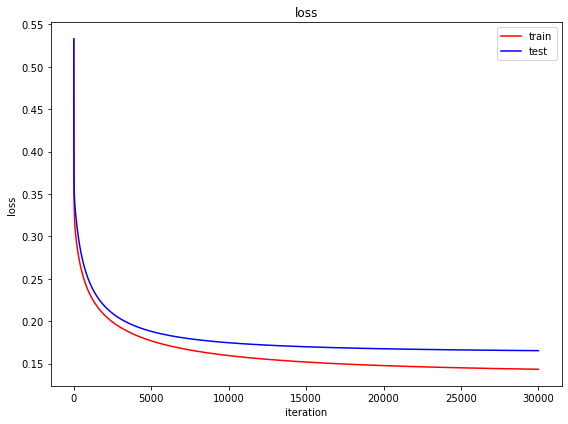

In [18]:
plot_loss_curve(loss1_iteration, loss2_iteration)

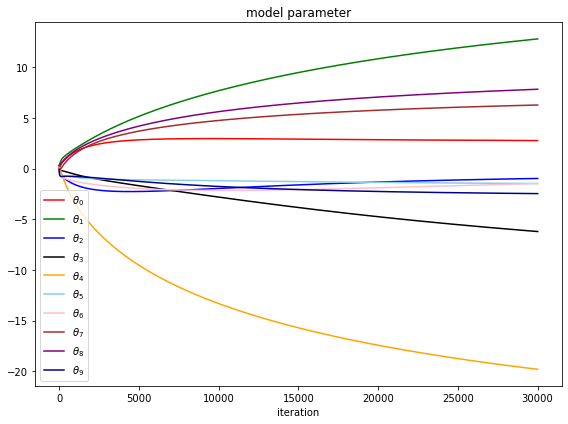

In [19]:
plot_model_parameter(theta_iteration)

In [20]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8))
    
    num_data = data.shape[0]

    x = np.zeros(num_data)
    y = np.zeros(num_data)
    label   = np.zeros(num_data)
    
    for i in range(num_data):
        x[i]  = data[i,0]
        y[i]  = data[i,1]
        label[i]    = data[i,2]
    
    xx = []
    yy = []
    xxx = []
    yyy = []
    X = np.arange(x.min()-0.1, x.max()+0.1, 0.05)
    Y = np.arange(y.min()-0.1, y.max()+0.1, 0.05)
    gX, gY = np.meshgrid(X, Y)
    Z = regression_function(theta, feature_function(gX, gY))
    for i in range(0, num_data) :
        a = x[i]
        b = y[i]
        if label[i] == 0 :
            xx.append(a)
            yy.append(b)
        elif label[i] == 1 :
            xxx.append(a)
            yyy.append(b)
    plt.plot(xx, yy, 'o',color='blue', label='Class = 0', markersize = 3)
    plt.plot(xxx, yyy, 'o',color='red', label='Class = 1', markersize = 3)
    plt.contourf(gX, gY, Z, levels=100, cmap = 'bwr')
    plt.colorbar()
    plt.contour(gX,gY, Z, levels = [0], colors = 'black')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

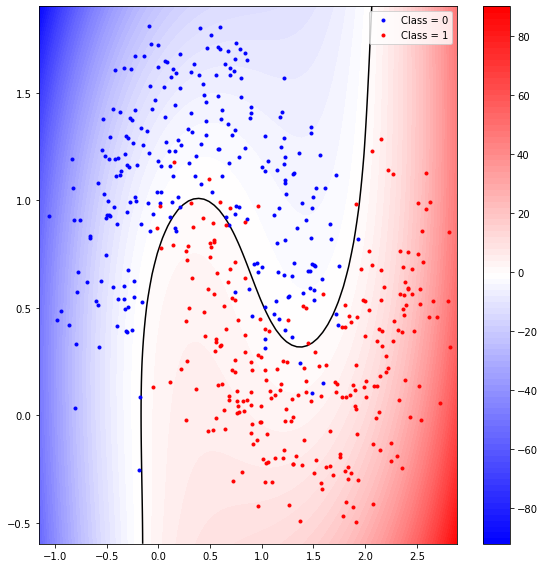

In [21]:
plot_classifier(data_train, theta_optimal)

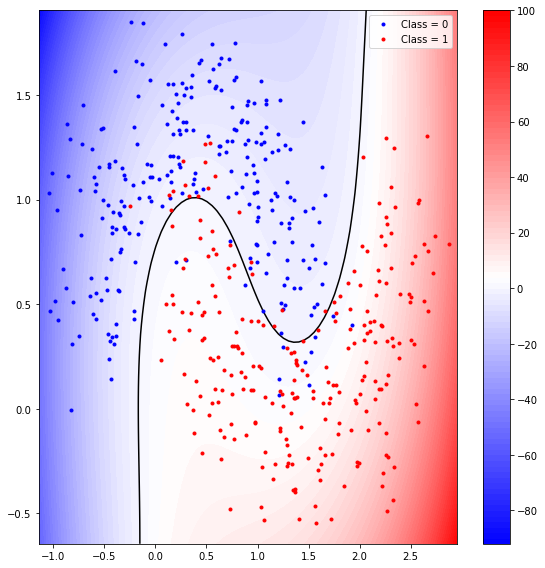

In [22]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

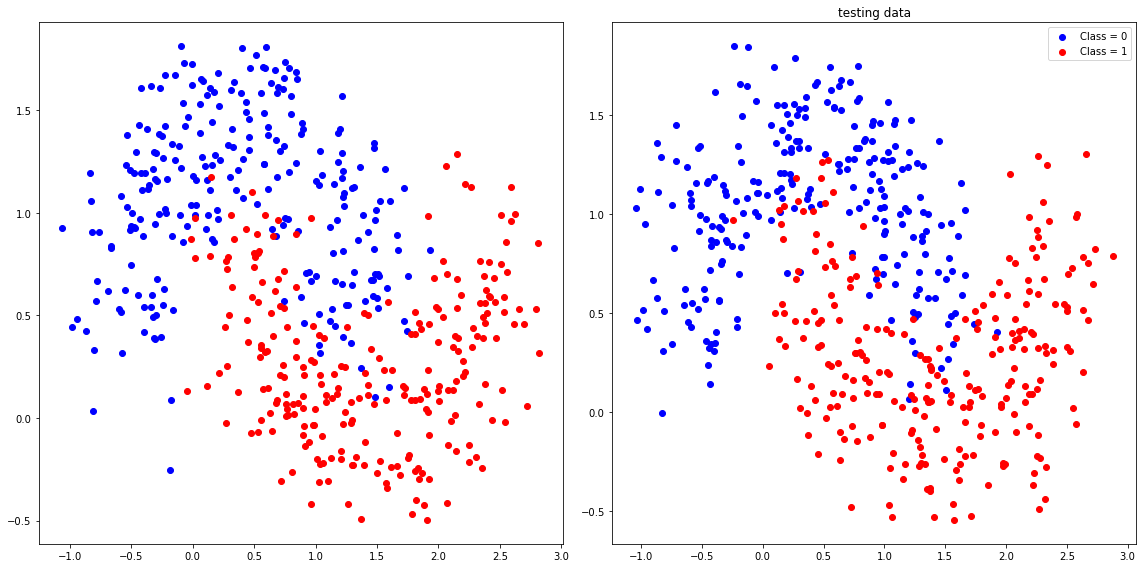

In [23]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

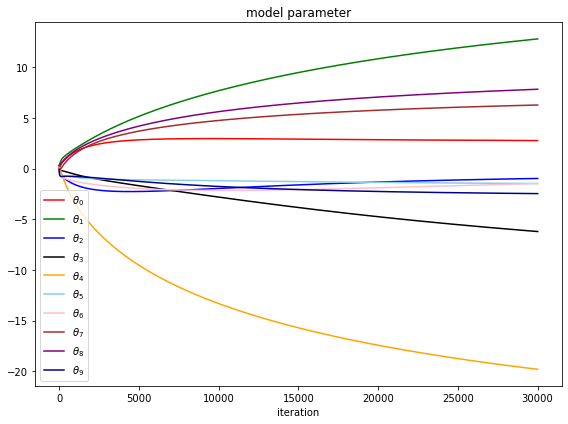

In [24]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

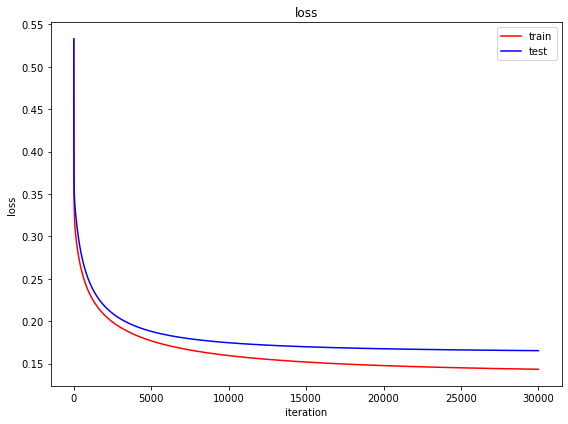

In [25]:
plot_loss_curve(loss1_iteration, loss2_iteration)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

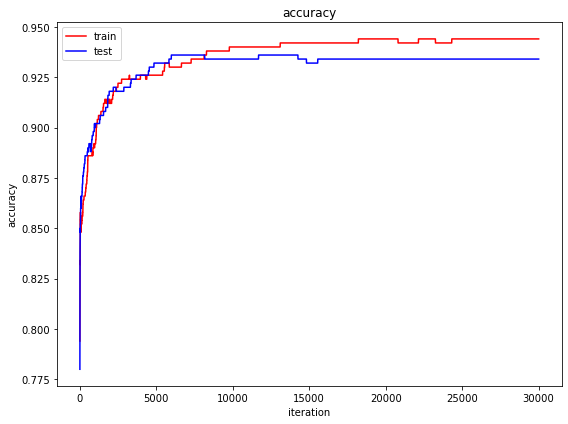

In [26]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

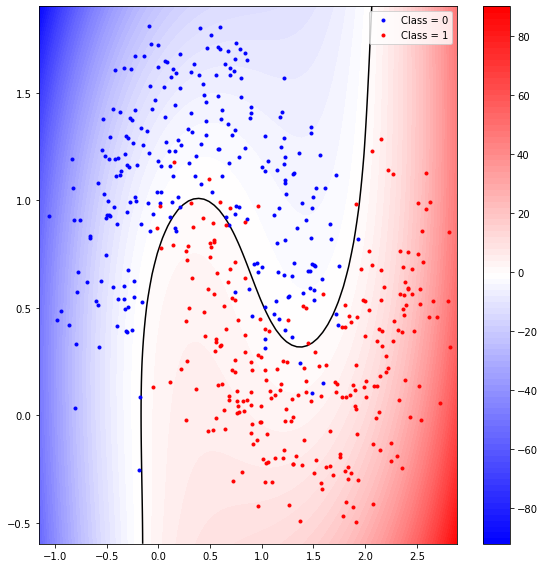

In [27]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

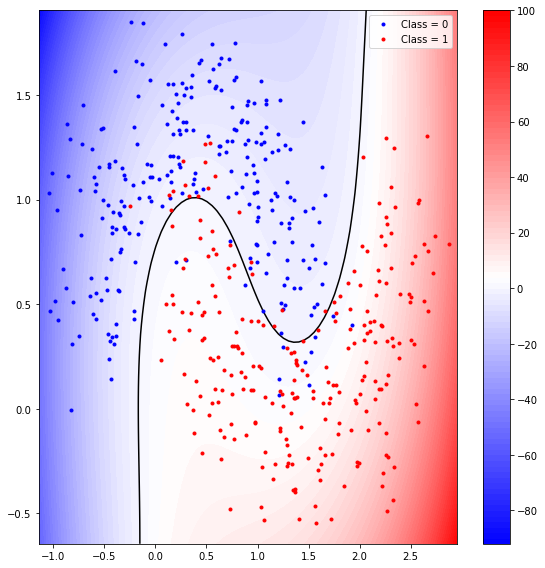

In [28]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [29]:
print('accuract(train): {}'.format(accuracy_train))
print('accuracy(test) : {}'.format(accuracy_test))

accuract(train): 0.944
accuracy(test) : 0.934
